<font color = green>

# Linear Regression one variable (manual implementation)

</font>

<font color = green >

### Import necessary packages
</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

<font color = green >

### Set interactive backend 
</font>

In [2]:
%matplotlib notebook

<font color = green >

### Load data set 
</font>

In [3]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
df = pd.DataFrame (X, columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

<font color = green >

### Select one feature
</font>

In [4]:
df = df[['RM']] # Note: returns df comparing to  df['RM']
df['target'] = y

<font color = green >

### Review the data 
</font>

In [5]:
print (df.head(10))
df.describe ()

      RM  target
0  6.575    24.0
1  6.421    21.6
2  7.185    34.7
3  6.998    33.4
4  7.147    36.2
5  6.430    28.7
6  6.012    22.9
7  6.172    27.1
8  5.631    16.5
9  6.004    18.9


,RM,target
count,506.000000,506.000000
mean,6.284634,22.532806
std,0.702617,9.197104
min,3.561000,5.000000
25%,5.885500,17.025000
50%,6.208500,21.200000
75%,6.623500,25.000000
max,8.780000,50.000000


In [6]:
df.plot.scatter('RM', 'target')

<IPython.core.display.Javascript object>

<font color = green >

## Custom Linear Regression Classifier
</font>

<font color = green >

### Load all data 
</font>

In [7]:
X, y = load_boston(return_X_y=True)

# YOUR_CODE. select the values of feature 5 only (corresponding to 'RM') and assign to X 
# START_CODE 
X=X.T[4]
# END_CODE 

X= X.reshape(-1,1) # make it 2d as for case of mutivariable

# YOUR_CODE. Apply train_test_split to X and Y to get X_train, X_test, y_train, y_test
# START_CODE 
from sklearn.model_selection import train_test_split
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test=  train_test_split(X, y)
# END_CODE 


(506, 1)
(506,)


<font color = blue >

### Check loaded data

</font>

In [8]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
X_train[:10]

X_train.shape=  (379, 1)
y_train.shape=  (379,)


array([[0.659],
       [0.7  ],
       [0.493],
       [0.448],
       [0.403],
       [0.448],
       [0.488],
       [0.392],
       [0.489],
       [0.624]])

<font color = blue>
Expected output:
</font>

<br>`X_train.shape=  (379, 1)`
<br>`y_train.shape=  (379,)`

<font color = green >

### Develop expresion of h

</font>

In [9]:
class Linear_Regression_1():
    def __init__(self):
        pass
            
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Assign expression for h to h_res 
        # START_CODE 
        h_res= b+w*X
        # END_CODE 
        
        return h_res

<font color = blue >

### Check h

</font>

In [10]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2018)
b_check= np.random.randn()
w_check= np.random.randn(1,1)
X_check= np.random.randn(10,1)
print('b= {}, \nw= {}, \nX= \n{}'.format(b_check, w_check, X_check))
lin_reg_1 = Linear_Regression_1()
lin_reg_1.h(b_check, w_check, X_check)

b= -0.276767596147759, 
w= [[0.581851]], 
X= 
[[ 2.14839926]
 [-1.279487  ]
 [ 0.50227689]
 [ 0.8560293 ]
 [-0.14279008]
 [ 0.11007867]
 [-0.68806479]
 [ 0.43356408]
 [ 0.510221  ]
 [-0.16513097]]


array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       [ 0.22131391],
       [-0.35985014],
       [-0.21271821],
       [-0.67711878],
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])

<font color = blue>
Expected output:
</font>

<br>`array([[ 0.97328067],
       [-1.02123839],
       [ 0.01548272],
       ...
       [-0.0244979 ],
       [ 0.02010501],
       [-0.37284922]])`


<font color = green >

### Develop expresion of Cost Function

</font>

In [11]:
class Linear_Regression_2():
    '''linear regression using gradient descent
    '''
    def __init__(self):
        pass


    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')    
   
        # YOUR_CODE. Assign expression for J to J_res 
        # START_CODE 
        m=y.shape[0]
        sum=0
        for i in range(0,h.size):
            sum+=(h[i][0]-y[i][0])**2
        J_res = (1/(2*m))*sum
        # END_CODE         
        return J_res           
 

<font color = blue >

### Check J

</font>

In [12]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2019)
m = 10 
y_check= np.random.randn(m,1)
h_check= np.random.randn(m,1)
print('y= {}, \nh= {}'.format(y_check, h_check))
lin_reg_2 = Linear_Regression_2()
lin_reg_2.m = m 
lin_reg_2.J(h_check, y_check)

y= [[-0.21767896]
 [ 0.82145535]
 [ 1.48127781]
 [ 1.33186404]
 [-0.36186537]
 [ 0.68560883]
 [ 0.57376143]
 [ 0.28772767]
 [-0.23563426]
 [ 0.95349024]], 
h= [[-1.6896253 ]
 [-0.34494271]
 [ 0.0169049 ]
 [-0.51498352]
 [ 0.24450929]
 [-0.18931261]
 [ 2.67217242]
 [ 0.46480249]
 [ 0.84593044]
 [-0.50354158]]


0.8971465151865978

<font color = blue>
Expected output:
</font>

<br>`0.897146515186598`


<font color = green >

### Develop expresion of Cost Function  derivative 

</font>

In [13]:
class Linear_Regression_3():
    def __init__(self, max_iter = 1e5, alpha = 1,eps = 1e-10, verbose= 0):
        pass        

    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= b+w*X
        # END_CODE

        return h_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''    
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')

        # YOUR_CODE. Assign expressions for derivates of J by b and by w  to dJ_b and dJ_w corrrespondingly       
        # START_CODE       
        m=X.shape[0]
        sum=0
        for i in range(0,m):
            sum+=-2*X[i]*(y[i]-(w*X[i]+b))
        dJ_w = (1/(2*m))*sum
        sum=0
        
        for i in range(0,m):
            sum+=-2*(y[i]-(w*X[i]+b))
        dJ_b= (1/(2*m))*sum
        # END_CODE
        
        return (dJ_b[0][0], dJ_w[0][0])


<font color = blue >

### Check cost function derivatives 

</font>

In [14]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2020)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
b_check= np.random.randn()
w_check= np.random.randn(1,n)
params = b_check,w_check 
print('X= {}, \ny= {}, \nb= {} \nw= {}'.format(X_check, y_check, b_check, w_check))

lin_reg_3 = Linear_Regression_3()
lin_reg_3.m = m 
lin_reg_3.n = n 
lin_reg_3.J_derivative(params, X_check, y_check)

X= [[-1.76884571]
 [ 0.07555227]
 [-1.1306297 ]
 [-0.65143017]
 [-0.89311563]
 [-1.27410098]
 [-0.06115443]
 [ 0.06451384]
 [ 0.41011295]
 [-0.57288249]], 
y= [[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]], 
b= 2.0899788404287745 
w= [[0.04197131]]
[[0.04197131]]
[[-0.80133362]
 [ 1.31203519]
 [ 1.27469887]
 [-1.2143576 ]
 [ 0.31371941]
 [-1.44482142]
 [-0.3689613 ]
 [-0.76922658]
 [ 0.3926161 ]
 [ 0.05729383]]


(2.1904608819958713, -1.4328426209410612)

<font color = blue>
Expected output:
</font>

`(2.1904608819958713, -1.4328426209410612)`


<font color = green >

### Develop gradient descent 

</font>

In [15]:
class Linear_Regression_4():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01,eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= b+w*X
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        m=y.shape[0]
        sum=0
        for i in range(0,h.size):
            sum+=(h[i][0]-y[i][0])**2
        J_res = (1/(2*m))*sum
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
        # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        m=X.shape[0]
        sum=0
        for i in range(0,m):
            sum+=-2*X[i]*(y[i]-(w*X[i]+b))
        dJ_w = (1/(2*m))*sum
        sum=0
        
        for i in range(0,m):
            sum+=-2*(y[i]-(w*X[i]+b))
        dJ_b= (1/(2*m))*sum
        # END_CODE
        
        return (dJ_b[0][0], dJ_w[0][0])

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter
        alpha=1

        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Develop one step of gradien descent 
            # START_CODE 
            params= (b,w)
            dJ_b, dJ_w =  self.J_derivative(params=params,X=X,y=y)
            b= b-alpha*dJ_b
            w= w-alpha*dJ_w
           
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
 

<font color = blue >

### Check gradient descent

</font>

In [16]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
np.random.seed(2021)
m = 10 
n = 1
X_check= np.random.randn(m,n)
y_check= np.random.randn(m,1)
print('X= {}, \ny= {}'.format(X_check, y_check))
lin_reg_4 = Linear_Regression_4(alpha = 1, max_iter = 5, verbose=1)
lin_reg_4.fit(X_check, y_check)

X= [[ 1.48860905]
 [ 0.67601087]
 [-0.41845137]
 [-0.80652081]
 [ 0.55587583]
 [-0.70550429]
 [ 1.13085826]
 [ 0.64500184]
 [ 0.10641374]
 [ 0.42215483]], 
y= [[ 0.12420684]
 [-0.83795346]
 [ 0.4090157 ]
 [ 0.10275122]
 [-1.90772239]
 [ 1.1002243 ]
 [-1.40232506]
 [-0.22508127]
 [-1.33620597]
 [ 0.30372151]]
Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.32781150230161676
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.3242845778653882
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.1879808909405214, w= [[-0.58309057]], J= 0.32393918537714383


True

<font color = blue>
Expected output:
</font>

`Running gradient descent with alpha = 1, eps= 1e-10, max_iter= 5
b = -0.36693685587288444, w= [[-0.4217246]], J= 0.33976525493056825
b = -0.23643637277401236, w= [[-0.46886908]], J= 0.3278115023016167
b = -0.22184776004990137, w= [[-0.52721539]], J= 0.3250909705515032
b = -0.20379279582278398, w= [[-0.55396166]], J= 0.32428457786538833
b = -0.19551630227029396, w= [[-0.5697399]], J= 0.32403801171263197
b = -0.19063380881762437, w= [[-0.57831305]], J= 0.3239623872203208
b = -0.18798089094052142, w= [[-0.58309057]], J= 0.3239391853771439`


<font color = green >

### Launch liner regression learning on real values. 
Please review addtional already implemented functions: draw_cost_changes(), predict() and score()

</font>

In [29]:
class Linear_Regression():
    '''
    linear regression using gradient descent
    '''
    def __init__(self, max_iter = 1e5, alpha = 0.01, eps = 1e-10, verbose= 0):
        '''
        :param verbose: set 1 to display more details of J val changes
        '''
        self.max_iter = max_iter
        self.alpha = alpha
        self.eps = eps
        self.verbose = verbose       
        
    def h(self, b, w, X): 
        '''
        :param b -  float or ndarry of shape [m,1], m - number of samples
        :param w - ndarray of shape [1,m],  n - number of features
        :param X - ndarray of shape [m,n], m - number of samples, n - number of features
        '''
        assert (X.shape[1]== w.shape[1])

        # YOUR_CODE. Insert the expression of h developed in Linear_Regression_1
        # START_CODE 
        h_res= b+w*X
        # END_CODE 
        
        if h_res.shape != (X.shape[0],1):
            print('h.shape = {} but expected {}'.format (h_res.shape,  (self.m,1)))
            raise Exception('Check assertion in h')    
        return h_res

    def J (self, h, y):      
        '''
        :param h - ndarray of shape (m,1)
        :param y - ndarray of shape (m,1)
        :return expression for cost function 
        '''
        if h.shape !=y.shape:
            print('h.shape = {} does not match y.shape = {}.Expected {}'.format (h.shape, y.shape, (self.m,1)))
            raise Exception('Check assertion in J')   
        # YOUR_CODE. Insert the expression of J developed in Linear_Regression_2
        # START_CODE 
        m=y.shape[0]
        sum=0
        for i in range(0,h.size):
            sum+=(h[i][0]-y[i][0])**2
        J_res = (1/(2*m))*sum
        # END_CODE 

        return J_res
        
    def J_derivative(self, params, X, y): 
        '''
        :param params - tuple (b,w), where w is the 2d ndarry of shape (1,n), n- number of features 
        :param X- ndarray of shape (m, n)
        :param y - ndarray of shape (m,1)
        :return tuple of derivatrives of cost function by b and w
        '''
      
        b,w = params
        assert (w.shape == (1,self.n))                
        h_val = self.h(b,w,X)
        if  h_val.shape != (self.m, 1):
            print('h.shape = {}, but expected {}'.format (h_val.shape, (self.m, 1)))
            raise Exception('Check assertion in J_derivative')
        
     # YOUR_CODE. Insert the expressions for derivates of J by b and by w to dJ_b and dJ_w developed in Linear_Regression_3
        # START_CODE             
        m=X.shape[0]
        sum=0
        for i in range(0,m):
            sum+=-2*X[i]*(y[i]-(w*X[i]+b))
        dJ_w = (1/(2*m))*sum
        sum=0
        
        for i in range(0,m):
            sum+=-2*(y[i]-(w*X[i]+b))
        dJ_b= (1/(2*m))*sum
        # END_CODE
        
        return (dJ_b, dJ_w)

    def fit(self, X, y):
        '''
        :param X - ndarray training set of shape [m,n], m - number of samples, n - number of features
        :param y - ndarray - 1d array 
        :return: True in case of successful fit 
        '''      
        if self.verbose: 
            print ('Running gradient descent with alpha = {}, eps= {}, max_iter= {}'.format(
                self.alpha, self.eps, self.max_iter))
        self.m,self.n= X.shape # number of samples, number of features  
        y = y.reshape(self.m,1) # make it 2 d to make sure it corresponds to h_val
        b = 0 # init intercept with 0
        w= np.zeros(self.n).reshape(1,-1) # make sure it's shape is [1,n]
        params = (b,w)
        
        self.J_hist=[-1] # used for keeping J values. Init with -1 to avoid 0 at first iter
        continue_iter = True # flag to continue next iter (grad desc step)
        iter_number =0 # used for limit by max_iter
        
        while continue_iter:            
            # Do step of gradient descent    
            # YOUR_CODE. Insert one step of gradien descent developed in Linear_Regression_4 
            # START_CODE 
            params= (b,w)
            dJ_b, dJ_w =  self.J_derivative(params=params,X=X,y=y)
            b= b-self.alpha*dJ_b
            w= w-self.alpha*dJ_w
            # END_CODE 
            
            # keep history of J values
            self.J_hist.append(self.J(self.h(b, w, X), y))
            if self.verbose:
                print ('b = {}, w= {}, J= {}'.format(b,w,self.J_hist[-1]))
            # check criteria of exit the loop (finish grad desc)
            if self.max_iter and iter_number> self.max_iter: # if max_iter is provided and limit succeeded
                continue_iter = False
            elif np.abs(self.J_hist[iter_number-1] - self.J_hist[iter_number])< self.eps: # if accuracy is succeeded
                continue_iter = False
            iter_number += 1
            
        # store the final params to further using 
        self.intercept_, self.coef_= params        
        return True        
        
    def draw_cost_changes(self):        
        J_hist= self.J_hist[1:]
        plt.figure()
        plt.scatter(np.arange(0,len(J_hist)),J_hist,s=20,marker='.',c='b')
        plt.xlabel('Iterations')
        plt.ylabel('Cost function J value')
        title_str = 'Complited: {}, alpha ={}, max_iter={}, eps={}'.format( len(self.J_hist)-2, self.alpha, self.max_iter,self.eps)
        # Note: len(J_hist)-2) due to first one is -1 (was not iteration), iter + 1  at the end  of the gradient loop
        plt.title(title_str)
 

    def predict(self, X): 
        '''
        :param X - ndarray of shape (?,n)
        :return 
        '''
        return self.h(self.intercept_, self.coef_, X)
        
   
    def score(self, X_test, y_test):
        '''
        :param X_test - ndarray testing set or any for prediction of shape [?,n], ? - number of samples, n - number of features
        :param y_test - ndarray - 1d array 
        :return R2 score of y_test and prediction for X_test
        '''
        z= self.predict(X_test)
        from sklearn.metrics.scorer import r2_score
        return (r2_score(y_test, z))


<font color = blue >

### Check results

</font>

X_train.shape=  (379, 1)
y_train.shape=  (379,)
X_train= 
[[6.009]
 [5.648]
 [5.885]
 [8.297]
 [6.471]]
Running gradient descent with alpha = 0.01, eps= 1e-08, max_iter= 100000.0
b = [[0.22199472]], w= [[1.43569903]], J= 121.92412677146496
b = [[0.35175981]], w= [[2.28618824]], J= 62.998753764595705
b = [[0.42690668]], w= [[2.79011604]], J= 42.332405861556396
b = [[0.46970885]], w= [[3.08881008]], J= 35.083539226654835
b = [[0.49335667]], w= [[3.26596461]], J= 32.54019788795513
b = [[0.50566149]], w= [[3.37114339]], J= 31.647089575378278
b = [[0.51124919]], w= [[3.43369808]], J= 31.332720024485035
b = [[0.51285921]], w= [[3.47101075]], J= 31.221315051541886
b = [[0.51211385]], w= [[3.49337506]], J= 31.18109024864969
b = [[0.50997383]], w= [[3.50688691]], J= 31.165828683051497
b = [[0.5070081]], w= [[3.5151563]], J= 31.159322026970734
b = [[0.50355359]], w= [[3.52032108]], J= 31.155886002468343
b = [[0.49980983]], w= [[3.52364727]], J= 31.15352712713017
b = [[0.49589496]], w= [[3.525884

b = [[-0.04905846]], w= [[3.61412334]], J= 30.920570200379544
b = [[-0.05315694]], w= [[3.61476927]], J= 30.9188488236858
b = [[-0.05725493]], w= [[3.61541512]], J= 30.917127857730453
b = [[-0.06135244]], w= [[3.61606089]], J= 30.915407302415407
b = [[-0.06544946]], w= [[3.61670659]], J= 30.913687157642823
b = [[-0.06954599]], w= [[3.61735221]], J= 30.911967423314643
b = [[-0.07364203]], w= [[3.61799775]], J= 30.91024809933302
b = [[-0.07773758]], w= [[3.61864322]], J= 30.908529185599967
b = [[-0.08183264]], w= [[3.61928861]], J= 30.90681068201764
b = [[-0.08592721]], w= [[3.61993392]], J= 30.90509258848806
b = [[-0.0900213]], w= [[3.62057916]], J= 30.903374904913527
b = [[-0.09411489]], w= [[3.62122432]], J= 30.901657631196194
b = [[-0.098208]], w= [[3.6218694]], J= 30.899940767238235
b = [[-0.10230062]], w= [[3.6225144]], J= 30.898224312941817
b = [[-0.10639275]], w= [[3.62315933]], J= 30.896508268209338
b = [[-0.1104844]], w= [[3.62380418]], J= 30.894792632942945
b = [[-0.11457555]]

b = [[-0.70265569]], w= [[3.71713147]], J= 30.64865258589279
b = [[-0.70667619]], w= [[3.71776511]], J= 30.646996091571136
b = [[-0.71069621]], w= [[3.71839867]], J= 30.645339992506187
b = [[-0.71471575]], w= [[3.71903216]], J= 30.64368428860376
b = [[-0.71873482]], w= [[3.71966557]], J= 30.64202897976951
b = [[-0.7227534]], w= [[3.72029891]], J= 30.640374065909153
b = [[-0.7267715]], w= [[3.72093217]], J= 30.63871954692847
b = [[-0.73078913]], w= [[3.72156535]], J= 30.637065422733272
b = [[-0.73480627]], w= [[3.72219846]], J= 30.635411693229273
b = [[-0.73882294]], w= [[3.72283149]], J= 30.63375835832233
b = [[-0.74283912]], w= [[3.72346445]], J= 30.63210541791832
b = [[-0.74685483]], w= [[3.72409734]], J= 30.63045287192307
b = [[-0.75087006]], w= [[3.72473014]], J= 30.628800720242563
b = [[-0.75488481]], w= [[3.72536288]], J= 30.627148962782545
b = [[-0.75889908]], w= [[3.72599553]], J= 30.625497599449076
b = [[-0.76291287]], w= [[3.72662811]], J= 30.623846630148098
b = [[-0.76692618

b = [[-1.32014296]], w= [[3.8144486]], J= 30.39655646596698
b = [[-1.32408979]], w= [[3.81507063]], J= 30.394960124402534
b = [[-1.32803615]], w= [[3.81569258]], J= 30.393364163741825
b = [[-1.33198203]], w= [[3.81631446]], J= 30.391768583893917
b = [[-1.33592745]], w= [[3.81693627]], J= 30.390173384767944
b = [[-1.33987239]], w= [[3.817558]], J= 30.388578566273097
b = [[-1.34381687]], w= [[3.81817966]], J= 30.386984128318552
b = [[-1.34776087]], w= [[3.81880124]], J= 30.385390070813475
b = [[-1.3517044]], w= [[3.81942275]], J= 30.38379639366705
b = [[-1.35564746]], w= [[3.82004418]], J= 30.382203096788636
b = [[-1.35959006]], w= [[3.82066554]], J= 30.380610180087444
b = [[-1.36353218]], w= [[3.82128682]], J= 30.37901764347277
b = [[-1.36747383]], w= [[3.82190804]], J= 30.377425486853838
b = [[-1.37141501]], w= [[3.82252917]], J= 30.375833710140114
b = [[-1.37535572]], w= [[3.82315024]], J= 30.374242313240813
b = [[-1.37929596]], w= [[3.82377123]], J= 30.372651296065396
b = [[-1.383235

b = [[-1.95342689]], w= [[3.91425532]], J= 30.142853878714593
b = [[-1.95729816]], w= [[3.91486544]], J= 30.141318073227243
b = [[-1.96116897]], w= [[3.91547549]], J= 30.139782634199044
b = [[-1.96503931]], w= [[3.91608546]], J= 30.138247561542546
b = [[-1.9689092]], w= [[3.91669536]], J= 30.13671285517038
b = [[-1.97277862]], w= [[3.91730519]], J= 30.13517851499511
b = [[-1.97664758]], w= [[3.91791494]], J= 30.13364454092943
b = [[-1.98051608]], w= [[3.91852463]], J= 30.132110932885848
b = [[-1.98438411]], w= [[3.91913424]], J= 30.130577690777105
b = [[-1.98825169]], w= [[3.91974377]], J= 30.129044814515918
b = [[-1.9921188]], w= [[3.92035324]], J= 30.12751230401494
b = [[-1.99598546]], w= [[3.92096263]], J= 30.125980159186916
b = [[-1.99985165]], w= [[3.92157195]], J= 30.124448379944596
b = [[-2.00371738]], w= [[3.92218119]], J= 30.12291696620074
b = [[-2.00758265]], w= [[3.92279037]], J= 30.121385917868132
b = [[-2.01144746]], w= [[3.92339947]], J= 30.119855234859592
b = [[-2.015311

b = [[-2.46808259]], w= [[3.99536601]], J= 29.940287443117256
b = [[-2.47189246]], w= [[3.99596645]], J= 29.938799972089097
b = [[-2.47570187]], w= [[3.99656682]], J= 29.93731285598698
b = [[-2.47951082]], w= [[3.99716712]], J= 29.935826094726277
b = [[-2.48331932]], w= [[3.99776735]], J= 29.934339688222263
b = [[-2.48712737]], w= [[3.9983675]], J= 29.93285363639031
b = [[-2.49093496]], w= [[3.99896759]], J= 29.931367939145755
b = [[-2.4947421]], w= [[3.9995676]], J= 29.929882596404045
b = [[-2.49854878]], w= [[4.00016754]], J= 29.928397608080573
b = [[-2.50235501]], w= [[4.00076741]], J= 29.926912974090772
b = [[-2.50616079]], w= [[4.0013672]], J= 29.925428694350096
b = [[-2.50996611]], w= [[4.00196693]], J= 29.92394476877395
b = [[-2.51377098]], w= [[4.00256658]], J= 29.92246119727794
b = [[-2.51757539]], w= [[4.00316617]], J= 29.920977979777504
b = [[-2.52137935]], w= [[4.00376568]], J= 29.919495116188244
b = [[-2.52518285]], w= [[4.00436512]], J= 29.91801260642567
b = [[-2.52898591

b = [[-3.12793552]], w= [[4.09936005]], J= 29.685310164362804
b = [[-3.13166666]], w= [[4.09994808]], J= 29.68388353356636
b = [[-3.13539735]], w= [[4.10053605]], J= 29.682457243178902
b = [[-3.13912759]], w= [[4.10112394]], J= 29.681031293119105
b = [[-3.14285739]], w= [[4.10171176]], J= 29.679605683305887
b = [[-3.14658675]], w= [[4.10229952]], J= 29.67818041365801
b = [[-3.15031566]], w= [[4.1028872]], J= 29.676755484094205
b = [[-3.15404412]], w= [[4.10347481]], J= 29.675330894533523
b = [[-3.15777214]], w= [[4.10406236]], J= 29.67390664489466
b = [[-3.16149972]], w= [[4.10464983]], J= 29.672482735096644
b = [[-3.16522685]], w= [[4.10523723]], J= 29.671059165058274
b = [[-3.16895354]], w= [[4.10582457]], J= 29.669635934698565
b = [[-3.17267978]], w= [[4.10641183]], J= 29.66821304393638
b = [[-3.17640558]], w= [[4.10699902]], J= 29.666790492690783
b = [[-3.18013093]], w= [[4.10758614]], J= 29.6653682808807
b = [[-3.18385584]], w= [[4.1081732]], J= 29.66394640842518
b = [[-3.1875803]

b = [[-3.73392981]], w= [[4.19486587]], J= 29.45583455320202
b = [[-3.73758865]], w= [[4.19544251]], J= 29.454462677674044
b = [[-3.74124704]], w= [[4.19601908]], J= 29.453091129489856
b = [[-3.744905]], w= [[4.19659558]], J= 29.451719908571363
b = [[-3.74856253]], w= [[4.19717201]], J= 29.4503490148404
b = [[-3.75221961]], w= [[4.19774838]], J= 29.44897844821901
b = [[-3.75587627]], w= [[4.19832467]], J= 29.44760820862904
b = [[-3.75953248]], w= [[4.1989009]], J= 29.446238295992508
b = [[-3.76318826]], w= [[4.19947705]], J= 29.44486871023134
b = [[-3.7668436]], w= [[4.20005314]], J= 29.443499451267623
b = [[-3.77049851]], w= [[4.20062916]], J= 29.442130519023326
b = [[-3.77415298]], w= [[4.20120511]], J= 29.440761913420513
b = [[-3.77780701]], w= [[4.201781]], J= 29.43939363438126
b = [[-3.78146061]], w= [[4.20235681]], J= 29.438025681827618
b = [[-3.78511377]], w= [[4.20293256]], J= 29.436658055681658
b = [[-3.7887665]], w= [[4.20350823]], J= 29.435290755865566
b = [[-3.79241879]], w

b = [[-4.35687252]], w= [[4.29304279]], J= 29.224621440705707
b = [[-4.36045703]], w= [[4.29360772]], J= 29.223304735032173
b = [[-4.36404111]], w= [[4.29417257]], J= 29.22198834353828
b = [[-4.36762476]], w= [[4.29473736]], J= 29.220672266149077
b = [[-4.37120799]], w= [[4.29530209]], J= 29.219356502789694
b = [[-4.37479078]], w= [[4.29586674]], J= 29.218041053385047
b = [[-4.37837316]], w= [[4.29643133]], J= 29.216725917860362
b = [[-4.3819551]], w= [[4.29699585]], J= 29.215411096140716
b = [[-4.38553661]], w= [[4.2975603]], J= 29.214096588151204
b = [[-4.3891177]], w= [[4.29812469]], J= 29.212782393816948
b = [[-4.39269836]], w= [[4.29868901]], J= 29.211468513063185
b = [[-4.3962786]], w= [[4.29925326]], J= 29.210154945814985
b = [[-4.39985841]], w= [[4.29981745]], J= 29.208841691997648
b = [[-4.40343779]], w= [[4.30038156]], J= 29.20752875153629
b = [[-4.40701674]], w= [[4.30094561]], J= 29.206216124356203
b = [[-4.41059526]], w= [[4.30150959]], J= 29.20490381038262
b = [[-4.414173

b = [[-4.97418387]], w= [[4.3903322]], J= 29.000179335913803
b = [[-4.97769472]], w= [[4.39088552]], J= 28.99891618446173
b = [[-4.98120516]], w= [[4.39143877]], J= 28.99765333441074
b = [[-4.98471518]], w= [[4.39199195]], J= 28.99639078568895
b = [[-4.98822478]], w= [[4.39254507]], J= 28.99512853822435
b = [[-4.99173396]], w= [[4.39309813]], J= 28.993866591945135
b = [[-4.99524272]], w= [[4.39365111]], J= 28.99260494677945
b = [[-4.99875106]], w= [[4.39420403]], J= 28.991343602655434
b = [[-5.00225899]], w= [[4.39475689]], J= 28.990082559501282
b = [[-5.00576649]], w= [[4.39530968]], J= 28.988821817245128
b = [[-5.00927358]], w= [[4.3958624]], J= 28.98756137581516
b = [[-5.01278025]], w= [[4.39641506]], J= 28.98630123513966
b = [[-5.0162865]], w= [[4.39696765]], J= 28.98504139514687
b = [[-5.01979233]], w= [[4.39752018]], J= 28.983781855764928
b = [[-5.02329775]], w= [[4.39807264]], J= 28.982522616922243
b = [[-5.02680274]], w= [[4.39862503]], J= 28.98126367854702
b = [[-5.03030732]],

b = [[-5.64407649]], w= [[4.49590851]], J= 28.761891582818862
b = [[-5.64750742]], w= [[4.49644923]], J= 28.760685289304018
b = [[-5.65093794]], w= [[4.49698989]], J= 28.759479283623378
b = [[-5.65436805]], w= [[4.49753048]], J= 28.758273565708233
b = [[-5.65779775]], w= [[4.49807101]], J= 28.75706813548997
b = [[-5.66122704]], w= [[4.49861147]], J= 28.755862992899836
b = [[-5.66465592]], w= [[4.49915187]], J= 28.75465813786925
b = [[-5.6680844]], w= [[4.4996922]], J= 28.753453570329686
b = [[-5.67151246]], w= [[4.50023247]], J= 28.752249290212408
b = [[-5.67494012]], w= [[4.50077268]], J= 28.75104529744897
b = [[-5.67836736]], w= [[4.50131282]], J= 28.749841591970636
b = [[-5.6817942]], w= [[4.50185289]], J= 28.748638173709022
b = [[-5.68522063]], w= [[4.50239291]], J= 28.74743504259552
b = [[-5.68864665]], w= [[4.50293285]], J= 28.7462321985616
b = [[-5.69207226]], w= [[4.50347274]], J= 28.745029641538792
b = [[-5.69549747]], w= [[4.50401255]], J= 28.743827371458607
b = [[-5.69892226

b = [[-6.30207148]], w= [[4.59960974]], J= 28.53317782502568
b = [[-6.3054239]], w= [[4.60013809]], J= 28.532026104993214
b = [[-6.30877592]], w= [[4.60066637]], J= 28.530874659773062
b = [[-6.31212754]], w= [[4.60119459]], J= 28.529723489299776
b = [[-6.31547876]], w= [[4.60172275]], J= 28.528572593507782
b = [[-6.31882959]], w= [[4.60225085]], J= 28.52742197233146
b = [[-6.32218001]], w= [[4.60277888]], J= 28.526271625705295
b = [[-6.32553003]], w= [[4.60330685]], J= 28.52512155356386
b = [[-6.32887966]], w= [[4.60383476]], J= 28.523971755841522
b = [[-6.33222888]], w= [[4.6043626]], J= 28.52282223247297
b = [[-6.33557771]], w= [[4.60489038]], J= 28.521672983392612
b = [[-6.33892613]], w= [[4.6054181]], J= 28.520524008535087
b = [[-6.34227416]], w= [[4.60594575]], J= 28.519375307834864
b = [[-6.34562178]], w= [[4.60647335]], J= 28.518226881226614
b = [[-6.34896901]], w= [[4.60700088]], J= 28.51707872864488
b = [[-6.35231583]], w= [[4.60752834]], J= 28.515930850024308
b = [[-6.3556622

b = [[-6.7741334]], w= [[4.67400757]], J= 28.372354345092543
b = [[-6.7774295]], w= [[4.67452704]], J= 28.371240999215757
b = [[-6.78072521]], w= [[4.67504645]], J= 28.370127918994854
b = [[-6.78402052]], w= [[4.6755658]], J= 28.36901510436646
b = [[-6.78731544]], w= [[4.67608508]], J= 28.36790255526722
b = [[-6.79060997]], w= [[4.67660431]], J= 28.366790271633786
b = [[-6.7939041]], w= [[4.67712347]], J= 28.36567825340281
b = [[-6.79719784]], w= [[4.67764257]], J= 28.364566500510925
b = [[-6.80049119]], w= [[4.67816161]], J= 28.363455012894818
b = [[-6.80378415]], w= [[4.67868058]], J= 28.362343790491312
b = [[-6.80707671]], w= [[4.6791995]], J= 28.361232833237004
b = [[-6.81036888]], w= [[4.67971835]], J= 28.360122141068587
b = [[-6.81366065]], w= [[4.68023714]], J= 28.35901171392292
b = [[-6.81695204]], w= [[4.68075587]], J= 28.357901551736745
b = [[-6.82024303]], w= [[4.68127453]], J= 28.356791654446805
b = [[-6.82353363]], w= [[4.68179314]], J= 28.35568202198988
b = [[-6.82682383]

b = [[-7.23178179]], w= [[4.7461338]], J= 28.219042613392457
b = [[-7.23502329]], w= [[4.74664467]], J= 28.21796584929004
b = [[-7.2382644]], w= [[4.74715547]], J= 28.216889342114747
b = [[-7.24150512]], w= [[4.74766622]], J= 28.215813091805156
b = [[-7.24474546]], w= [[4.7481769]], J= 28.214737098300212
b = [[-7.24798541]], w= [[4.74868752]], J= 28.21366136153847
b = [[-7.25122497]], w= [[4.74919808]], J= 28.212585881458697
b = [[-7.25446415]], w= [[4.74970858]], J= 28.211510657999675
b = [[-7.25770294]], w= [[4.75021902]], J= 28.210435691100127
b = [[-7.26094134]], w= [[4.7507294]], J= 28.20936098069893
b = [[-7.26417936]], w= [[4.75123972]], J= 28.20828652673478
b = [[-7.26741699]], w= [[4.75174997]], J= 28.207212329146564
b = [[-7.27065423]], w= [[4.75226017]], J= 28.206138387873004
b = [[-7.27389109]], w= [[4.7527703]], J= 28.20506470285302
b = [[-7.27712756]], w= [[4.75328038]], J= 28.203991274025476
b = [[-7.28036365]], w= [[4.75379039]], J= 28.20291810132923
b = [[-7.28359935]]

b = [[-7.68503658]], w= [[4.81756759]], J= 28.06972693928622
b = [[-7.688224]], w= [[4.81806994]], J= 28.06868580345719
b = [[-7.69141104]], w= [[4.81857222]], J= 28.067644916054036
b = [[-7.6945977]], w= [[4.81907444]], J= 28.06660427701745
b = [[-7.69778397]], w= [[4.81957661]], J= 28.0655638862882
b = [[-7.70096987]], w= [[4.82007871]], J= 28.064523743806916
b = [[-7.70415539]], w= [[4.82058075]], J= 28.063483849514526
b = [[-7.70734052]], w= [[4.82108274]], J= 28.06244420335172
b = [[-7.71052528]], w= [[4.82158466]], J= 28.061404805259293
b = [[-7.71370966]], w= [[4.82208652]], J= 28.060365655178085
b = [[-7.71689365]], w= [[4.82258833]], J= 28.0593267530489
b = [[-7.72007727]], w= [[4.82309007]], J= 28.058288098812554
b = [[-7.72326051]], w= [[4.82359175]], J= 28.057249692409908
b = [[-7.72644336]], w= [[4.82409338]], J= 28.056211533781855
b = [[-7.72962584]], w= [[4.82459494]], J= 28.05517362286925
b = [[-7.73280794]], w= [[4.82509645]], J= 28.05413595961299
b = [[-7.73598966]], 

b = [[-8.17144557]], w= [[4.89422655]], J= 27.91228366023275
b = [[-8.17457495]], w= [[4.89471974]], J= 27.91128009200829
b = [[-8.17770396]], w= [[4.89521288]], J= 27.910276763245644
b = [[-8.1808326]], w= [[4.89570596]], J= 27.909273673887746
b = [[-8.18396086]], w= [[4.89619898]], J= 27.908270823877373
b = [[-8.18708875]], w= [[4.89669194]], J= 27.907268213157447
b = [[-8.19021627]], w= [[4.89718484]], J= 27.90626584167087
b = [[-8.19334341]], w= [[4.89767769]], J= 27.90526370936057
b = [[-8.19647018]], w= [[4.89817047]], J= 27.90426181616949
b = [[-8.19959658]], w= [[4.8986632]], J= 27.903260162040503
b = [[-8.2027226]], w= [[4.89915587]], J= 27.90225874691664
b = [[-8.20584825]], w= [[4.89964847]], J= 27.90125757074083
b = [[-8.20897353]], w= [[4.90014102]], J= 27.90025663345605
b = [[-8.21209844]], w= [[4.90063351]], J= 27.89925593500535
b = [[-8.21522297]], w= [[4.90112595]], J= 27.898255475331727
b = [[-8.21834713]], w= [[4.90161832]], J= 27.89725525437817
b = [[-8.22147092]], 

b = [[-8.61210084]], w= [[4.96367463]], J= 27.772147750765473
b = [[-8.61517764]], w= [[4.96415954]], J= 27.771177620427082
b = [[-8.61825408]], w= [[4.96464439]], J= 27.770207721571936
b = [[-8.62133016]], w= [[4.96512919]], J= 27.769238054144772
b = [[-8.62440586]], w= [[4.96561393]], J= 27.76826861809032
b = [[-8.6274812]], w= [[4.96609861]], J= 27.767299413353427
b = [[-8.63055618]], w= [[4.96658323]], J= 27.766330439878825
b = [[-8.63363078]], w= [[4.96706779]], J= 27.765361697611407
b = [[-8.63670502]], w= [[4.9675523]], J= 27.764393186495987
b = [[-8.63977889]], w= [[4.96803674]], J= 27.76342490647735
b = [[-8.6428524]], w= [[4.96852113]], J= 27.762456857500407
b = [[-8.64592553]], w= [[4.96900547]], J= 27.761489039510053
b = [[-8.64899831]], w= [[4.96948974]], J= 27.760521452451126
b = [[-8.65207071]], w= [[4.96997396]], J= 27.759554096268552
b = [[-8.65514275]], w= [[4.97045812]], J= 27.758586970907213
b = [[-8.65821442]], w= [[4.97094222]], J= 27.757620076312026
b = [[-8.6612

b = [[-9.0876716]], w= [[5.03862546]], J= 27.623572080884248
b = [[-9.09069167]], w= [[5.03910143]], J= 27.622637402246617
b = [[-9.09371137]], w= [[5.03957734]], J= 27.62170294663312
b = [[-9.09673072]], w= [[5.0400532]], J= 27.62076871399042
b = [[-9.0997497]], w= [[5.04052899]], J= 27.619834704265344
b = [[-9.10276833]], w= [[5.04100473]], J= 27.618900917404712
b = [[-9.10578659]], w= [[5.04148042]], J= 27.617967353355322
b = [[-9.1088045]], w= [[5.04195605]], J= 27.61703401206403
b = [[-9.11182204]], w= [[5.04243162]], J= 27.61610089347766
b = [[-9.11483923]], w= [[5.04290713]], J= 27.615167997543153
b = [[-9.11785605]], w= [[5.04338259]], J= 27.614235324207304
b = [[-9.12087252]], w= [[5.04385799]], J= 27.613302873417016
b = [[-9.12388862]], w= [[5.04433333]], J= 27.612370645119185
b = [[-9.12690437]], w= [[5.04480862]], J= 27.61143863926068
b = [[-9.12991975]], w= [[5.04528385]], J= 27.610506855788525
b = [[-9.13293478]], w= [[5.04575902]], J= 27.609575294649567
b = [[-9.13594944

b = [[-9.50402359]], w= [[5.1042433]], J= 27.495767653824675
b = [[-9.50699398]], w= [[5.10471144]], J= 27.494863470653158
b = [[-9.50996402]], w= [[5.10517953]], J= 27.493959503229153
b = [[-9.5129337]], w= [[5.10564755]], J= 27.493055751501235
b = [[-9.51590303]], w= [[5.10611553]], J= 27.492152215417807
b = [[-9.518872]], w= [[5.10658344]], J= 27.491248894927537
b = [[-9.52184062]], w= [[5.1070513]], J= 27.490345789978903
b = [[-9.52480888]], w= [[5.1075191]], J= 27.489442900520533
b = [[-9.52777679]], w= [[5.10798685]], J= 27.488540226500973
b = [[-9.53074435]], w= [[5.10845454]], J= 27.487637767868847
b = [[-9.53371155]], w= [[5.10892218]], J= 27.486735524572705
b = [[-9.5366784]], w= [[5.10938976]], J= 27.485833496561252
b = [[-9.53964489]], w= [[5.10985729]], J= 27.48493168378303
b = [[-9.54261103]], w= [[5.11032476]], J= 27.484030086186735
b = [[-9.54557682]], w= [[5.11079217]], J= 27.483128703720933
b = [[-9.54854225]], w= [[5.11125953]], J= 27.482227536334495
b = [[-9.5515073

b = [[-9.9427268]], w= [[5.17338374]], J= 27.363395620820384
b = [[-9.94564484]], w= [[5.17384363]], J= 27.362523022993276
b = [[-9.94856254]], w= [[5.17430346]], J= 27.361650633377106
b = [[-9.95147989]], w= [[5.17476324]], J= 27.360778451922155
b = [[-9.9543969]], w= [[5.17522297]], J= 27.35990647857878
b = [[-9.95731355]], w= [[5.17568264]], J= 27.35903471329729
b = [[-9.96022986]], w= [[5.17614225]], J= 27.35816315602808
b = [[-9.96314582]], w= [[5.17660182]], J= 27.357291806721516
b = [[-9.96606143]], w= [[5.17706132]], J= 27.356420665327935
b = [[-9.96897669]], w= [[5.17752077]], J= 27.35554973179781
b = [[-9.97189161]], w= [[5.17798017]], J= 27.354679006081426
b = [[-9.97480617]], w= [[5.17843951]], J= 27.353808488129317
b = [[-9.97772039]], w= [[5.1788988]], J= 27.352938177891815
b = [[-9.98063427]], w= [[5.17935803]], J= 27.352068075319384
b = [[-9.98354779]], w= [[5.1798172]], J= 27.351198180362502
b = [[-9.98646097]], w= [[5.18027633]], J= 27.350328492971588
b = [[-9.9893738

b = [[-10.40521349]], w= [[5.2462725]], J= 27.22639543830358
b = [[-10.40807636]], w= [[5.24672369]], J= 27.22555553014554
b = [[-10.41093888]], w= [[5.24717483]], J= 27.224715822398224
b = [[-10.41380106]], w= [[5.24762591]], J= 27.223876315013964
b = [[-10.41666291]], w= [[5.24807695]], J= 27.22303700794489
b = [[-10.41952441]], w= [[5.24852792]], J= 27.222197901143236
b = [[-10.42238557]], w= [[5.24897885]], J= 27.221358994561175
b = [[-10.42524639]], w= [[5.24942972]], J= 27.220520288150965
b = [[-10.42810686]], w= [[5.24988053]], J= 27.219681781864832
b = [[-10.430967]], w= [[5.2503313]], J= 27.21884347565504
b = [[-10.43382679]], w= [[5.25078201]], J= 27.218005369473797
b = [[-10.43668625]], w= [[5.25123266]], J= 27.21716746327341
b = [[-10.43954536]], w= [[5.25168326]], J= 27.21632975700617
b = [[-10.44240413]], w= [[5.25213381]], J= 27.215492250624386
b = [[-10.44526256]], w= [[5.2525843]], J= 27.214654944080326
b = [[-10.44812065]], w= [[5.25303474]], J= 27.213817837326303
b =

b = [[-11.02688656]], w= [[5.34424932]], J= 27.046360901832834
b = [[-11.02967525]], w= [[5.34468882]], J= 27.04556395178837
b = [[-11.03246362]], w= [[5.34512827]], J= 27.04476719190452
b = [[-11.03525164]], w= [[5.34556767]], J= 27.043970622135802
b = [[-11.03803934]], w= [[5.34600702]], J= 27.043174242436994
b = [[-11.0408267]], w= [[5.34644631]], J= 27.042378052762597
b = [[-11.04361373]], w= [[5.34688555]], J= 27.04158205306736
b = [[-11.04640043]], w= [[5.34732474]], J= 27.040786243305995
b = [[-11.0491868]], w= [[5.34776388]], J= 27.039990623433045
b = [[-11.05197283]], w= [[5.34820296]], J= 27.03919519340329
b = [[-11.05475853]], w= [[5.34864199]], J= 27.03839995317141
b = [[-11.0575439]], w= [[5.34908097]], J= 27.037604902692184
b = [[-11.06032893]], w= [[5.3495199]], J= 27.036810041920184
b = [[-11.06311364]], w= [[5.34995877]], J= 27.03601537081031
b = [[-11.06589801]], w= [[5.3503976]], J= 27.035220889317188
b = [[-11.06868205]], w= [[5.35083637]], J= 27.034426597395612
b =

b = [[-11.58894569]], w= [[5.43283088]], J= 26.887658047893723
b = [[-11.59166732]], w= [[5.43325981]], J= 26.88689896600151
b = [[-11.59438863]], w= [[5.43368869]], J= 26.886140065234112
b = [[-11.59710961]], w= [[5.43411753]], J= 26.885381345548385
b = [[-11.59983027]], w= [[5.43454631]], J= 26.88462280690105
b = [[-11.6025506]], w= [[5.43497504]], J= 26.883864449248872
b = [[-11.60527061]], w= [[5.43540372]], J= 26.883106272548734
b = [[-11.6079903]], w= [[5.43583234]], J= 26.882348276757497
b = [[-11.61070966]], w= [[5.43626092]], J= 26.88159046183195
b = [[-11.6134287]], w= [[5.43668944]], J= 26.880832827728863
b = [[-11.61614741]], w= [[5.43711792]], J= 26.8800753744052
b = [[-11.6188658]], w= [[5.43754634]], J= 26.87931810181774
b = [[-11.62158386]], w= [[5.43797471]], J= 26.87856100992344
b = [[-11.6243016]], w= [[5.43840303]], J= 26.87780409867913
b = [[-11.62701901]], w= [[5.4388313]], J= 26.87704736804176
b = [[-11.6297361]], w= [[5.43925952]], J= 26.876290817968137
b = [[-1

b = [[-12.06298679]], w= [[5.50754063]], J= 26.756810749929922
b = [[-12.06565187]], w= [[5.50796065]], J= 26.756082889564418
b = [[-12.06831663]], w= [[5.50838062]], J= 26.755355202874007
b = [[-12.07098106]], w= [[5.50880054]], J= 26.754627689817212
b = [[-12.07364518]], w= [[5.50922041]], J= 26.753900350352612
b = [[-12.07630899]], w= [[5.50964023]], J= 26.753173184438758
b = [[-12.07897247]], w= [[5.51006]], J= 26.752446192034274
b = [[-12.08163564]], w= [[5.51047972]], J= 26.7517193730977
b = [[-12.08429849]], w= [[5.51089939]], J= 26.750992727587693
b = [[-12.08696102]], w= [[5.51131901]], J= 26.750266255462897
b = [[-12.08962323]], w= [[5.51173858]], J= 26.749539956681915
b = [[-12.09228513]], w= [[5.5121581]], J= 26.74881383120335
b = [[-12.09494671]], w= [[5.51257757]], J= 26.7480878789859
b = [[-12.09760797]], w= [[5.51299699]], J= 26.747362099988194
b = [[-12.10026891]], w= [[5.51341636]], J= 26.746636494168897
b = [[-12.10292954]], w= [[5.51383568]], J= 26.74591106148671
b 

b = [[-12.43826172]], w= [[5.56668465]], J= 26.65517403824647
b = [[-12.44088202]], w= [[5.56709762]], J= 26.65447042945794
b = [[-12.44350201]], w= [[5.56751053]], J= 26.65376698855775
b = [[-12.44612168]], w= [[5.5679234]], J= 26.653063715505915
b = [[-12.44874105]], w= [[5.56833621]], J= 26.65236061026232
b = [[-12.4513601]], w= [[5.56874898]], J= 26.65165767278697
b = [[-12.45397883]], w= [[5.5691617]], J= 26.650954903039768
b = [[-12.45659726]], w= [[5.56957437]], J= 26.650252300980796
b = [[-12.45921537]], w= [[5.56998699]], J= 26.64954986656998
b = [[-12.46183317]], w= [[5.57039956]], J= 26.648847599767286
b = [[-12.46445065]], w= [[5.57081208]], J= 26.64814550053283
b = [[-12.46706783]], w= [[5.57122455]], J= 26.647443568826493
b = [[-12.46968469]], w= [[5.57163697]], J= 26.64674180460839
b = [[-12.47230124]], w= [[5.57204934]], J= 26.646040207838467
b = [[-12.47491748]], w= [[5.57246167]], J= 26.645338778476923
b = [[-12.4775334]], w= [[5.57287394]], J= 26.64463751648374
b = [

b = [[-12.9766084]], w= [[5.65152908]], J= 26.512379209600297
b = [[-12.97916447]], w= [[5.65193192]], J= 26.511709673143617
b = [[-12.98172023]], w= [[5.65233472]], J= 26.511040296445355
b = [[-12.98427569]], w= [[5.65273746]], J= 26.51037107946725
b = [[-12.98683084]], w= [[5.65314016]], J= 26.509702022171346
b = [[-12.98938569]], w= [[5.65354281]], J= 26.50903312451943
b = [[-12.99194023]], w= [[5.65394541]], J= 26.50836438647349
b = [[-12.99449447]], w= [[5.65434796]], J= 26.50769580799543
b = [[-12.9970484]], w= [[5.65475047]], J= 26.507027389047053
b = [[-12.99960203]], w= [[5.65515292]], J= 26.50635912959042
b = [[-13.00215536]], w= [[5.65555533]], J= 26.505691029587513
b = [[-13.00470838]], w= [[5.65595769]], J= 26.505023089000172
b = [[-13.00726109]], w= [[5.65636]], J= 26.504355307790444
b = [[-13.0098135]], w= [[5.65676227]], J= 26.50368768592021
b = [[-13.01236561]], w= [[5.65716449]], J= 26.503020223351534
b = [[-13.01491741]], w= [[5.65756665]], J= 26.502352920046345
b = 

b = [[-13.34909653]], w= [[5.7102339]], J= 26.415652114654744
b = [[-13.35160816]], w= [[5.71062974]], J= 26.415005658289353
b = [[-13.35411949]], w= [[5.71102553]], J= 26.414359356175183
b = [[-13.35663051]], w= [[5.71142127]], J= 26.41371320827541
b = [[-13.35914124]], w= [[5.71181696]], J= 26.41306721455326
b = [[-13.36165167]], w= [[5.71221261]], J= 26.41242137497194
b = [[-13.36416179]], w= [[5.71260821]], J= 26.411775689494675
b = [[-13.36667162]], w= [[5.71300377]], J= 26.411130158084656
b = [[-13.36918115]], w= [[5.71339927]], J= 26.410484780705204
b = [[-13.37169038]], w= [[5.71379473]], J= 26.40983955731944
b = [[-13.37419931]], w= [[5.71419014]], J= 26.409194487890698
b = [[-13.37670794]], w= [[5.71458551]], J= 26.4085495723823
b = [[-13.37921627]], w= [[5.71498083]], J= 26.40790481075738
b = [[-13.3817243]], w= [[5.7153761]], J= 26.407260202979288
b = [[-13.38423203]], w= [[5.71577132]], J= 26.406615749011365
b = [[-13.38673947]], w= [[5.7161665]], J= 26.40597144881686
b = 

b = [[-13.85776399]], w= [[5.79040083]], J= 26.286302497107158
b = [[-13.86021492]], w= [[5.7907871]], J= 26.285686904906456
b = [[-13.86266557]], w= [[5.79117333]], J= 26.285071459592317
b = [[-13.86511592]], w= [[5.79155951]], J= 26.284456161129924
b = [[-13.86756597]], w= [[5.79194564]], J= 26.283841009484124
b = [[-13.87001574]], w= [[5.79233173]], J= 26.28322600461993
b = [[-13.87246521]], w= [[5.79271777]], J= 26.28261114650224
b = [[-13.87491439]], w= [[5.79310377]], J= 26.28199643509618
b = [[-13.87736328]], w= [[5.79348972]], J= 26.281381870366594
b = [[-13.87981188]], w= [[5.79387562]], J= 26.280767452278564
b = [[-13.88226018]], w= [[5.79426148]], J= 26.280153180797043
b = [[-13.8847082]], w= [[5.79464729]], J= 26.279539055887152
b = [[-13.88715592]], w= [[5.79503305]], J= 26.278925077513833
b = [[-13.88960335]], w= [[5.79541877]], J= 26.278311245642122
b = [[-13.89205048]], w= [[5.79580445]], J= 26.277697560237126
b = [[-13.89449733]], w= [[5.79619007]], J= 26.2770840212638

b = [[-14.35653184]], w= [[5.86900757]], J= 26.16254229645541
b = [[-14.35892326]], w= [[5.86938446]], J= 26.16195623472629
b = [[-14.36131441]], w= [[5.86976131]], J= 26.16137031283751
b = [[-14.36370526]], w= [[5.87013811]], J= 26.160784530755777
b = [[-14.36609583]], w= [[5.87051487]], J= 26.16019888844781
b = [[-14.36848612]], w= [[5.87089158]], J= 26.159613385880156
b = [[-14.37087612]], w= [[5.87126825]], J= 26.15902802301951
b = [[-14.37326583]], w= [[5.87164487]], J= 26.158442799832503
b = [[-14.37565526]], w= [[5.87202145]], J= 26.15785771628587
b = [[-14.3780444]], w= [[5.87239799]], J= 26.15727277234627
b = [[-14.38043326]], w= [[5.87277447]], J= 26.156687967980393
b = [[-14.38282184]], w= [[5.87315092]], J= 26.156103303154875
b = [[-14.38521013]], w= [[5.87352732]], J= 26.155518777836484
b = [[-14.38759813]], w= [[5.87390367]], J= 26.154934391991944
b = [[-14.38998585]], w= [[5.87427998]], J= 26.154350145587888
b = [[-14.39237329]], w= [[5.87465624]], J= 26.153766038591122


b = [[-14.71207591]], w= [[5.92504197]], J= 26.076177518597618
b = [[-14.71442491]], w= [[5.92541217]], J= 26.07561206440306
b = [[-14.71677364]], w= [[5.92578234]], J= 26.075046745131733
b = [[-14.71912208]], w= [[5.92615246]], J= 26.07448156075147
b = [[-14.72147024]], w= [[5.92652253]], J= 26.073916511230106
b = [[-14.72381813]], w= [[5.92689256]], J= 26.073351596535428
b = [[-14.72616573]], w= [[5.92726255]], J= 26.072786816635244
b = [[-14.72851306]], w= [[5.92763249]], J= 26.07222217149744
b = [[-14.7308601]], w= [[5.92800239]], J= 26.071657661089812
b = [[-14.73320687]], w= [[5.92837225]], J= 26.071093285380304
b = [[-14.73555335]], w= [[5.92874206]], J= 26.070529044336677
b = [[-14.73789955]], w= [[5.92911182]], J= 26.06996493792684
b = [[-14.74024548]], w= [[5.92948154]], J= 26.069400966118653
b = [[-14.74259112]], w= [[5.92985122]], J= 26.068837128879984
b = [[-14.74493649]], w= [[5.93022085]], J= 26.068273426178802
b = [[-14.74728157]], w= [[5.93059044]], J= 26.0677098579829

b = [[-15.14879863]], w= [[5.99387027]], J= 25.9722091085288
b = [[-15.15109553]], w= [[5.99423227]], J= 25.971668462278625
b = [[-15.15339216]], w= [[5.99459422]], J= 25.971127945032304
b = [[-15.15568851]], w= [[5.99495613]], J= 25.97058755675903
b = [[-15.15798458]], w= [[5.995318]], J= 25.97004729742799
b = [[-15.16028039]], w= [[5.99567982]], J= 25.969507167008487
b = [[-15.16257591]], w= [[5.9960416]], J= 25.968967165469685
b = [[-15.16487117]], w= [[5.99640334]], J= 25.96842729278086
b = [[-15.16716615]], w= [[5.99676503]], J= 25.967887548911293
b = [[-15.16946086]], w= [[5.99712668]], J= 25.967347933830226
b = [[-15.17175529]], w= [[5.99748829]], J= 25.96680844750695
b = [[-15.17404945]], w= [[5.99784985]], J= 25.966269089910725
b = [[-15.17634334]], w= [[5.99821137]], J= 25.96572986101082
b = [[-15.17863695]], w= [[5.99857285]], J= 25.96519076077655
b = [[-15.18093029]], w= [[5.99893428]], J= 25.964651789177196
b = [[-15.18322335]], w= [[5.99929567]], J= 25.964112946182066
b =

b = [[-15.70565686]], w= [[6.08163216]], J= 25.843023297021162
b = [[-15.70788732]], w= [[6.08198369]], J= 25.842513475849827
b = [[-15.71011752]], w= [[6.08233517]], J= 25.84200377632713
b = [[-15.71234744]], w= [[6.08268661]], J= 25.841494198423987
b = [[-15.7145771]], w= [[6.08303801]], J= 25.840984742111452
b = [[-15.7168065]], w= [[6.08338936]], J= 25.840475407360483
b = [[-15.71903563]], w= [[6.08374068]], J= 25.83996619414213
b = [[-15.72126449]], w= [[6.08409195]], J= 25.839457102427335
b = [[-15.72349309]], w= [[6.08444318]], J= 25.838948132187102
b = [[-15.72572142]], w= [[6.08479437]], J= 25.838439283392475
b = [[-15.72794948]], w= [[6.08514552]], J= 25.83793055601446
b = [[-15.73017728]], w= [[6.08549662]], J= 25.8374219500241
b = [[-15.73240481]], w= [[6.08584769]], J= 25.836913465392385
b = [[-15.73463208]], w= [[6.08619871]], J= 25.836405102090442
b = [[-15.73685908]], w= [[6.08654969]], J= 25.835896860089257
b = [[-15.73908582]], w= [[6.08690063]], J= 25.835388739359882

b = [[-16.26589159]], w= [[6.16992619]], J= 25.716880391332115
b = [[-16.26805521]], w= [[6.17026718]], J= 25.71640066917057
b = [[-16.27021857]], w= [[6.17060813]], J= 25.715921061475687
b = [[-16.27238167]], w= [[6.17094904]], J= 25.715441568220207
b = [[-16.27454451]], w= [[6.1712899]], J= 25.714962189376813
b = [[-16.27670709]], w= [[6.17163073]], J= 25.714482924918215
b = [[-16.27886942]], w= [[6.17197152]], J= 25.714003774817083
b = [[-16.28103148]], w= [[6.17231226]], J= 25.713524739046132
b = [[-16.28319329]], w= [[6.17265297]], J= 25.71304581757812
b = [[-16.28535484]], w= [[6.17299363]], J= 25.71256701038575
b = [[-16.28751614]], w= [[6.17333426]], J= 25.712088317441772
b = [[-16.28967717]], w= [[6.17367484]], J= 25.711609738718924
b = [[-16.29183795]], w= [[6.17401538]], J= 25.71113127418988
b = [[-16.29399847]], w= [[6.17435588]], J= 25.710652923827492
b = [[-16.29615873]], w= [[6.17469635]], J= 25.710174687604468
b = [[-16.29831874]], w= [[6.17503677]], J= 25.7096965654936

b = [[-16.74204384]], w= [[6.24496866]], J= 25.612686585983813
b = [[-16.74415065]], w= [[6.2453007]], J= 25.612231725548362
b = [[-16.7462572]], w= [[6.2456327]], J= 25.61177697364726
b = [[-16.7483635]], w= [[6.24596465]], J= 25.61132233025477
b = [[-16.75046956]], w= [[6.24629657]], J= 25.6108677953449
b = [[-16.75257536]], w= [[6.24662845]], J= 25.610413368891788
b = [[-16.7546809]], w= [[6.24696029]], J= 25.60995905086956
b = [[-16.7567862]], w= [[6.24729209]], J= 25.60950484125234
b = [[-16.75889125]], w= [[6.24762384]], J= 25.609050740014258
b = [[-16.76099604]], w= [[6.24795556]], J= 25.608596747129443
b = [[-16.76310059]], w= [[6.24828724]], J= 25.608142862572073
b = [[-16.76520488]], w= [[6.24861888]], J= 25.607689086316256
b = [[-16.76730892]], w= [[6.24895049]], J= 25.607235418336188
b = [[-16.76941271]], w= [[6.24928205]], J= 25.606781858606023
b = [[-16.77151625]], w= [[6.24961357]], J= 25.606328407099934
b = [[-16.77361954]], w= [[6.24994505]], J= 25.605875063792073
b = 

b = [[-17.21389807]], w= [[6.31933376]], J= 25.512168120419688
b = [[-17.21594858]], w= [[6.31965692]], J= 25.511737244735958
b = [[-17.21799884]], w= [[6.31998005]], J= 25.511306471863648
b = [[-17.22004886]], w= [[6.32030314]], J= 25.51087580177825
b = [[-17.22209863]], w= [[6.32062618]], J= 25.51044523445521
b = [[-17.22414816]], w= [[6.32094919]], J= 25.510014769869997
b = [[-17.22619745]], w= [[6.32127216]], J= 25.50958440799812
b = [[-17.22824648]], w= [[6.3215951]], J= 25.50915414881511
b = [[-17.23029528]], w= [[6.32191799]], J= 25.50872399229638
b = [[-17.23234383]], w= [[6.32224085]], J= 25.508293938417424
b = [[-17.23439214]], w= [[6.32256366]], J= 25.50786398715382
b = [[-17.2364402]], w= [[6.32288644]], J= 25.50743413848112
b = [[-17.23848802]], w= [[6.32320918]], J= 25.50700439237477
b = [[-17.24053559]], w= [[6.32353188]], J= 25.506574748810305
b = [[-17.24258292]], w= [[6.32385454]], J= 25.506145207763268
b = [[-17.24463]], w= [[6.32417717]], J= 25.505715769209125
b = [

b = [[-17.70305413]], w= [[6.39642566]], J= 25.410837865642552
b = [[-17.70504627]], w= [[6.39673962]], J= 25.410431168411964
b = [[-17.70703818]], w= [[6.39705355]], J= 25.41002456822355
b = [[-17.70902985]], w= [[6.39736744]], J= 25.409618065054183
b = [[-17.71102128]], w= [[6.3976813]], J= 25.40921165888067
b = [[-17.71301248]], w= [[6.39799511]], J= 25.408805349679923
b = [[-17.71500343]], w= [[6.39830889]], J= 25.408399137428795
b = [[-17.71699415]], w= [[6.39862263]], J= 25.4079930221041
b = [[-17.71898463]], w= [[6.39893633]], J= 25.40758700368278
b = [[-17.72097488]], w= [[6.39925]], J= 25.40718108214165
b = [[-17.72296488]], w= [[6.39956363]], J= 25.406775257457657
b = [[-17.72495465]], w= [[6.39987722]], J= 25.406369529607648
b = [[-17.72694418]], w= [[6.40019077]], J= 25.405963898568487
b = [[-17.72893348]], w= [[6.40050429]], J= 25.405558364317194
b = [[-17.73092254]], w= [[6.40081777]], J= 25.405152926830535
b = [[-17.73291136]], w= [[6.40113121]], J= 25.404747586085488
b 

b = [[-18.08900713]], w= [[6.45725256]], J= 25.33295139633038
b = [[-18.09095322]], w= [[6.45755927]], J= 25.33256328362175
b = [[-18.09289909]], w= [[6.45786594]], J= 25.332175263520888
b = [[-18.09484472]], w= [[6.45817258]], J= 25.331787336005586
b = [[-18.09679012]], w= [[6.45847918]], J= 25.33139950105389
b = [[-18.09873528]], w= [[6.45878574]], J= 25.33101175864364
b = [[-18.10068022]], w= [[6.45909226]], J= 25.33062410875278
b = [[-18.10262492]], w= [[6.45939875]], J= 25.33023655135919
b = [[-18.10456939]], w= [[6.45970521]], J= 25.329849086440817
b = [[-18.10651363]], w= [[6.46001162]], J= 25.32946171397559
b = [[-18.10845764]], w= [[6.460318]], J= 25.3290744339415
b = [[-18.11040142]], w= [[6.46062434]], J= 25.328687246316427
b = [[-18.11234496]], w= [[6.46093065]], J= 25.3283001510784
b = [[-18.11428827]], w= [[6.46123692]], J= 25.327913148205283
b = [[-18.11623135]], w= [[6.46154315]], J= 25.32752623767511
b = [[-18.1181742]], w= [[6.46184935]], J= 25.32713941946578
b = [[-1

b = [[-18.41843714]], w= [[6.50917134]], J= 25.267912263136537
b = [[-18.42034393]], w= [[6.50947186]], J= 25.2675396694418
b = [[-18.4222505]], w= [[6.50977233]], J= 25.267167164651845
b = [[-18.42415683]], w= [[6.51007278]], J= 25.26679474874535
b = [[-18.42606294]], w= [[6.51037318]], J= 25.266422421701225
b = [[-18.42796882]], w= [[6.51067355]], J= 25.26605018349815
b = [[-18.42987448]], w= [[6.51097389]], J= 25.265678034115012
b = [[-18.4317799]], w= [[6.51127419]], J= 25.265305973530587
b = [[-18.4336851]], w= [[6.51157445]], J= 25.26493400172368
b = [[-18.43559007]], w= [[6.51187468]], J= 25.264562118673137
b = [[-18.43749482]], w= [[6.51217487]], J= 25.26419032435776
b = [[-18.43939933]], w= [[6.51247502]], J= 25.263818618756336
b = [[-18.44130362]], w= [[6.51277514]], J= 25.263447001847755
b = [[-18.44320768]], w= [[6.51307523]], J= 25.263075473610886
b = [[-18.44511152]], w= [[6.51337527]], J= 25.26270403402447
b = [[-18.44701513]], w= [[6.51367529]], J= 25.262332683067378
b 

b = [[-18.75428698]], w= [[6.5621019]], J= 25.202971699604905
b = [[-18.7561537]], w= [[6.56239609]], J= 25.20261460140434
b = [[-18.75802019]], w= [[6.56269026]], J= 25.202257588411122
b = [[-18.75988647]], w= [[6.56298439]], J= 25.201900660604913
b = [[-18.76175252]], w= [[6.56327848]], J= 25.201543817965426
b = [[-18.76361835]], w= [[6.56357254]], J= 25.20118706047228
b = [[-18.76548395]], w= [[6.56386656]], J= 25.200830388105167
b = [[-18.76734934]], w= [[6.56416055]], J= 25.20047380084381
b = [[-18.7692145]], w= [[6.5644545]], J= 25.200117298667873
b = [[-18.77107944]], w= [[6.56474842]], J= 25.199760881557097
b = [[-18.77294415]], w= [[6.5650423]], J= 25.19940454949111
b = [[-18.77480865]], w= [[6.56533615]], J= 25.1990483024497
b = [[-18.77667292]], w= [[6.56562996]], J= 25.198692140412533
b = [[-18.77853697]], w= [[6.56592374]], J= 25.198336063359307
b = [[-18.78040079]], w= [[6.56621748]], J= 25.19798007126982
b = [[-18.7822644]], w= [[6.56651119]], J= 25.19762416412373
b = [[

b = [[-19.2791934]], w= [[6.64482812]], J= 25.1042371050058
b = [[-19.2809975]], w= [[6.64511245]], J= 25.103903565906823
b = [[-19.28280137]], w= [[6.64539674]], J= 25.103570106393768
b = [[-19.28460503]], w= [[6.645681]], J= 25.103236726447594
b = [[-19.28640848]], w= [[6.64596523]], J= 25.10290342604939
b = [[-19.28821171]], w= [[6.64624942]], J= 25.10257020518012
b = [[-19.29001473]], w= [[6.64653358]], J= 25.102237063820787
b = [[-19.29181753]], w= [[6.6468177]], J= 25.101904001952427
b = [[-19.29362011]], w= [[6.64710179]], J= 25.101571019556115
b = [[-19.29542248]], w= [[6.64738585]], J= 25.1012381166129
b = [[-19.29722464]], w= [[6.64766987]], J= 25.10090529310376
b = [[-19.29902658]], w= [[6.64795386]], J= 25.10057254900981
b = [[-19.30082831]], w= [[6.64823782]], J= 25.10023988431202
b = [[-19.30262982]], w= [[6.64852174]], J= 25.099907298991514
b = [[-19.30443111]], w= [[6.64880563]], J= 25.099574793029287
b = [[-19.30623219]], w= [[6.64908948]], J= 25.09924236640648
b = [[-

b = [[-19.55627419]], w= [[6.68849656]], J= 25.05347694748979
b = [[-19.55804522]], w= [[6.68877568]], J= 25.05315552029256
b = [[-19.55981605]], w= [[6.68905476]], J= 25.05283416979117
b = [[-19.56158666]], w= [[6.68933382]], J= 25.052512895967414
b = [[-19.56335705]], w= [[6.68961283]], J= 25.052191698802904
b = [[-19.56512724]], w= [[6.68989182]], J= 25.051870578279374
b = [[-19.56689722]], w= [[6.69017077]], J= 25.051549534378584
b = [[-19.56866698]], w= [[6.69044969]], J= 25.051228567082177
b = [[-19.57043654]], w= [[6.69072857]], J= 25.050907676371892
b = [[-19.57220588]], w= [[6.69100743]], J= 25.05058686222952
b = [[-19.57397501]], w= [[6.69128624]], J= 25.050266124636675
b = [[-19.57574393]], w= [[6.69156503]], J= 25.049945463575174
b = [[-19.57751264]], w= [[6.69184378]], J= 25.049624879026755
b = [[-19.57928114]], w= [[6.6921225]], J= 25.049304370973147
b = [[-19.58104943]], w= [[6.69240119]], J= 25.04898393939609
b = [[-19.58281751]], w= [[6.69267984]], J= 25.04866358427735

b = [[-19.99080067]], w= [[6.75697874]], J= 24.975763789987322
b = [[-19.99251986]], w= [[6.75724969]], J= 24.97546090595806
b = [[-19.99423885]], w= [[6.7575206]], J= 24.9751580942001
b = [[-19.99595762]], w= [[6.75779148]], J= 24.97485535469618
b = [[-19.9976762]], w= [[6.75806233]], J= 24.97455268742901
b = [[-19.99939457]], w= [[6.75833315]], J= 24.97425009238144
b = [[-20.00111273]], w= [[6.75860394]], J= 24.973947569536158
b = [[-20.00283069]], w= [[6.75887469]], J= 24.973645118876043
b = [[-20.00454844]], w= [[6.75914541]], J= 24.973342740383767
b = [[-20.00626599]], w= [[6.7594161]], J= 24.973040434042133
b = [[-20.00798333]], w= [[6.75968676]], J= 24.972738199833916
b = [[-20.00970047]], w= [[6.75995738]], J= 24.97243603774194
b = [[-20.0114174]], w= [[6.76022797]], J= 24.972133947749022
b = [[-20.01313413]], w= [[6.76049853]], J= 24.971831929837883
b = [[-20.01485065]], w= [[6.76076906]], J= 24.971529983991378
b = [[-20.01656697]], w= [[6.76103955]], J= 24.97122811019231
b = 

b = [[-20.21766152]], w= [[6.79273243]], J= 24.93610805235619
b = [[-20.21935364]], w= [[6.79299911]], J= 24.935814630598557
b = [[-20.22104556]], w= [[6.79326576]], J= 24.935521278854413
b = [[-20.22273728]], w= [[6.79353238]], J= 24.93522799710702
b = [[-20.2244288]], w= [[6.79379896]], J= 24.934934785339724
b = [[-20.22612011]], w= [[6.79406552]], J= 24.934641643535798
b = [[-20.22781122]], w= [[6.79433204]], J= 24.934348571678555
b = [[-20.22950213]], w= [[6.79459853]], J= 24.93405556975128
b = [[-20.23119284]], w= [[6.79486499]], J= 24.933762637737356
b = [[-20.23288335]], w= [[6.79513141]], J= 24.933469775620065
b = [[-20.23457365]], w= [[6.79539781]], J= 24.93317698338269
b = [[-20.23626375]], w= [[6.79566417]], J= 24.932884261008624
b = [[-20.23795366]], w= [[6.7959305]], J= 24.932591608481143
b = [[-20.23964336]], w= [[6.7961968]], J= 24.932299025783607
b = [[-20.24133285]], w= [[6.79646307]], J= 24.932006512899303
b = [[-20.24302215]], w= [[6.79672931]], J= 24.93171406981168


b = [[-20.44927603]], w= [[6.8292353]], J= 24.896270585456634
b = [[-20.45094052]], w= [[6.82949763]], J= 24.895986669333112
b = [[-20.45260481]], w= [[6.82975992]], J= 24.89570282095489
b = [[-20.4542689]], w= [[6.83002219]], J= 24.895419040305846
b = [[-20.45593279]], w= [[6.83028442]], J= 24.895135327369893
b = [[-20.45759648]], w= [[6.83054662]], J= 24.89485168213072
b = [[-20.45925998]], w= [[6.83080879]], J= 24.89456810457229
b = [[-20.46092327]], w= [[6.83107093]], J= 24.894284594678407
b = [[-20.46258637]], w= [[6.83133303]], J= 24.894001152432935
b = [[-20.46424927]], w= [[6.83159511]], J= 24.89371777781974
b = [[-20.46591197]], w= [[6.83185716]], J= 24.893434470822655
b = [[-20.46757447]], w= [[6.83211917]], J= 24.893151231425588
b = [[-20.46923677]], w= [[6.83238115]], J= 24.892868059612358
b = [[-20.47089888]], w= [[6.8326431]], J= 24.89258495536692
b = [[-20.47256078]], w= [[6.83290502]], J= 24.892301918673088
b = [[-20.47422249]], w= [[6.83316691]], J= 24.892018949514735


b = [[-20.86896749]], w= [[6.89537945]], J= 24.8257552603376
b = [[-20.8705819]], w= [[6.89563388]], J= 24.825488169904325
b = [[-20.87219612]], w= [[6.89588829]], J= 24.825221143201638
b = [[-20.87381015]], w= [[6.89614266]], J= 24.82495418021428
b = [[-20.87542398]], w= [[6.89639701]], J= 24.824687280927073
b = [[-20.87703763]], w= [[6.89665132]], J= 24.8244204453248
b = [[-20.87865108]], w= [[6.8969056]], J= 24.824153673392267
b = [[-20.88026433]], w= [[6.89715985]], J= 24.823886965114347
b = [[-20.8818774]], w= [[6.89741408]], J= 24.823620320475744
b = [[-20.88349027]], w= [[6.89766827]], J= 24.82335373946138
b = [[-20.88510295]], w= [[6.89792243]], J= 24.823087222055978
b = [[-20.88671544]], w= [[6.89817656]], J= 24.82282076824443
b = [[-20.88832773]], w= [[6.89843066]], J= 24.822554378011517
b = [[-20.88993983]], w= [[6.89868473]], J= 24.822288051342078
b = [[-20.89155174]], w= [[6.89893877]], J= 24.822021788220976
b = [[-20.89316346]], w= [[6.89919278]], J= 24.82175558863298
b =

b = [[-21.31043842]], w= [[6.96495608]], J= 24.75390494313783
b = [[-21.31200015]], w= [[6.96520222]], J= 24.753654996937843
b = [[-21.31356171]], w= [[6.96544832]], J= 24.753405110377653
b = [[-21.31512307]], w= [[6.96569439]], J= 24.753155283442954
b = [[-21.31668425]], w= [[6.96594044]], J= 24.75290551611958
b = [[-21.31824525]], w= [[6.96618645]], J= 24.752655808393307
b = [[-21.31980606]], w= [[6.96643244]], J= 24.752406160249834
b = [[-21.32136668]], w= [[6.9666784]], J= 24.75215657167503
b = [[-21.32292711]], w= [[6.96692433]], J= 24.751907042654697
b = [[-21.32448736]], w= [[6.96717022]], J= 24.75165757317456
b = [[-21.32604743]], w= [[6.96741609]], J= 24.75140816322043
b = [[-21.3276073]], w= [[6.96766193]], J= 24.751158812778122
b = [[-21.32916699]], w= [[6.96790774]], J= 24.75090952183342
b = [[-21.3307265]], w= [[6.96815352]], J= 24.75066029037213
b = [[-21.33228582]], w= [[6.96839927]], J= 24.75041111838007
b = [[-21.33384495]], w= [[6.968645]], J= 24.750162005843023
b = [

b = [[-21.52881466]], w= [[6.99937258]], J= 24.719244718808554
b = [[-21.53035034]], w= [[6.99961461]], J= 24.719003042898755
b = [[-21.53188584]], w= [[6.99985661]], J= 24.7187614246553
b = [[-21.53342116]], w= [[7.00009858]], J= 24.7185198640645
b = [[-21.5349563]], w= [[7.00034052]], J= 24.71827836111258
b = [[-21.53649125]], w= [[7.00058243]], J= 24.718036915785735
b = [[-21.53802602]], w= [[7.00082431]], J= 24.717795528070265
b = [[-21.5395606]], w= [[7.00106616]], J= 24.717554197952463
b = [[-21.541095]], w= [[7.00130799]], J= 24.717312925418508
b = [[-21.54262922]], w= [[7.00154978]], J= 24.717071710454704
b = [[-21.54416326]], w= [[7.00179155]], J= 24.716830553047252
b = [[-21.54569711]], w= [[7.00203329]], J= 24.716589453182532
b = [[-21.54723078]], w= [[7.002275]], J= 24.7163484108467
b = [[-21.54876427]], w= [[7.00251668]], J= 24.7161074260261
b = [[-21.55029757]], w= [[7.00275833]], J= 24.715866498706973
b = [[-21.55183069]], w= [[7.00299995]], J= 24.715625628875642
b = [[-

b = [[-21.80230685]], w= [[7.04247546]], J= 24.676659045800115
b = [[-21.80380991]], w= [[7.04271234]], J= 24.676427531274978
b = [[-21.80531278]], w= [[7.0429492]], J= 24.676196071991615
b = [[-21.80681547]], w= [[7.04318602]], J= 24.675964667936835
b = [[-21.80831799]], w= [[7.04342282]], J= 24.675733319097485
b = [[-21.80982033]], w= [[7.04365959]], J= 24.675502025460364
b = [[-21.81132248]], w= [[7.04389634]], J= 24.675270787012302
b = [[-21.81282446]], w= [[7.04413305]], J= 24.675039603740153
b = [[-21.81432626]], w= [[7.04436974]], J= 24.67480847563074
b = [[-21.81582788]], w= [[7.0446064]], J= 24.67457740267088
b = [[-21.81732932]], w= [[7.04484303]], J= 24.674346384847478
b = [[-21.81883058]], w= [[7.04507963]], J= 24.6741154221473
b = [[-21.82033166]], w= [[7.0453162]], J= 24.673884514557233
b = [[-21.82183256]], w= [[7.04555275]], J= 24.67365366206411
b = [[-21.82333329]], w= [[7.04578926]], J= 24.67342286465481
b = [[-21.82483383]], w= [[7.04602575]], J= 24.673192122316117
b

b = [[-22.06704499]], w= [[7.08419868]], J= 24.636307628313297
b = [[-22.06851646]], w= [[7.08443058]], J= 24.636085742056235
b = [[-22.06998775]], w= [[7.08466246]], J= 24.63586390874355
b = [[-22.07145886]], w= [[7.08489431]], J= 24.63564212836255
b = [[-22.0729298]], w= [[7.08512613]], J= 24.635420400900717
b = [[-22.07440057]], w= [[7.08535793]], J= 24.63519872634533
b = [[-22.07587116]], w= [[7.0855897]], J= 24.63497710468377
b = [[-22.07734157]], w= [[7.08582144]], J= 24.634755535903476
b = [[-22.07881181]], w= [[7.08605315]], J= 24.6345340199918
b = [[-22.08028187]], w= [[7.08628483]], J= 24.634312556936138
b = [[-22.08175176]], w= [[7.08651649]], J= 24.634091146723883
b = [[-22.08322147]], w= [[7.08674812]], J= 24.633869789342334
b = [[-22.08469101]], w= [[7.08697972]], J= 24.63364848477901
b = [[-22.08616037]], w= [[7.0872113]], J= 24.633427233021237
b = [[-22.08762956]], w= [[7.08744284]], J= 24.633206034056464
b = [[-22.08909857]], w= [[7.08767436]], J= 24.632984887872027
b 

b = [[-22.30026047]], w= [[7.12095387]], J= 24.60147089508629
b = [[-22.30170411]], w= [[7.12118139]], J= 24.60125732123623
b = [[-22.30314758]], w= [[7.12140888]], J= 24.60104379834711
b = [[-22.30459088]], w= [[7.12163635]], J= 24.60083032640679
b = [[-22.30603401]], w= [[7.12186379]], J= 24.600616905403093
b = [[-22.30747696]], w= [[7.1220912]], J= 24.600403535323835
b = [[-22.30891974]], w= [[7.12231858]], J= 24.600190216156925
b = [[-22.31036235]], w= [[7.12254594]], J= 24.599976947890188
b = [[-22.31180478]], w= [[7.12277327]], J= 24.59976373051147
b = [[-22.31324705]], w= [[7.12300058]], J= 24.599550564008638
b = [[-22.31468914]], w= [[7.12322785]], J= 24.599337448369567
b = [[-22.31613106]], w= [[7.1234551]], J= 24.5991243835821
b = [[-22.31757281]], w= [[7.12368232]], J= 24.5989113696341
b = [[-22.31901438]], w= [[7.12390952]], J= 24.59869840651345
b = [[-22.32045579]], w= [[7.12413669]], J= 24.598485494208
b = [[-22.32189702]], w= [[7.12436383]], J= 24.59827263270569
b = [[-2

b = [[-22.57994784]], w= [[7.16503311]], J= 24.560569428671293
b = [[-22.58135811]], w= [[7.16525537]], J= 24.560365614336675
b = [[-22.58276821]], w= [[7.16547761]], J= 24.560161848634326
b = [[-22.58417815]], w= [[7.16569982]], J= 24.55995813155255
b = [[-22.58558792]], w= [[7.165922]], J= 24.559754463079827
b = [[-22.58699751]], w= [[7.16614415]], J= 24.55955084320448
b = [[-22.58840694]], w= [[7.16636628]], J= 24.559347271914984
b = [[-22.58981621]], w= [[7.16658839]], J= 24.559143749199716
b = [[-22.5912253]], w= [[7.16681046]], J= 24.55894027504707
b = [[-22.59263423]], w= [[7.16703251]], J= 24.558736849445484
b = [[-22.59404298]], w= [[7.16725453]], J= 24.558533472383345
b = [[-22.59545157]], w= [[7.16747653]], J= 24.558330143849105
b = [[-22.59685999]], w= [[7.1676985]], J= 24.55812686383116
b = [[-22.59826825]], w= [[7.16792044]], J= 24.557923632317962
b = [[-22.59967633]], w= [[7.16814236]], J= 24.557720449297896
b = [[-22.60108425]], w= [[7.16836425]], J= 24.557517314759448


b = [[-22.77853121]], w= [[7.19633022]], J= 24.532109273750276
b = [[-22.77991779]], w= [[7.19654875]], J= 24.53191225030475
b = [[-22.7813042]], w= [[7.19676725]], J= 24.531715273871107
b = [[-22.78269045]], w= [[7.19698572]], J= 24.531518344438037
b = [[-22.78407653]], w= [[7.19720417]], J= 24.531321461994395
b = [[-22.78546245]], w= [[7.19742259]], J= 24.531124626529
b = [[-22.7868482]], w= [[7.19764099]], J= 24.530927838030564
b = [[-22.78823378]], w= [[7.19785936]], J= 24.53073109648789
b = [[-22.7896192]], w= [[7.19807771]], J= 24.530534401889835
b = [[-22.79100446]], w= [[7.19829603]], J= 24.53033775422515
b = [[-22.79238955]], w= [[7.19851432]], J= 24.530141153482624
b = [[-22.79377447]], w= [[7.19873258]], J= 24.5299445996511
b = [[-22.79515923]], w= [[7.19895083]], J= 24.529748092719363
b = [[-22.79654382]], w= [[7.19916904]], J= 24.52955163267619
b = [[-22.79792825]], w= [[7.19938723]], J= 24.52935521951048
b = [[-22.79931252]], w= [[7.19960539]], J= 24.529158853210955
b = [

b = [[-23.02411153]], w= [[7.23503413]], J= 24.4975805888034
b = [[-23.0254688]], w= [[7.23524804]], J= 24.497391804261387
b = [[-23.02682592]], w= [[7.23546192]], J= 24.49720306476533
b = [[-23.02818287]], w= [[7.23567578]], J= 24.497014370304463
b = [[-23.02953966]], w= [[7.23588961]], J= 24.496825720868056
b = [[-23.03089629]], w= [[7.23610342]], J= 24.496637116445417
b = [[-23.03225276]], w= [[7.2363172]], J= 24.496448557025754
b = [[-23.03360907]], w= [[7.23653096]], J= 24.496260042598283
b = [[-23.03496521]], w= [[7.23674469]], J= 24.496071573152324
b = [[-23.03632119]], w= [[7.2369584]], J= 24.495883148677144
b = [[-23.03767701]], w= [[7.23717208]], J= 24.495694769162025
b = [[-23.03903267]], w= [[7.23738573]], J= 24.495506434596194
b = [[-23.04038817]], w= [[7.23759936]], J= 24.495318144968945
b = [[-23.0417435]], w= [[7.23781296]], J= 24.495129900269575
b = [[-23.04309868]], w= [[7.23802654]], J= 24.494941700487363
b = [[-23.04445369]], w= [[7.23824009]], J= 24.49475354561156


b = [[-23.28839279]], w= [[7.27668535]], J= 24.461246357817203
b = [[-23.28971853]], w= [[7.27689429]], J= 24.46106624300076
b = [[-23.29104412]], w= [[7.2771032]], J= 24.46088617116159
b = [[-23.29236955]], w= [[7.27731209]], J= 24.460706142289393
b = [[-23.29369482]], w= [[7.27752096]], J= 24.46052615637401
b = [[-23.29501993]], w= [[7.2777298]], J= 24.46034621340513
b = [[-23.29634489]], w= [[7.27793861]], J= 24.460166313372515
b = [[-23.29766968]], w= [[7.2781474]], J= 24.45998645626589
b = [[-23.29899432]], w= [[7.27835617]], J= 24.459806642075076
b = [[-23.3003188]], w= [[7.27856491]], J= 24.45962687078978
b = [[-23.30164312]], w= [[7.27877362]], J= 24.459447142399764
b = [[-23.30296729]], w= [[7.27898231]], J= 24.45926745689487
b = [[-23.30429129]], w= [[7.27919098]], J= 24.45908781426477
b = [[-23.30561514]], w= [[7.27939962]], J= 24.458908214499267
b = [[-23.30693883]], w= [[7.27960824]], J= 24.458728657588146
b = [[-23.30826236]], w= [[7.27981683]], J= 24.458549143521218
b = 

b = [[-23.72760509]], w= [[7.34590601]], J= 24.402751108085308
b = [[-23.72887843]], w= [[7.3461067]], J= 24.402584950844098
b = [[-23.73015162]], w= [[7.34630735]], J= 24.402418833249694
b = [[-23.73142466]], w= [[7.34650799]], J= 24.40225275529272
b = [[-23.73269754]], w= [[7.34670859]], J= 24.402086716963638
b = [[-23.73397028]], w= [[7.34690918]], J= 24.401920718253063
b = [[-23.73524286]], w= [[7.34710974]], J= 24.401754759151487
b = [[-23.73651529]], w= [[7.34731028]], J= 24.401588839649516
b = [[-23.73778757]], w= [[7.34751079]], J= 24.401422959737612
b = [[-23.73905969]], w= [[7.34771128]], J= 24.401257119406413
b = [[-23.74033167]], w= [[7.34791175]], J= 24.401091318646404
b = [[-23.74160349]], w= [[7.34811219]], J= 24.400925557448232
b = [[-23.74287516]], w= [[7.34831261]], J= 24.400759835802372
b = [[-23.74414668]], w= [[7.348513]], J= 24.400594153699444
b = [[-23.74541805]], w= [[7.34871337]], J= 24.400428511130013
b = [[-23.74668927]], w= [[7.34891372]], J= 24.400262908084

b = [[-23.98921611]], w= [[7.3871364]], J= 24.36903010406295
b = [[-23.99045824]], w= [[7.38733216]], J= 24.368871993004156
b = [[-23.99170022]], w= [[7.3875279]], J= 24.368713919672295
b = [[-23.99294205]], w= [[7.38772361]], J= 24.36855588405836
b = [[-23.99418374]], w= [[7.3879193]], J= 24.3683978861534
b = [[-23.99542527]], w= [[7.38811497]], J= 24.368239925948334
b = [[-23.99666666]], w= [[7.38831061]], J= 24.368082003434306
b = [[-23.9979079]], w= [[7.38850624]], J= 24.36792411860214
b = [[-23.99914899]], w= [[7.38870183]], J= 24.367766271443
b = [[-24.00038993]], w= [[7.38889741]], J= 24.367608461947828
b = [[-24.00163073]], w= [[7.38909296]], J= 24.36745069010762
b = [[-24.00287137]], w= [[7.38928849]], J= 24.36729295591343
b = [[-24.00411187]], w= [[7.38948399]], J= 24.367135259356235
b = [[-24.00535222]], w= [[7.38967948]], J= 24.366977600427074
b = [[-24.00659243]], w= [[7.38987493]], J= 24.366819979117007
b = [[-24.00783248]], w= [[7.39007037]], J= 24.366662395417038
b = [[

b = [[-24.25531418]], w= [[7.42907394]], J= 24.335589244375154
b = [[-24.25652456]], w= [[7.4292647]], J= 24.33543911265347
b = [[-24.2577348]], w= [[7.42945544]], J= 24.33528901675468
b = [[-24.25894489]], w= [[7.42964615]], J= 24.335138956670413
b = [[-24.26015483]], w= [[7.42983684]], J= 24.334988932392033
b = [[-24.26136464]], w= [[7.4300275]], J= 24.33483894391093
b = [[-24.26257429]], w= [[7.43021815]], J= 24.33468899121874
b = [[-24.26378381]], w= [[7.43040877]], J= 24.33453907430675
b = [[-24.26499318]], w= [[7.43059937]], J= 24.33438919316653
b = [[-24.2662024]], w= [[7.43078995]], J= 24.334239347789524
b = [[-24.26741148]], w= [[7.4309805]], J= 24.33408953816713
b = [[-24.26862042]], w= [[7.43117103]], J= 24.333939764290907
b = [[-24.26982921]], w= [[7.43136154]], J= 24.3337900261523
b = [[-24.27103786]], w= [[7.43155202]], J= 24.333640323742753
b = [[-24.27224636]], w= [[7.43174248]], J= 24.333490657053755
b = [[-24.27345472]], w= [[7.43193292]], J= 24.333341026076827
b = [[

b = [[-24.48862743]], w= [[7.46584454]], J= 24.306980867120085
b = [[-24.48980997]], w= [[7.46603091]], J= 24.306837561654824
b = [[-24.49099237]], w= [[7.46621726]], J= 24.30669429038375
b = [[-24.49217463]], w= [[7.46640359]], J= 24.30655105329868
b = [[-24.49335675]], w= [[7.46658989]], J= 24.30640785039148
b = [[-24.49453873]], w= [[7.46677617]], J= 24.306264681653982
b = [[-24.49572057]], w= [[7.46696243]], J= 24.306121547078
b = [[-24.49690226]], w= [[7.46714867]], J= 24.3059784466555
b = [[-24.49808382]], w= [[7.46733488]], J= 24.305835380378177
b = [[-24.49926523]], w= [[7.46752108]], J= 24.305692348238
b = [[-24.5004465]], w= [[7.46770725]], J= 24.30554935022674
b = [[-24.50162764]], w= [[7.4678934]], J= 24.305406386336326
b = [[-24.50280863]], w= [[7.46807952]], J= 24.30526345655859
b = [[-24.50398948]], w= [[7.46826563]], J= 24.305120560885324
b = [[-24.50517019]], w= [[7.46845171]], J= 24.3049776993085
b = [[-24.50635075]], w= [[7.46863777]], J= 24.30483487181996
b = [[-24.

b = [[-24.67605072]], w= [[7.4953828]], J= 24.284481527464262
b = [[-24.6772109]], w= [[7.49556564]], J= 24.284343590575542
b = [[-24.67837094]], w= [[7.49574847]], J= 24.28420568660002
b = [[-24.67953084]], w= [[7.49593127]], J= 24.284067815529838
b = [[-24.68069061]], w= [[7.49611405]], J= 24.283929977357058
b = [[-24.68185023]], w= [[7.49629681]], J= 24.283792172073973
b = [[-24.68300972]], w= [[7.49647955]], J= 24.28365439967265
b = [[-24.68416907]], w= [[7.49666226]], J= 24.28351666014523
b = [[-24.68532828]], w= [[7.49684496]], J= 24.2833789534839
b = [[-24.68648736]], w= [[7.49702763]], J= 24.283241279680823
b = [[-24.68764629]], w= [[7.49721028]], J= 24.283103638728125
b = [[-24.68880509]], w= [[7.49739291]], J= 24.28296603061802
b = [[-24.68996375]], w= [[7.49757552]], J= 24.28282845534263
b = [[-24.69112227]], w= [[7.4977581]], J= 24.282690912894115
b = [[-24.69228065]], w= [[7.49794066]], J= 24.28255340326469
b = [[-24.69343889]], w= [[7.49812321]], J= 24.28241592644648
b = 

b = [[-25.01684991]], w= [[7.54909338]], J= 24.244670677858238
b = [[-25.01796943]], w= [[7.54926982]], J= 24.244542240252485
b = [[-25.01908881]], w= [[7.54944623]], J= 24.244413833293255
b = [[-25.02020807]], w= [[7.54962263]], J= 24.244285456973294
b = [[-25.02132718]], w= [[7.54979901]], J= 24.244157111285222
b = [[-25.02244617]], w= [[7.54997536]], J= 24.2440287962218
b = [[-25.02356502]], w= [[7.55015169]], J= 24.24390051177568
b = [[-25.02468374]], w= [[7.550328]], J= 24.24377225793954
b = [[-25.02580232]], w= [[7.5505043]], J= 24.243644034706126
b = [[-25.02692077]], w= [[7.55068057]], J= 24.243515842068142
b = [[-25.02803909]], w= [[7.55085681]], J= 24.243387680018156
b = [[-25.02915727]], w= [[7.55103304]], J= 24.24325954854905
b = [[-25.03027532]], w= [[7.55120925]], J= 24.24313144765342
b = [[-25.03139324]], w= [[7.55138543]], J= 24.24300337732397
b = [[-25.03251102]], w= [[7.5515616]], J= 24.24287533755349
b = [[-25.03362867]], w= [[7.55173774]], J= 24.24274732833462
b = [

b = [[-25.20416492]], w= [[7.57861457]], J= 24.22339405894381
b = [[-25.20526209]], w= [[7.57878749]], J= 24.223270698160704
b = [[-25.20635913]], w= [[7.57896038]], J= 24.223147366812753
b = [[-25.20745603]], w= [[7.57913326]], J= 24.22302406489298
b = [[-25.20855281]], w= [[7.57930611]], J= 24.222900792394285
b = [[-25.20964946]], w= [[7.57947894]], J= 24.222777549309676
b = [[-25.21074597]], w= [[7.57965176]], J= 24.222654335632193
b = [[-25.21184236]], w= [[7.57982455]], J= 24.222531151354744
b = [[-25.21293861]], w= [[7.57999732]], J= 24.22240799647036
b = [[-25.21403473]], w= [[7.58017007]], J= 24.222284870972032
b = [[-25.21513073]], w= [[7.5803428]], J= 24.222161774852726
b = [[-25.21622659]], w= [[7.58051551]], J= 24.222038708105405
b = [[-25.21732232]], w= [[7.5806882]], J= 24.2219156707231
b = [[-25.21841792]], w= [[7.58086087]], J= 24.221792662698817
b = [[-25.21951339]], w= [[7.58103352]], J= 24.221669684025503
b = [[-25.22060873]], w= [[7.58120615]], J= 24.221546734696183

b = [[-25.36405219]], w= [[7.6038131]], J= 24.205572280814252
b = [[-25.36513028]], w= [[7.60398301]], J= 24.205453172492838
b = [[-25.36620825]], w= [[7.6041529]], J= 24.205334092591908
b = [[-25.36728608]], w= [[7.60432277]], J= 24.205215041104687
b = [[-25.36836379]], w= [[7.60449262]], J= 24.205096018024378
b = [[-25.36944137]], w= [[7.60466244]], J= 24.204977023344217
b = [[-25.37051882]], w= [[7.60483225]], J= 24.20485805705744
b = [[-25.37159614]], w= [[7.60500204]], J= 24.204739119157225
b = [[-25.37267333]], w= [[7.60517181]], J= 24.204620209636882
b = [[-25.3737504]], w= [[7.60534156]], J= 24.20450132848955
b = [[-25.37482733]], w= [[7.60551128]], J= 24.204382475708517
b = [[-25.37590414]], w= [[7.60568099]], J= 24.204263651286936
b = [[-25.37698082]], w= [[7.60585068]], J= 24.204144855218185
b = [[-25.37805737]], w= [[7.60602034]], J= 24.204026087495336
b = [[-25.37913379]], w= [[7.60618999]], J= 24.203907348111752
b = [[-25.38021009]], w= [[7.60635961]], J= 24.2037886370606

b = [[-25.56554348]], w= [[7.6355685]], J= 24.183558299150878
b = [[-25.56659753]], w= [[7.63573462]], J= 24.18344444359453
b = [[-25.56765146]], w= [[7.63590072]], J= 24.183330615205314
b = [[-25.56870526]], w= [[7.6360668]], J= 24.18321681397672
b = [[-25.56975893]], w= [[7.63623286]], J= 24.183103039902303
b = [[-25.57081248]], w= [[7.6363989]], J= 24.182989292975552
b = [[-25.57186591]], w= [[7.63656493]], J= 24.182875573190042
b = [[-25.57291921]], w= [[7.63673093]], J= 24.18276188053921
b = [[-25.57397238]], w= [[7.63689691]], J= 24.182648215016656
b = [[-25.57502543]], w= [[7.63706287]], J= 24.182534576615847
b = [[-25.57607835]], w= [[7.63722881]], J= 24.182420965330362
b = [[-25.57713114]], w= [[7.63739474]], J= 24.182307381153702
b = [[-25.57818381]], w= [[7.63756064]], J= 24.182193824079413
b = [[-25.57923636]], w= [[7.63772652]], J= 24.182080294101066
b = [[-25.58028878]], w= [[7.63789239]], J= 24.18196679121207
b = [[-25.58134107]], w= [[7.63805823]], J= 24.181853315406087

b = [[-25.73467037]], w= [[7.66222321]], J= 24.165463519274645
b = [[-25.73570424]], w= [[7.66238615]], J= 24.165353981321065
b = [[-25.73673799]], w= [[7.66254907]], J= 24.16524446950436
b = [[-25.73777162]], w= [[7.66271197]], J= 24.165134983818344
b = [[-25.73880513]], w= [[7.66287485]], J= 24.165025524256734
b = [[-25.73983851]], w= [[7.66303772]], J= 24.164916090813332
b = [[-25.74087176]], w= [[7.66320056]], J= 24.16480668348186
b = [[-25.7419049]], w= [[7.66336338]], J= 24.16469730225611
b = [[-25.74293791]], w= [[7.66352619]], J= 24.1645879471299
b = [[-25.7439708]], w= [[7.66368897]], J= 24.16447861809691
b = [[-25.74500356]], w= [[7.66385174]], J= 24.164369315150996
b = [[-25.7460362]], w= [[7.66401449]], J= 24.164260038285924
b = [[-25.74706872]], w= [[7.66417721]], J= 24.164150787495412
b = [[-25.74810111]], w= [[7.66433992]], J= 24.164041562773285
b = [[-25.74913338]], w= [[7.66450261]], J= 24.16393236411333
b = [[-25.75016553]], w= [[7.66466528]], J= 24.163823191509305
b 

b = [[-25.89751651]], w= [[7.68788806]], J= 24.148371228425937
b = [[-25.89853095]], w= [[7.68804794]], J= 24.148265768870782
b = [[-25.89954527]], w= [[7.6882078]], J= 24.148160334479375
b = [[-25.90055948]], w= [[7.68836764]], J= 24.148054925245734
b = [[-25.90157356]], w= [[7.68852746]], J= 24.147949541163825
b = [[-25.90258752]], w= [[7.68868726]], J= 24.147844182227658
b = [[-25.90360136]], w= [[7.68884704]], J= 24.14773884843122
b = [[-25.90461507]], w= [[7.68900681]], J= 24.14763353976851
b = [[-25.90562867]], w= [[7.68916655]], J= 24.14752825623355
b = [[-25.90664215]], w= [[7.68932628]], J= 24.147422997820346
b = [[-25.9076555]], w= [[7.68948599]], J= 24.1473177645229
b = [[-25.90866874]], w= [[7.68964567]], J= 24.14721255633518
b = [[-25.90968185]], w= [[7.68980534]], J= 24.14710737325126
b = [[-25.91069485]], w= [[7.68996499]], J= 24.147002215265122
b = [[-25.91170772]], w= [[7.69012462]], J= 24.146897082370753
b = [[-25.91272047]], w= [[7.69028423]], J= 24.146791974562213
b

b = [[-26.0841359]], w= [[7.71729962]], J= 24.1291824259977
b = [[-26.08512807]], w= [[7.71745599]], J= 24.129081545090468
b = [[-26.08612013]], w= [[7.71761234]], J= 24.12898068825445
b = [[-26.08711208]], w= [[7.71776867]], J= 24.12887985548395
b = [[-26.0881039]], w= [[7.71792499]], J= 24.128779046773225
b = [[-26.0890956]], w= [[7.71808128]], J= 24.128678262116473
b = [[-26.09008719]], w= [[7.71823756]], J= 24.128577501507994
b = [[-26.09107866]], w= [[7.71839381]], J= 24.12847676494203
b = [[-26.09207001]], w= [[7.71855005]], J= 24.12837605241288
b = [[-26.09306124]], w= [[7.71870627]], J= 24.128275363914774
b = [[-26.09405235]], w= [[7.71886247]], J= 24.128174699442006
b = [[-26.09504335]], w= [[7.71901866]], J= 24.12807405898879
b = [[-26.09603423]], w= [[7.71917482]], J= 24.127973442549486
b = [[-26.09702499]], w= [[7.71933097]], J= 24.127872850118287
b = [[-26.09801563]], w= [[7.71948709]], J= 24.127772281689477
b = [[-26.09900615]], w= [[7.7196432]], J= 24.127671737257348
b =

b = [[-26.26568867]], w= [[7.74591267]], J= 24.110923251581557
b = [[-26.26665919]], w= [[7.74606563]], J= 24.11082672750334
b = [[-26.26762959]], w= [[7.74621857]], J= 24.110730226456763
b = [[-26.26859987]], w= [[7.74637148]], J= 24.110633748436335
b = [[-26.26957004]], w= [[7.74652439]], J= 24.11053729343658
b = [[-26.2705401]], w= [[7.74667727]], J= 24.11044086145198
b = [[-26.27151003]], w= [[7.74683013]], J= 24.11034445247707
b = [[-26.27247986]], w= [[7.74698298]], J= 24.110248066506344
b = [[-26.27344956]], w= [[7.74713581]], J= 24.110151703534267
b = [[-26.27441915]], w= [[7.74728861]], J= 24.11005536355541
b = [[-26.27538863]], w= [[7.74744141]], J= 24.109959046564338
b = [[-26.27635799]], w= [[7.74759418]], J= 24.10986275255544
b = [[-26.27732723]], w= [[7.74774693]], J= 24.109766481523316
b = [[-26.27829636]], w= [[7.74789967]], J= 24.109670233462456
b = [[-26.27926537]], w= [[7.74805239]], J= 24.109574008367396
b = [[-26.28023427]], w= [[7.74820509]], J= 24.10947780623262


b = [[-26.47832756]], w= [[7.77942496]], J= 24.090050137188157
b = [[-26.4792727]], w= [[7.77957391]], J= 24.089958593652185
b = [[-26.48021774]], w= [[7.77972285]], J= 24.089867071959464
b = [[-26.48116266]], w= [[7.77987177]], J= 24.089775572104788
b = [[-26.48210747]], w= [[7.78002068]], J= 24.0896840940829
b = [[-26.48305216]], w= [[7.78016956]], J= 24.089592637888646
b = [[-26.48399674]], w= [[7.78031843]], J= 24.08950120351681
b = [[-26.48494121]], w= [[7.78046728]], J= 24.08940979096212
b = [[-26.48588557]], w= [[7.78061611]], J= 24.089318400219465
b = [[-26.48682982]], w= [[7.78076493]], J= 24.08922703128355
b = [[-26.48777395]], w= [[7.78091372]], J= 24.08913568414922
b = [[-26.48871797]], w= [[7.7810625]], J= 24.08904435881128
b = [[-26.48966187]], w= [[7.78121126]], J= 24.08895305526452
b = [[-26.49060567]], w= [[7.78136001]], J= 24.088861773503737
b = [[-26.49154935]], w= [[7.78150873]], J= 24.088770513523713
b = [[-26.49249292]], w= [[7.78165744]], J= 24.088679275319297
b 

b = [[-26.67804035]], w= [[7.81090006]], J= 24.07094936008891
b = [[-26.67896166]], w= [[7.81104526]], J= 24.07086237419712
b = [[-26.67988287]], w= [[7.81119045]], J= 24.070775409061067
b = [[-26.68080397]], w= [[7.81133561]], J= 24.070688464675808
b = [[-26.68172496]], w= [[7.81148076]], J= 24.07060154103636
b = [[-26.68264584]], w= [[7.81162589]], J= 24.07051463813782
b = [[-26.68356661]], w= [[7.81177101]], J= 24.070427755975214
b = [[-26.68448727]], w= [[7.81191611]], J= 24.07034089454358
b = [[-26.68540782]], w= [[7.81206119]], J= 24.070254053837985
b = [[-26.68632825]], w= [[7.81220625]], J= 24.070167233853535
b = [[-26.68724858]], w= [[7.81235129]], J= 24.070080434585186
b = [[-26.6881688]], w= [[7.81249632]], J= 24.069993656028043
b = [[-26.68908891]], w= [[7.81264133]], J= 24.069906898177173
b = [[-26.69000891]], w= [[7.81278633]], J= 24.06982016102764
b = [[-26.6909288]], w= [[7.8129313]], J= 24.06973344457448
b = [[-26.69184858]], w= [[7.81307626]], J= 24.06964674881279
b =

b = [[-26.86732736]], w= [[7.84073204]], J= 24.053295891690617
b = [[-26.86822609]], w= [[7.84087368]], J= 24.053213118100047
b = [[-26.86912472]], w= [[7.84101531]], J= 24.053130364260173
b = [[-26.87002324]], w= [[7.84115692]], J= 24.053047630166162
b = [[-26.87092165]], w= [[7.84129851]], J= 24.052964915813387
b = [[-26.87181996]], w= [[7.84144008]], J= 24.052882221197148
b = [[-26.87271815]], w= [[7.84158164]], J= 24.052799546312645
b = [[-26.87361625]], w= [[7.84172318]], J= 24.052716891155296
b = [[-26.87451423]], w= [[7.84186471]], J= 24.052634255720292
b = [[-26.87541211]], w= [[7.84200621]], J= 24.052551640002974
b = [[-26.87630987]], w= [[7.8421477]], J= 24.052469043998588
b = [[-26.87720754]], w= [[7.84228918]], J= 24.05238646770251
b = [[-26.87810509]], w= [[7.84243063]], J= 24.05230391111001
b = [[-26.87900254]], w= [[7.84257207]], J= 24.05222137421632
b = [[-26.87989988]], w= [[7.8427135]], J= 24.052138857016836
b = [[-26.88079712]], w= [[7.8428549]], J= 24.05205635950676

b = [[-27.05635685]], w= [[7.87052344]], J= 24.036103655958694
b = [[-27.05723303]], w= [[7.87066153]], J= 24.036024984614457
b = [[-27.05810911]], w= [[7.8707996]], J= 24.03594633204202
b = [[-27.05898508]], w= [[7.87093765]], J= 24.035867698236938
b = [[-27.05986094]], w= [[7.87107569]], J= 24.035789083194686
b = [[-27.06073671]], w= [[7.87121371]], J= 24.035710486910816
b = [[-27.06161236]], w= [[7.87135172]], J= 24.035631909380836
b = [[-27.06248792]], w= [[7.87148971]], J= 24.035553350600225
b = [[-27.06336337]], w= [[7.87162768]], J= 24.03547481056457
b = [[-27.06423871]], w= [[7.87176564]], J= 24.035396289269425
b = [[-27.06511395]], w= [[7.87190357]], J= 24.035317786710255
b = [[-27.06598909]], w= [[7.8720415]], J= 24.035239302882598
b = [[-27.06686412]], w= [[7.8721794]], J= 24.035160837781998
b = [[-27.06773904]], w= [[7.87231729]], J= 24.035082391404018
b = [[-27.06861387]], w= [[7.87245517]], J= 24.03500396374416
b = [[-27.06948859]], w= [[7.87259303]], J= 24.03492555479791

b = [[-27.17801051]], w= [[7.88969628]], J= 24.02527032889542
b = [[-27.17887217]], w= [[7.88983208]], J= 24.02519424249577
b = [[-27.17973374]], w= [[7.88996786]], J= 24.02511817425112
b = [[-27.1805952]], w= [[7.89010363]], J= 24.025042124157135
b = [[-27.18145655]], w= [[7.89023938]], J= 24.02496609220947
b = [[-27.18231781]], w= [[7.89037512]], J= 24.02489007840383
b = [[-27.18317896]], w= [[7.89051084]], J= 24.02481408273589
b = [[-27.18404001]], w= [[7.89064654]], J= 24.0247381052013
b = [[-27.18490095]], w= [[7.89078223]], J= 24.024662145795762
b = [[-27.1857618]], w= [[7.8909179]], J= 24.024586204514904
b = [[-27.18662254]], w= [[7.89105355]], J= 24.024510281354427
b = [[-27.18748318]], w= [[7.89118919]], J= 24.024434376310005
b = [[-27.18834371]], w= [[7.89132481]], J= 24.024358489377327
b = [[-27.18920414]], w= [[7.89146042]], J= 24.02428262055206
b = [[-27.19006447]], w= [[7.89159601]], J= 24.024206769829892
b = [[-27.1909247]], w= [[7.89173158]], J= 24.02413093720647
b = [[

b = [[-27.37602528]], w= [[7.92090377]], J= 24.008023998133773
b = [[-27.37686332]], w= [[7.92103585]], J= 24.007952026888063
b = [[-27.37770126]], w= [[7.92116791]], J= 24.007880072815432
b = [[-27.3785391]], w= [[7.92129996]], J= 24.00780813591179
b = [[-27.37937684]], w= [[7.92143199]], J= 24.007736216173075
b = [[-27.38021448]], w= [[7.921564]], J= 24.00766431359515
b = [[-27.38105202]], w= [[7.921696]], J= 24.00759242817392
b = [[-27.38188947]], w= [[7.92182798]], J= 24.007520559905313
b = [[-27.38272681]], w= [[7.92195995]], J= 24.007448708785216
b = [[-27.38356405]], w= [[7.9220919]], J= 24.00737687480953
b = [[-27.38440119]], w= [[7.92222383]], J= 24.0073050579742
b = [[-27.38523823]], w= [[7.92235575]], J= 24.007233258275093
b = [[-27.38607517]], w= [[7.92248766]], J= 24.007161475708145
b = [[-27.38691201]], w= [[7.92261954]], J= 24.007089710269263
b = [[-27.38774875]], w= [[7.92275141]], J= 24.0070179619544
b = [[-27.38858539]], w= [[7.92288327]], J= 24.00694623075936
b = [[-

b = [[-27.59139581]], w= [[7.95484657]], J= 23.98981036509068
b = [[-27.59220815]], w= [[7.95497459]], J= 23.989742739807294
b = [[-27.5930204]], w= [[7.95510261]], J= 23.989675130660036
b = [[-27.59383255]], w= [[7.9552306]], J= 23.98960753764502
b = [[-27.5946446]], w= [[7.95535858]], J= 23.989539960758407
b = [[-27.59545656]], w= [[7.95548655]], J= 23.98947239999635
b = [[-27.59626842]], w= [[7.9556145]], J= 23.989404855355033
b = [[-27.59708018]], w= [[7.95574243]], J= 23.989337326830547
b = [[-27.59789185]], w= [[7.95587035]], J= 23.989269814419025
b = [[-27.59870341]], w= [[7.95599826]], J= 23.989202318116693
b = [[-27.59951489]], w= [[7.95612615]], J= 23.989134837919664
b = [[-27.60032626]], w= [[7.95625402]], J= 23.989067373824145
b = [[-27.60113754]], w= [[7.95638188]], J= 23.988999925826242
b = [[-27.60194872]], w= [[7.95650973]], J= 23.988932493922146
b = [[-27.60275981]], w= [[7.95663755]], J= 23.988865078108
b = [[-27.60357079]], w= [[7.95676537]], J= 23.98879767837996
b =

b = [[-27.72731508]], w= [[7.97626769]], J= 23.9786077474913
b = [[-27.7281112]], w= [[7.97639317]], J= 23.9785427952691
b = [[-27.72890724]], w= [[7.97651862]], J= 23.978477858545148
b = [[-27.72970317]], w= [[7.97664406]], J= 23.978412937315774
b = [[-27.73049901]], w= [[7.97676949]], J= 23.978348031577305
b = [[-27.73129476]], w= [[7.9768949]], J= 23.978283141325974
b = [[-27.73209041]], w= [[7.9770203]], J= 23.97821826655818
b = [[-27.73288597]], w= [[7.97714568]], J= 23.978153407270145
b = [[-27.73368143]], w= [[7.97727104]], J= 23.978088563458208
b = [[-27.7344768]], w= [[7.9773964]], J= 23.978023735118715
b = [[-27.73527207]], w= [[7.97752173]], J= 23.977958922247893
b = [[-27.73606725]], w= [[7.97764705]], J= 23.977894124842166
b = [[-27.73686233]], w= [[7.97777236]], J= 23.977829342897707
b = [[-27.73765732]], w= [[7.97789765]], J= 23.977764576410916
b = [[-27.73845221]], w= [[7.97802293]], J= 23.977699825378075
b = [[-27.73924701]], w= [[7.97814819]], J= 23.97763508979553
b =

b = [[-27.86598066]], w= [[7.99812165]], J= 23.96741156054228
b = [[-27.86676025]], w= [[7.99824451]], J= 23.967349279846736
b = [[-27.86753974]], w= [[7.99836736]], J= 23.96728701401204
b = [[-27.86831913]], w= [[7.99849019]], J= 23.967224763034615
b = [[-27.86909844]], w= [[7.99861301]], J= 23.967162526910926
b = [[-27.86987765]], w= [[7.99873582]], J= 23.967100305637427
b = [[-27.87065676]], w= [[7.99885861]], J= 23.96703809921056
b = [[-27.87143579]], w= [[7.99898139]], J= 23.96697590762678
b = [[-27.87221472]], w= [[7.99910415]], J= 23.966913730882556
b = [[-27.87299356]], w= [[7.99922689]], J= 23.966851568974405
b = [[-27.8737723]], w= [[7.99934962]], J= 23.96678942189868
b = [[-27.87455096]], w= [[7.99947234]], J= 23.966727289651924
b = [[-27.87532952]], w= [[7.99959504]], J= 23.96666517223055
b = [[-27.87610798]], w= [[7.99971773]], J= 23.96660306963102
b = [[-27.87688636]], w= [[7.9998404]], J= 23.966540981849853
b = [[-27.87766464]], w= [[7.99996306]], J= 23.966478908883477
b

b = [[-27.98800815]], w= [[8.0173534]], J= 23.957753263436075
b = [[-27.98877317]], w= [[8.01747397]], J= 23.957693287310722
b = [[-27.9895381]], w= [[8.01759453]], J= 23.9576333254963
b = [[-27.99030295]], w= [[8.01771507]], J= 23.95757337798941
b = [[-27.99106769]], w= [[8.01783559]], J= 23.95751344478663
b = [[-27.99183235]], w= [[8.01795611]], J= 23.957453525884496
b = [[-27.99259692]], w= [[8.0180766]], J= 23.957393621279657
b = [[-27.99336139]], w= [[8.01819709]], J= 23.957333730968667
b = [[-27.99412578]], w= [[8.01831755]], J= 23.95727385494815
b = [[-27.99489007]], w= [[8.01843801]], J= 23.957213993214634
b = [[-27.99565427]], w= [[8.01855845]], J= 23.95715414576479
b = [[-27.99641838]], w= [[8.01867887]], J= 23.957094312595142
b = [[-27.9971824]], w= [[8.01879928]], J= 23.957034493702338
b = [[-27.99794633]], w= [[8.01891968]], J= 23.95697468908294
b = [[-27.99871017]], w= [[8.01904006]], J= 23.956914898733555
b = [[-27.99947392]], w= [[8.01916043]], J= 23.956855122650712
b =

b = [[-28.08895914]], w= [[8.03326347]], J= 23.949900761286884
b = [[-28.08971212]], w= [[8.03338214]], J= 23.94984265885026
b = [[-28.090465]], w= [[8.03350079]], J= 23.94978457027747
b = [[-28.0912178]], w= [[8.03361944]], J= 23.949726495565237
b = [[-28.09197051]], w= [[8.03373806]], J= 23.94966843471022
b = [[-28.09272313]], w= [[8.03385668]], J= 23.94961038770916
b = [[-28.09347566]], w= [[8.03397528]], J= 23.94955235455867
b = [[-28.0942281]], w= [[8.03409386]], J= 23.949494335255537
b = [[-28.09498045]], w= [[8.03421244]], J= 23.949436329796395
b = [[-28.09573271]], w= [[8.03433099]], J= 23.94937833817791
b = [[-28.09648488]], w= [[8.03444954]], J= 23.94932036039692
b = [[-28.09723696]], w= [[8.03456807]], J= 23.949262396449964
b = [[-28.09798895]], w= [[8.03468658]], J= 23.94920444633383
b = [[-28.09874085]], w= [[8.03480508]], J= 23.94914651004521
b = [[-28.09949266]], w= [[8.03492357]], J= 23.94908858758077
b = [[-28.10024438]], w= [[8.03504204]], J= 23.949030678937234
b = [[

b = [[-28.21715911]], w= [[8.05346802]], J= 23.94010829473886
b = [[-28.21789679]], w= [[8.05358428]], J= 23.940052528886657
b = [[-28.21863438]], w= [[8.05370052]], J= 23.939996776340756
b = [[-28.21937189]], w= [[8.05381676]], J= 23.939941037098038
b = [[-28.22010931]], w= [[8.05393298]], J= 23.939885311155205
b = [[-28.22084664]], w= [[8.05404918]], J= 23.939829598509203
b = [[-28.22158388]], w= [[8.05416537]], J= 23.93977389915678
b = [[-28.22232104]], w= [[8.05428155]], J= 23.93971821309484
b = [[-28.2230581]], w= [[8.05439771]], J= 23.93966254032015
b = [[-28.22379508]], w= [[8.05451386]], J= 23.93960688082956
b = [[-28.22453197]], w= [[8.05463]], J= 23.939551234619962
b = [[-28.22526877]], w= [[8.05474612]], J= 23.939495601688076
b = [[-28.22600549]], w= [[8.05486222]], J= 23.939439982030773
b = [[-28.22674212]], w= [[8.05497832]], J= 23.939384375644938
b = [[-28.22747866]], w= [[8.0550944]], J= 23.93932878252736
b = [[-28.22821511]], w= [[8.05521046]], J= 23.93927320267485
b = 

b = [[-28.3579134]], w= [[8.07565116]], J= 23.929588321379956
b = [[-28.35863429]], w= [[8.07576477]], J= 23.92953506570285
b = [[-28.35935509]], w= [[8.07587837]], J= 23.929481822733088
b = [[-28.36007581]], w= [[8.07599195]], J= 23.92942859246767
b = [[-28.36079644]], w= [[8.07610553]], J= 23.929375374903525
b = [[-28.36151698]], w= [[8.07621909]], J= 23.929322170037654
b = [[-28.36223744]], w= [[8.07633263]], J= 23.929268977867054
b = [[-28.36295781]], w= [[8.07644616]], J= 23.92921579838859
b = [[-28.3636781]], w= [[8.07655968]], J= 23.92916263159934
b = [[-28.3643983]], w= [[8.07667319]], J= 23.929109477496233
b = [[-28.36511842]], w= [[8.07678668]], J= 23.929056336076275
b = [[-28.36583845]], w= [[8.07690016]], J= 23.92900320733637
b = [[-28.36655839]], w= [[8.07701362]], J= 23.928950091273563
b = [[-28.36727825]], w= [[8.07712707]], J= 23.928896987884766
b = [[-28.36799802]], w= [[8.07724051]], J= 23.92884389716703
b = [[-28.3687177]], w= [[8.07735393]], J= 23.928790819117275
b 

b = [[-28.48629749]], w= [[8.09588472]], J= 23.920204147123165
b = [[-28.48700306]], w= [[8.09599592]], J= 23.920153130607698
b = [[-28.48770855]], w= [[8.09610711]], J= 23.920102126265252
b = [[-28.48841395]], w= [[8.09621828]], J= 23.920051134092994
b = [[-28.48911927]], w= [[8.09632944]], J= 23.920000154088005
b = [[-28.4898245]], w= [[8.09644059]], J= 23.919949186247393
b = [[-28.49052965]], w= [[8.09655172]], J= 23.919898230568162
b = [[-28.49123472]], w= [[8.09666284]], J= 23.91984728704758
b = [[-28.4919397]], w= [[8.09677395]], J= 23.919796355682625
b = [[-28.4926446]], w= [[8.09688504]], J= 23.91974543647037
b = [[-28.49334941]], w= [[8.09699612]], J= 23.919694529408055
b = [[-28.49405414]], w= [[8.09710719]], J= 23.919643634492644
b = [[-28.49475879]], w= [[8.09721824]], J= 23.91959275172127
b = [[-28.49546335]], w= [[8.09732928]], J= 23.919541881091096
b = [[-28.49616783]], w= [[8.09744031]], J= 23.91949102259914
b = [[-28.49687222]], w= [[8.09755132]], J= 23.91944017624258


b = [[-28.61195361]], w= [[8.11568836]], J= 23.911214535173357
b = [[-28.61264419]], w= [[8.1157972]], J= 23.9111656636728
b = [[-28.61333469]], w= [[8.11590602]], J= 23.91111680383349
b = [[-28.6140251]], w= [[8.11601483]], J= 23.91106795565269
b = [[-28.61471543]], w= [[8.11612363]], J= 23.91101911912753
b = [[-28.61540568]], w= [[8.11623241]], J= 23.910970294255275
b = [[-28.61609585]], w= [[8.11634119]], J= 23.910921481033167
b = [[-28.61678593]], w= [[8.11644994]], J= 23.910872679458365
b = [[-28.61747593]], w= [[8.11655869]], J= 23.91082388952812
b = [[-28.61816585]], w= [[8.11666742]], J= 23.910775111239726
b = [[-28.61885569]], w= [[8.11677614]], J= 23.91072634459031
b = [[-28.61954545]], w= [[8.11688485]], J= 23.910677589577116
b = [[-28.62023512]], w= [[8.11699354]], J= 23.91062884619735
b = [[-28.62092471]], w= [[8.11710222]], J= 23.910580114448315
b = [[-28.62161422]], w= [[8.11721089]], J= 23.91053139432716
b = [[-28.62230364]], w= [[8.11731955]], J= 23.91048268583111
b = 

b = [[-28.70715808]], w= [[8.13069276]], J= 23.90453203075323
b = [[-28.7078373]], w= [[8.13079981]], J= 23.904484753767758
b = [[-28.70851644]], w= [[8.13090684]], J= 23.904437488063074
b = [[-28.70919549]], w= [[8.13101386]], J= 23.904390233636505
b = [[-28.70987447]], w= [[8.13112087]], J= 23.904342990485294
b = [[-28.71055337]], w= [[8.13122786]], J= 23.904295758606786
b = [[-28.71123218]], w= [[8.13133485]], J= 23.904248537998352
b = [[-28.71191091]], w= [[8.13144182]], J= 23.904201328657184
b = [[-28.71258957]], w= [[8.13154877]], J= 23.904154130580707
b = [[-28.71326814]], w= [[8.13165572]], J= 23.904106943766145
b = [[-28.71394663]], w= [[8.13176265]], J= 23.90405976821087
b = [[-28.71462504]], w= [[8.13186957]], J= 23.90401260391216
b = [[-28.71530337]], w= [[8.13197647]], J= 23.90396545086735
b = [[-28.71598161]], w= [[8.13208337]], J= 23.903918309073727
b = [[-28.71665978]], w= [[8.13219025]], J= 23.90387117852865
b = [[-28.71733787]], w= [[8.13229711]], J= 23.90382405922939

b = [[-28.8981491]], w= [[8.1607933]], J= 23.89146034910876
b = [[-28.89880553]], w= [[8.16089675]], J= 23.89141619116253
b = [[-28.89946188]], w= [[8.1610002]], J= 23.89137204375286
b = [[-28.90011816]], w= [[8.16110363]], J= 23.891327906877212
b = [[-28.90077436]], w= [[8.16120704]], J= 23.891283780533094
b = [[-28.90143047]], w= [[8.16131045]], J= 23.891239664718004
b = [[-28.90208652]], w= [[8.16141384]], J= 23.891195559429352
b = [[-28.90274248]], w= [[8.16151722]], J= 23.891151464664734
b = [[-28.90339836]], w= [[8.16162059]], J= 23.89110738042156
b = [[-28.90405417]], w= [[8.16172395]], J= 23.891063306697355
b = [[-28.90470989]], w= [[8.16182729]], J= 23.891019243489595
b = [[-28.90536554]], w= [[8.16193062]], J= 23.890975190795764
b = [[-28.90602111]], w= [[8.16203394]], J= 23.890931148613383
b = [[-28.90667661]], w= [[8.16213725]], J= 23.890887116939894
b = [[-28.90733202]], w= [[8.16224054]], J= 23.890843095772844
b = [[-28.90798736]], w= [[8.16234383]], J= 23.890799085109727

b = [[-29.01698121]], w= [[8.17952146]], J= 23.88355241091202
b = [[-29.01762347]], w= [[8.17962268]], J= 23.883510139882166
b = [[-29.01826564]], w= [[8.17972389]], J= 23.88346787893859
b = [[-29.01890774]], w= [[8.17982508]], J= 23.883425628078896
b = [[-29.01954977]], w= [[8.17992627]], J= 23.883383387300736
b = [[-29.02019171]], w= [[8.18002744]], J= 23.883341156601652
b = [[-29.02083359]], w= [[8.1801286]], J= 23.883298935979276
b = [[-29.02147538]], w= [[8.18022975]], J= 23.883256725431135
b = [[-29.0221171]], w= [[8.18033088]], J= 23.883214524954862
b = [[-29.02275874]], w= [[8.18043201]], J= 23.88317233454812
b = [[-29.0234003]], w= [[8.18053312]], J= 23.883130154208423
b = [[-29.02404179]], w= [[8.18063422]], J= 23.88308798393337
b = [[-29.0246832]], w= [[8.18073531]], J= 23.883045823720597
b = [[-29.02532454]], w= [[8.18083638]], J= 23.883003673567682
b = [[-29.0259658]], w= [[8.18093745]], J= 23.882961533472272
b = [[-29.02660698]], w= [[8.1810385]], J= 23.88291940343191
b =

b = [[-29.13889944]], w= [[8.198736]], J= 23.875618552090053
b = [[-29.13952714]], w= [[8.19883492]], J= 23.875578174161447
b = [[-29.14015478]], w= [[8.19893384]], J= 23.875537805867417
b = [[-29.14078233]], w= [[8.19903274]], J= 23.87549744720569
b = [[-29.14140982]], w= [[8.19913164]], J= 23.875457098173957
b = [[-29.14203722]], w= [[8.19923052]], J= 23.875416758769937
b = [[-29.14266456]], w= [[8.19932939]], J= 23.875376428991295
b = [[-29.14329181]], w= [[8.19942824]], J= 23.8753361088358
b = [[-29.143919]], w= [[8.19952709]], J= 23.87529579830107
b = [[-29.14454611]], w= [[8.19962592]], J= 23.875255497384863
b = [[-29.14517314]], w= [[8.19972474]], J= 23.875215206084892
b = [[-29.1458001]], w= [[8.19982355]], J= 23.875174924398824
b = [[-29.14642698]], w= [[8.19992235]], J= 23.87513465232441
b = [[-29.14705379]], w= [[8.20002114]], J= 23.875094389859292
b = [[-29.14768053]], w= [[8.20011991]], J= 23.875054137001246
b = [[-29.14830719]], w= [[8.20021868]], J= 23.87501389374795
b =

b = [[-29.28314953]], w= [[8.22147008]], J= 23.866466179059255
b = [[-29.28376003]], w= [[8.22156629]], J= 23.866427984982064
b = [[-29.28437045]], w= [[8.2216625]], J= 23.86638980001837
b = [[-29.2849808]], w= [[8.22175869]], J= 23.866351624166047
b = [[-29.28559108]], w= [[8.22185487]], J= 23.86631345742286
b = [[-29.28620128]], w= [[8.22195104]], J= 23.86627529978665
b = [[-29.28681142]], w= [[8.2220472]], J= 23.866237151255255
b = [[-29.28742148]], w= [[8.22214334]], J= 23.86619901182649
b = [[-29.28803146]], w= [[8.22223948]], J= 23.86616088149821
b = [[-29.28864138]], w= [[8.2223356]], J= 23.866122760268233
b = [[-29.28925122]], w= [[8.22243172]], J= 23.866084648134336
b = [[-29.28986099]], w= [[8.22252782]], J= 23.866046545094427
b = [[-29.29047068]], w= [[8.2226239]], J= 23.866008451146257
b = [[-29.29108031]], w= [[8.22271998]], J= 23.865970366287687
b = [[-29.29168986]], w= [[8.22281605]], J= 23.8659322905166
b = [[-29.29229933]], w= [[8.2229121]], J= 23.86589422383081
b = [[

b = [[-29.49419197]], w= [[8.25473076]], J= 23.85353439126066
b = [[-29.49477729]], w= [[8.254823]], J= 23.853499282842602
b = [[-29.49536254]], w= [[8.25491524]], J= 23.853464182801762
b = [[-29.49594771]], w= [[8.25500746]], J= 23.85342909113616
b = [[-29.49653282]], w= [[8.25509968]], J= 23.853394007843825
b = [[-29.49711786]], w= [[8.25519188]], J= 23.853358932922735
b = [[-29.49770283]], w= [[8.25528407]], J= 23.853323866370825
b = [[-29.49828772]], w= [[8.25537625]], J= 23.8532888081862
b = [[-29.49887255]], w= [[8.25546842]], J= 23.85325375836681
b = [[-29.49945731]], w= [[8.25556058]], J= 23.85321871691072
b = [[-29.500042]], w= [[8.25565273]], J= 23.85318368381584
b = [[-29.50062662]], w= [[8.25574487]], J= 23.853148659080244
b = [[-29.50121117]], w= [[8.25583699]], J= 23.853113642701878
b = [[-29.50179565]], w= [[8.25592911]], J= 23.85307863467884
b = [[-29.50238006]], w= [[8.25602121]], J= 23.853043635009058
b = [[-29.50296439]], w= [[8.25611331]], J= 23.853008643690494
b = 

b = [[-29.62186395]], w= [[8.2748521]], J= 23.84597557978225
b = [[-29.62243403]], w= [[8.27494194]], J= 23.84594227497527
b = [[-29.62300405]], w= [[8.27503178]], J= 23.845908978115187
b = [[-29.623574]], w= [[8.2751216]], J= 23.84587568920003
b = [[-29.62414388]], w= [[8.27521142]], J= 23.845842408227984
b = [[-29.62471369]], w= [[8.27530122]], J= 23.845809135197122
b = [[-29.62528343]], w= [[8.27539101]], J= 23.84577587010552
b = [[-29.62585311]], w= [[8.27548079]], J= 23.84574261295137
b = [[-29.62642272]], w= [[8.27557057]], J= 23.845709363732674
b = [[-29.62699226]], w= [[8.27566033]], J= 23.845676122447582
b = [[-29.62756173]], w= [[8.27575008]], J= 23.84564288909423
b = [[-29.62813113]], w= [[8.27583982]], J= 23.845609663670697
b = [[-29.62870047]], w= [[8.27592954]], J= 23.84557644617514
b = [[-29.62926974]], w= [[8.27601926]], J= 23.84554323660555
b = [[-29.62983894]], w= [[8.27610897]], J= 23.845510034960164
b = [[-29.63040807]], w= [[8.27619866]], J= 23.845476841236994
b = 

b = [[-29.73286744]], w= [[8.29234645]], J= 23.839565602899814
b = [[-29.73342428]], w= [[8.29243421]], J= 23.839533827580006
b = [[-29.73398105]], w= [[8.29252196]], J= 23.83950205984216
b = [[-29.73453776]], w= [[8.2926097]], J= 23.839470299684365
b = [[-29.7350944]], w= [[8.29269742]], J= 23.839438547104876
b = [[-29.73565097]], w= [[8.29278514]], J= 23.839406802101927
b = [[-29.73620748]], w= [[8.29287285]], J= 23.83937506467363
b = [[-29.73676392]], w= [[8.29296054]], J= 23.83934333481821
b = [[-29.7373203]], w= [[8.29304823]], J= 23.8393116125339
b = [[-29.7378766]], w= [[8.2931359]], J= 23.83927989781883
b = [[-29.73843285]], w= [[8.29322357]], J= 23.839248190671224
b = [[-29.73898902]], w= [[8.29331122]], J= 23.839216491089285
b = [[-29.73954513]], w= [[8.29339887]], J= 23.839184799071177
b = [[-29.74010117]], w= [[8.2934865]], J= 23.83915311461514
b = [[-29.74065715]], w= [[8.29357412]], J= 23.839121437719324
b = [[-29.74121306]], w= [[8.29366174]], J= 23.839089768381946
b = [

b = [[-29.84455456]], w= [[8.30994855]], J= 23.833268209296698
b = [[-29.84509807]], w= [[8.31003421]], J= 23.833237936600533
b = [[-29.84564152]], w= [[8.31011985]], J= 23.83320767112774
b = [[-29.84618491]], w= [[8.31020549]], J= 23.83317741287659
b = [[-29.84672822]], w= [[8.31029112]], J= 23.833147161845396
b = [[-29.84727148]], w= [[8.31037674]], J= 23.83311691803242
b = [[-29.84781467]], w= [[8.31046235]], J= 23.8330866814359
b = [[-29.84835779]], w= [[8.31054794]], J= 23.833056452054162
b = [[-29.84890086]], w= [[8.31063353]], J= 23.83302622988547
b = [[-29.84944385]], w= [[8.31071911]], J= 23.832996014928124
b = [[-29.84998678]], w= [[8.31080468]], J= 23.83296580718035
b = [[-29.85052965]], w= [[8.31089023]], J= 23.83293560664047
b = [[-29.85107245]], w= [[8.31097578]], J= 23.83290541330675
b = [[-29.85161519]], w= [[8.31106131]], J= 23.832875227177485
b = [[-29.85215786]], w= [[8.31114684]], J= 23.832845048250924
b = [[-29.85270046]], w= [[8.31123236]], J= 23.83281487652541
b 

b = [[-29.98212592]], w= [[8.33163005]], J= 23.82572099946012
b = [[-29.98265302]], w= [[8.33171312]], J= 23.82569252760674
b = [[-29.98318006]], w= [[8.33179618]], J= 23.825664062547045
b = [[-29.98370703]], w= [[8.33187923]], J= 23.825635604279388
b = [[-29.98423394]], w= [[8.33196228]], J= 23.825607152802196
b = [[-29.98476079]], w= [[8.33204531]], J= 23.82557870811383
b = [[-29.98528758]], w= [[8.33212833]], J= 23.82555027021266
b = [[-29.9858143]], w= [[8.33221134]], J= 23.82552183909703
b = [[-29.98634096]], w= [[8.33229435]], J= 23.825493414765383
b = [[-29.98686756]], w= [[8.33237734]], J= 23.825464997216095
b = [[-29.98739409]], w= [[8.33246032]], J= 23.825436586447516
b = [[-29.98792056]], w= [[8.33254329]], J= 23.82540818245805
b = [[-29.98844697]], w= [[8.33262626]], J= 23.825379785246067
b = [[-29.98897332]], w= [[8.33270921]], J= 23.825351394809964
b = [[-29.9894996]], w= [[8.33279215]], J= 23.825323011148086
b = [[-29.99002582]], w= [[8.33287509]], J= 23.82529463425883
b

b = [[-30.07599793]], w= [[8.34642445]], J= 23.82070397877835
b = [[-30.07651383]], w= [[8.34650576]], J= 23.820676704038306
b = [[-30.07702967]], w= [[8.34658705]], J= 23.82064943580629
b = [[-30.07754544]], w= [[8.34666834]], J= 23.820622174080786
b = [[-30.07806116]], w= [[8.34674962]], J= 23.820594918860213
b = [[-30.07857681]], w= [[8.34683089]], J= 23.820567670143003
b = [[-30.07909241]], w= [[8.34691214]], J= 23.820540427927575
b = [[-30.07960794]], w= [[8.34699339]], J= 23.8205131922125
b = [[-30.08012341]], w= [[8.34707463]], J= 23.820485962996116
b = [[-30.08063881]], w= [[8.34715586]], J= 23.82045874027691
b = [[-30.08115416]], w= [[8.34723708]], J= 23.82043152405332
b = [[-30.08166945]], w= [[8.34731829]], J= 23.820404314323827
b = [[-30.08218467]], w= [[8.34739949]], J= 23.82037711108684
b = [[-30.08269983]], w= [[8.34748068]], J= 23.820349914340827
b = [[-30.08321493]], w= [[8.34756186]], J= 23.820322724084242
b = [[-30.08372997]], w= [[8.34764303]], J= 23.820295540315517

b = [[-30.14712088]], w= [[8.35763356]], J= 23.81697453382909
b = [[-30.1476283]], w= [[8.35771353]], J= 23.816948148973456
b = [[-30.14813565]], w= [[8.35779349]], J= 23.81692177041348
b = [[-30.14864295]], w= [[8.35787344]], J= 23.81689539814768
b = [[-30.14915018]], w= [[8.35795338]], J= 23.81686903217462
b = [[-30.14965735]], w= [[8.35803331]], J= 23.816842672492772
b = [[-30.15016446]], w= [[8.35811323]], J= 23.816816319100557
b = [[-30.15067151]], w= [[8.35819314]], J= 23.81678997199658
b = [[-30.1511785]], w= [[8.35827305]], J= 23.81676363117927
b = [[-30.15168543]], w= [[8.35835294]], J= 23.816737296647172
b = [[-30.1521923]], w= [[8.35843282]], J= 23.81671096839876
b = [[-30.15269911]], w= [[8.3585127]], J= 23.816684646432527
b = [[-30.15320586]], w= [[8.35859256]], J= 23.81665833074702
b = [[-30.15371255]], w= [[8.35867242]], J= 23.816632021340716
b = [[-30.15421918]], w= [[8.35875226]], J= 23.81660571821207
b = [[-30.15472574]], w= [[8.3588321]], J= 23.816579421359663
b = [[

b = [[-30.25236023]], w= [[8.37421947]], J= 23.81156961558948
b = [[-30.25285508]], w= [[8.37429746]], J= 23.811544520403537
b = [[-30.25334988]], w= [[8.37437545]], J= 23.811519431205564
b = [[-30.25384462]], w= [[8.37445342]], J= 23.811494347994145
b = [[-30.2543393]], w= [[8.37453138]], J= 23.811469270767827
b = [[-30.25483393]], w= [[8.37460933]], J= 23.811444199525226
b = [[-30.25532849]], w= [[8.37468728]], J= 23.81141913426484
b = [[-30.25582299]], w= [[8.37476521]], J= 23.811394074985337
b = [[-30.25631744]], w= [[8.37484314]], J= 23.811369021685184
b = [[-30.25681182]], w= [[8.37492105]], J= 23.811343974363027
b = [[-30.25730615]], w= [[8.37499896]], J= 23.81131893301743
b = [[-30.25780042]], w= [[8.37507686]], J= 23.81129389764694
b = [[-30.25829463]], w= [[8.37515475]], J= 23.81126886825023
b = [[-30.25878878]], w= [[8.37523262]], J= 23.811243844825714
b = [[-30.25928287]], w= [[8.37531049]], J= 23.811218827372077
b = [[-30.2597769]], w= [[8.37538835]], J= 23.811193815887837

b = [[-30.36511811]], w= [[8.39199032]], J= 23.805928839809894
b = [[-30.36559952]], w= [[8.39206619]], J= 23.80590509057176
b = [[-30.36608087]], w= [[8.39214206]], J= 23.805881347000426
b = [[-30.36656216]], w= [[8.39221791]], J= 23.805857609094534
b = [[-30.36704339]], w= [[8.39229375]], J= 23.805833876852795
b = [[-30.36752456]], w= [[8.39236959]], J= 23.805810150273803
b = [[-30.36800568]], w= [[8.39244541]], J= 23.805786429356186
b = [[-30.36848674]], w= [[8.39252123]], J= 23.80576271409866
b = [[-30.36896774]], w= [[8.39259703]], J= 23.80573900449982
b = [[-30.36944869]], w= [[8.39267283]], J= 23.805715300558354
b = [[-30.36992958]], w= [[8.39274862]], J= 23.805691602272926
b = [[-30.37041041]], w= [[8.3928244]], J= 23.805667909642114
b = [[-30.37089118]], w= [[8.39290017]], J= 23.805644222664622
b = [[-30.37137189]], w= [[8.39297593]], J= 23.805620541339096
b = [[-30.37185255]], w= [[8.39305168]], J= 23.805596865664153
b = [[-30.37233315]], w= [[8.39312743]], J= 23.805573195638

b = [[-30.50652911]], w= [[8.41427696]], J= 23.79907441995831
b = [[-30.50699364]], w= [[8.41435017]], J= 23.799052306256055
b = [[-30.50745812]], w= [[8.41442337]], J= 23.79903019783037
b = [[-30.50792254]], w= [[8.41449657]], J= 23.799008094679976
b = [[-30.50838691]], w= [[8.41456975]], J= 23.798985996803648
b = [[-30.50885122]], w= [[8.41464293]], J= 23.79896390420005
b = [[-30.50931548]], w= [[8.4147161]], J= 23.798941816868005
b = [[-30.50977968]], w= [[8.41478925]], J= 23.798919734806233
b = [[-30.51024382]], w= [[8.4148624]], J= 23.79889765801347
b = [[-30.51070791]], w= [[8.41493555]], J= 23.798875586488467
b = [[-30.51117194]], w= [[8.41500868]], J= 23.79885352022992
b = [[-30.51163592]], w= [[8.4150818]], J= 23.798831459236652
b = [[-30.51209984]], w= [[8.41515492]], J= 23.798809403507356
b = [[-30.51256371]], w= [[8.41522802]], J= 23.798787353040783
b = [[-30.51302752]], w= [[8.41530112]], J= 23.798765307835676
b = [[-30.51349128]], w= [[8.41537421]], J= 23.798743267890796


b = [[-30.62771157]], w= [[8.43337554]], J= 23.793395061556577
b = [[-30.62816164]], w= [[8.43344647]], J= 23.793374303008324
b = [[-30.62861166]], w= [[8.43351739]], J= 23.7933535494133
b = [[-30.62906163]], w= [[8.43358831]], J= 23.793332800770283
b = [[-30.62951154]], w= [[8.43365922]], J= 23.793312057078108
b = [[-30.6299614]], w= [[8.43373012]], J= 23.79329131833559
b = [[-30.63041121]], w= [[8.43380101]], J= 23.79327058454157
b = [[-30.63086096]], w= [[8.43387189]], J= 23.793249855694828
b = [[-30.63131066]], w= [[8.43394276]], J= 23.79322913179422
b = [[-30.6317603]], w= [[8.43401363]], J= 23.793208412838524
b = [[-30.63220989]], w= [[8.43408448]], J= 23.79318769882659
b = [[-30.63265943]], w= [[8.43415533]], J= 23.793166989757278
b = [[-30.63310891]], w= [[8.43422617]], J= 23.793146285629323
b = [[-30.63355834]], w= [[8.434297]], J= 23.793125586441633
b = [[-30.63400772]], w= [[8.43436782]], J= 23.79310489219291
b = [[-30.63445704]], w= [[8.43443864]], J= 23.79308420288209
b = 

b = [[-30.76772877]], w= [[8.45544251]], J= 23.787056587148243
b = [[-30.76816214]], w= [[8.45551081]], J= 23.78703734102595
b = [[-30.76859545]], w= [[8.4555791]], J= 23.78701809949596
b = [[-30.76902872]], w= [[8.45564738]], J= 23.786998862557226
b = [[-30.76946193]], w= [[8.45571566]], J= 23.786979630208624
b = [[-30.76989509]], w= [[8.45578392]], J= 23.786960402449047
b = [[-30.7703282]], w= [[8.45585218]], J= 23.786941179277402
b = [[-30.77076126]], w= [[8.45592043]], J= 23.78692196069262
b = [[-30.77119427]], w= [[8.45598868]], J= 23.7869027466936
b = [[-30.77162722]], w= [[8.45605691]], J= 23.786883537279248
b = [[-30.77206012]], w= [[8.45612514]], J= 23.78686433244842
b = [[-30.77249298]], w= [[8.45619336]], J= 23.786845132200114
b = [[-30.77292578]], w= [[8.45626157]], J= 23.78682593653315
b = [[-30.77335852]], w= [[8.45632977]], J= 23.786806745446494
b = [[-30.77379122]], w= [[8.45639796]], J= 23.786787558939025
b = [[-30.77422386]], w= [[8.45646615]], J= 23.786768377009647
b

b = [[-30.8626791]], w= [[8.47040685]], J= 23.78289465657313
b = [[-30.86310114]], w= [[8.47047337]], J= 23.782876403530782
b = [[-30.86352313]], w= [[8.47053988]], J= 23.78285815484374
b = [[-30.86394507]], w= [[8.47060637]], J= 23.7828399105111
b = [[-30.86436695]], w= [[8.47067286]], J= 23.782821670531742
b = [[-30.86478879]], w= [[8.47073935]], J= 23.782803434904608
b = [[-30.86521058]], w= [[8.47080582]], J= 23.782785203628666
b = [[-30.86563232]], w= [[8.47087229]], J= 23.78276697670292
b = [[-30.866054]], w= [[8.47093875]], J= 23.782748754126306
b = [[-30.86647564]], w= [[8.4710052]], J= 23.78273053589778
b = [[-30.86689723]], w= [[8.47107164]], J= 23.782712322016334
b = [[-30.86731876]], w= [[8.47113807]], J= 23.782694112480904
b = [[-30.86774025]], w= [[8.4712045]], J= 23.782675907290454
b = [[-30.86816168]], w= [[8.47127092]], J= 23.78265770644393
b = [[-30.86858307]], w= [[8.47133733]], J= 23.782639509940328
b = [[-30.8690044]], w= [[8.47140373]], J= 23.782621317778617
b = [

b = [[-30.93370725]], w= [[8.48160102]], J= 23.779853376461897
b = [[-30.93412081]], w= [[8.4816662]], J= 23.779835849100596
b = [[-30.93453433]], w= [[8.48173137]], J= 23.779818325921532
b = [[-30.9349478]], w= [[8.48179653]], J= 23.77980080692367
b = [[-30.93536121]], w= [[8.48186169]], J= 23.77978329210603
b = [[-30.93577458]], w= [[8.48192684]], J= 23.779765781467606
b = [[-30.9361879]], w= [[8.48199198]], J= 23.779748275007393
b = [[-30.93660117]], w= [[8.48205711]], J= 23.779730772724417
b = [[-30.93701439]], w= [[8.48212223]], J= 23.77971327461765
b = [[-30.93742756]], w= [[8.48218735]], J= 23.77969578068613
b = [[-30.93784068]], w= [[8.48225246]], J= 23.779678290928835
b = [[-30.93825375]], w= [[8.48231756]], J= 23.77966080534479
b = [[-30.93866677]], w= [[8.48238265]], J= 23.77964332393299
b = [[-30.93907974]], w= [[8.48244774]], J= 23.77962584669242
b = [[-30.93949267]], w= [[8.48251282]], J= 23.779608373622114
b = [[-30.93990554]], w= [[8.48257788]], J= 23.779590904721047
b 

b = [[-31.04919879]], w= [[8.4998027]], J= 23.7750399649095
b = [[-31.04959857]], w= [[8.49986571]], J= 23.775023586078298
b = [[-31.04999831]], w= [[8.49992871]], J= 23.77500721115525
b = [[-31.050398]], w= [[8.4999917]], J= 23.77499084013944
b = [[-31.05079764]], w= [[8.50005468]], J= 23.774974473029907
b = [[-31.05119724]], w= [[8.50011766]], J= 23.77495810982576
b = [[-31.05159678]], w= [[8.50018063]], J= 23.77494175052603
b = [[-31.05199628]], w= [[8.50024359]], J= 23.774925395129806
b = [[-31.05239573]], w= [[8.50030655]], J= 23.774909043636146
b = [[-31.05279514]], w= [[8.50036949]], J= 23.7748926960441
b = [[-31.05319449]], w= [[8.50043243]], J= 23.774876352352802
b = [[-31.0535938]], w= [[8.50049536]], J= 23.77486001256124
b = [[-31.05399306]], w= [[8.50055829]], J= 23.77484367666858
b = [[-31.05439228]], w= [[8.50062121]], J= 23.774827344673756
b = [[-31.05479144]], w= [[8.50068411]], J= 23.77481101657597
b = [[-31.05519056]], w= [[8.50074702]], J= 23.77479469237424
b = [[-31

b = [[-31.14301494]], w= [[8.5145883]], J= 23.77124998464989
b = [[-31.14340353]], w= [[8.51464954]], J= 23.771234510147433
b = [[-31.14379208]], w= [[8.51471078]], J= 23.771219039337304
b = [[-31.14418058]], w= [[8.51477201]], J= 23.77120357221875
b = [[-31.14456903]], w= [[8.51483323]], J= 23.77118810879073
b = [[-31.14495744]], w= [[8.51489444]], J= 23.771172649052485
b = [[-31.1453458]], w= [[8.51495565]], J= 23.77115719300308
b = [[-31.14573411]], w= [[8.51501685]], J= 23.77114174064165
b = [[-31.14612238]], w= [[8.51507804]], J= 23.77112629196731
b = [[-31.1465106]], w= [[8.51513922]], J= 23.771110846979184
b = [[-31.14689877]], w= [[8.5152004]], J= 23.771095405676427
b = [[-31.1472869]], w= [[8.51526157]], J= 23.771079968058096
b = [[-31.14767498]], w= [[8.51532273]], J= 23.77106453412332
b = [[-31.14806302]], w= [[8.51538389]], J= 23.77104910387128
b = [[-31.14845101]], w= [[8.51544504]], J= 23.771033677301045
b = [[-31.14883895]], w= [[8.51550618]], J= 23.77101825441176
b = [[

b = [[-31.25491174]], w= [[8.53222344]], J= 23.766870314476822
b = [[-31.25528698]], w= [[8.53228258]], J= 23.76685588500921
b = [[-31.25566218]], w= [[8.53234171]], J= 23.766841458984647
b = [[-31.25603733]], w= [[8.53240084]], J= 23.76682703640225
b = [[-31.25641244]], w= [[8.53245996]], J= 23.766812617261234
b = [[-31.2567875]], w= [[8.53251907]], J= 23.7667982015608
b = [[-31.25716252]], w= [[8.53257817]], J= 23.766783789300092
b = [[-31.25753749]], w= [[8.53263727]], J= 23.76676938047828
b = [[-31.25791242]], w= [[8.53269636]], J= 23.766754975094575
b = [[-31.2582873]], w= [[8.53275544]], J= 23.76674057314812
b = [[-31.25866214]], w= [[8.53281451]], J= 23.76672617463817
b = [[-31.25903693]], w= [[8.53287358]], J= 23.76671177956384
b = [[-31.25941168]], w= [[8.53293264]], J= 23.766697387924346
b = [[-31.25978639]], w= [[8.5329917]], J= 23.76668299971879
b = [[-31.26016105]], w= [[8.53305074]], J= 23.766668614946436
b = [[-31.26053566]], w= [[8.53310978]], J= 23.76665423360643
b = [

b = [[-31.36694762]], w= [[8.5498805]], J= 23.762638586615665
b = [[-31.36730949]], w= [[8.54993754]], J= 23.76262516688237
b = [[-31.36767133]], w= [[8.54999456]], J= 23.762611750351184
b = [[-31.36803311]], w= [[8.55005158]], J= 23.76259833702129
b = [[-31.36839486]], w= [[8.55010859]], J= 23.762584926891936
b = [[-31.36875656]], w= [[8.5501656]], J= 23.762571519962385
b = [[-31.36911822]], w= [[8.55022259]], J= 23.762558116231894
b = [[-31.36947983]], w= [[8.55027959]], J= 23.762544715699658
b = [[-31.3698414]], w= [[8.55033657]], J= 23.76253131836495
b = [[-31.37020293]], w= [[8.55039355]], J= 23.76251792422694
b = [[-31.37056442]], w= [[8.55045052]], J= 23.762504533284922
b = [[-31.37092586]], w= [[8.55050748]], J= 23.762491145538156
b = [[-31.37128726]], w= [[8.55056444]], J= 23.76247776098579
b = [[-31.37164861]], w= [[8.55062139]], J= 23.762464379627165
b = [[-31.37200993]], w= [[8.55067833]], J= 23.762451001461447
b = [[-31.3723712]], w= [[8.55073527]], J= 23.762437626487934
b

b = [[-31.44129546]], w= [[8.56159786]], J= 23.759915100853025
b = [[-31.44164846]], w= [[8.5616535]], J= 23.759902330971762
b = [[-31.44200142]], w= [[8.56170912]], J= 23.759889564137534
b = [[-31.44235434]], w= [[8.56176474]], J= 23.759876800349588
b = [[-31.44270722]], w= [[8.56182036]], J= 23.75986403960723
b = [[-31.44306005]], w= [[8.56187597]], J= 23.75985128190969
b = [[-31.44341285]], w= [[8.56193157]], J= 23.759838527256296
b = [[-31.4437656]], w= [[8.56198716]], J= 23.759825775646277
b = [[-31.44411831]], w= [[8.56204275]], J= 23.759813027078955
b = [[-31.44447097]], w= [[8.56209833]], J= 23.759800281553527
b = [[-31.4448236]], w= [[8.5621539]], J= 23.759787539069368
b = [[-31.44517618]], w= [[8.56220947]], J= 23.759774799625674
b = [[-31.44552872]], w= [[8.56226503]], J= 23.75976206322171
b = [[-31.44588122]], w= [[8.56232059]], J= 23.759749329856785
b = [[-31.44623367]], w= [[8.56237613]], J= 23.759736599530232
b = [[-31.44658609]], w= [[8.56243167]], J= 23.75972387224125


b = [[-31.50865063]], w= [[8.57221316]], J= 23.7575061210673
b = [[-31.50899559]], w= [[8.57226753]], J= 23.75749392599371
b = [[-31.50934052]], w= [[8.57232189]], J= 23.75748173382995
b = [[-31.5096854]], w= [[8.57237624]], J= 23.757469544575365
b = [[-31.51003025]], w= [[8.57243059]], J= 23.757457358229267
b = [[-31.51037505]], w= [[8.57248493]], J= 23.757445174790966
b = [[-31.51071981]], w= [[8.57253927]], J= 23.75743299425978
b = [[-31.51106453]], w= [[8.5725936]], J= 23.757420816634948
b = [[-31.51140921]], w= [[8.57264792]], J= 23.757408641915855
b = [[-31.51175385]], w= [[8.57270223]], J= 23.757396470101778
b = [[-31.51209844]], w= [[8.57275654]], J= 23.75738430119201
b = [[-31.512443]], w= [[8.57281085]], J= 23.75737213518589
b = [[-31.51278751]], w= [[8.57286514]], J= 23.75735997208266
b = [[-31.51313199]], w= [[8.57291943]], J= 23.75734781188172
b = [[-31.51347642]], w= [[8.57297371]], J= 23.7573356545823
b = [[-31.51382081]], w= [[8.57302799]], J= 23.75732350018374
b = [[-3

b = [[-31.60798545]], w= [[8.58786851]], J= 23.754054611056826
b = [[-31.60831857]], w= [[8.58792101]], J= 23.754043239549407
b = [[-31.60865164]], w= [[8.5879735]], J= 23.754031870755334
b = [[-31.60898468]], w= [[8.58802599]], J= 23.75402050467399
b = [[-31.60931767]], w= [[8.58807847]], J= 23.754009141304703
b = [[-31.60965063]], w= [[8.58813095]], J= 23.753997780646817
b = [[-31.60998355]], w= [[8.58818342]], J= 23.75398642269974
b = [[-31.61031642]], w= [[8.58823588]], J= 23.753975067462765
b = [[-31.61064926]], w= [[8.58828833]], J= 23.753963714935278
b = [[-31.61098206]], w= [[8.58834078]], J= 23.753952365116575
b = [[-31.61131481]], w= [[8.58839323]], J= 23.75394101800613
b = [[-31.61164753]], w= [[8.58844566]], J= 23.753929673603206
b = [[-31.61198021]], w= [[8.58849809]], J= 23.753918331907137
b = [[-31.61231285]], w= [[8.58855052]], J= 23.753906992917344
b = [[-31.61264545]], w= [[8.58860294]], J= 23.753895656633137
b = [[-31.61297801]], w= [[8.58865535]], J= 23.753884323053

b = [[-31.72026383]], w= [[8.60556379]], J= 23.75029862268662
b = [[-31.72058355]], w= [[8.60561418]], J= 23.750288147397114
b = [[-31.72090323]], w= [[8.60566456]], J= 23.750277674607094
b = [[-31.72122287]], w= [[8.60571494]], J= 23.75026720431598
b = [[-31.72154248]], w= [[8.60576531]], J= 23.750256736523227
b = [[-31.72186204]], w= [[8.60581567]], J= 23.75024627122819
b = [[-31.72218157]], w= [[8.60586603]], J= 23.750235808430315
b = [[-31.72250106]], w= [[8.60591638]], J= 23.750225348128907
b = [[-31.72282051]], w= [[8.60596673]], J= 23.750214890323456
b = [[-31.72313993]], w= [[8.60601707]], J= 23.750204435013337
b = [[-31.7234593]], w= [[8.6060674]], J= 23.750193982197974
b = [[-31.72377864]], w= [[8.60611773]], J= 23.750183531876736
b = [[-31.72409794]], w= [[8.60616805]], J= 23.750173084049138
b = [[-31.7244172]], w= [[8.60621837]], J= 23.750162638714407
b = [[-31.72473642]], w= [[8.60626868]], J= 23.75015219587211
b = [[-31.72505561]], w= [[8.60631899]], J= 23.750141755521522

b = [[-31.773445]], w= [[8.61394524]], J= 23.748573378795278
b = [[-31.77375837]], w= [[8.61399463]], J= 23.748563315166926
b = [[-31.77407171]], w= [[8.61404401]], J= 23.74855325393982
b = [[-31.77438501]], w= [[8.61409339]], J= 23.748543195113463
b = [[-31.77469827]], w= [[8.61414276]], J= 23.748533138687243
b = [[-31.77501149]], w= [[8.61419212]], J= 23.748523084660533
b = [[-31.77532468]], w= [[8.61424148]], J= 23.748513033032882
b = [[-31.77563783]], w= [[8.61429084]], J= 23.74850298380364
b = [[-31.77595094]], w= [[8.61434018]], J= 23.748492936972244
b = [[-31.77626402]], w= [[8.61438952]], J= 23.748482892538128
b = [[-31.77657705]], w= [[8.61443886]], J= 23.748472850500683
b = [[-31.77689005]], w= [[8.61448819]], J= 23.748462810859458
b = [[-31.77720302]], w= [[8.61453751]], J= 23.748452773613728
b = [[-31.77751594]], w= [[8.61458683]], J= 23.748442738762982
b = [[-31.77782883]], w= [[8.61463614]], J= 23.748432706306698
b = [[-31.77814168]], w= [[8.61468545]], J= 23.748422676244

b = [[-31.85124437]], w= [[8.62620657]], J= 23.746111799629308
b = [[-31.85154846]], w= [[8.62625449]], J= 23.746102323359317
b = [[-31.85185252]], w= [[8.62630241]], J= 23.746092849350504
b = [[-31.85215654]], w= [[8.62635033]], J= 23.74608337760223
b = [[-31.85246052]], w= [[8.62639823]], J= 23.746073908114045
b = [[-31.85276446]], w= [[8.62644614]], J= 23.746064440885416
b = [[-31.85306837]], w= [[8.62649403]], J= 23.7460549759157
b = [[-31.85337225]], w= [[8.62654192]], J= 23.746045513204464
b = [[-31.85367609]], w= [[8.62658981]], J= 23.746036052751116
b = [[-31.85397989]], w= [[8.62663769]], J= 23.74602659455513
b = [[-31.85428365]], w= [[8.62668556]], J= 23.74601713861603
b = [[-31.85458738]], w= [[8.62673343]], J= 23.746007684933137
b = [[-31.85489107]], w= [[8.62678129]], J= 23.74599823350602
b = [[-31.85519473]], w= [[8.62682915]], J= 23.7459887843341
b = [[-31.85549835]], w= [[8.626877]], J= 23.745979337416852
b = [[-31.85580193]], w= [[8.62692485]], J= 23.74596989275371
b =

b = [[-31.9252633]], w= [[8.63787209]], J= 23.743838537160073
b = [[-31.92555856]], w= [[8.63791862]], J= 23.74382960331415
b = [[-31.92585379]], w= [[8.63796515]], J= 23.74382067159999
b = [[-31.92614898]], w= [[8.63801167]], J= 23.743811742016987
b = [[-31.92644413]], w= [[8.63805819]], J= 23.743802814564688
b = [[-31.92673925]], w= [[8.6381047]], J= 23.74379388924261
b = [[-31.92703433]], w= [[8.63815121]], J= 23.743784966050164
b = [[-31.92732938]], w= [[8.63819771]], J= 23.743776044986877
b = [[-31.9276244]], w= [[8.6382442]], J= 23.743767126052305
b = [[-31.92791938]], w= [[8.63829069]], J= 23.7437582092458
b = [[-31.92821432]], w= [[8.63833717]], J= 23.74374929456699
b = [[-31.92850923]], w= [[8.63838365]], J= 23.743740382015318
b = [[-31.9288041]], w= [[8.63843012]], J= 23.743731471590262
b = [[-31.92909894]], w= [[8.63847659]], J= 23.743722563291325
b = [[-31.92939374]], w= [[8.63852305]], J= 23.743713657117972
b = [[-31.92968851]], w= [[8.63856951]], J= 23.743704753069764
b =

b = [[-31.99052939]], w= [[8.64815814]], J= 23.74188966940259
b = [[-31.99081686]], w= [[8.64820345]], J= 23.74188120057678
b = [[-31.9911043]], w= [[8.64824875]], J= 23.741872733771796
b = [[-31.9913917]], w= [[8.64829405]], J= 23.74186426898706
b = [[-31.99167907]], w= [[8.64833934]], J= 23.74185580622207
b = [[-31.99196641]], w= [[8.64838462]], J= 23.741847345476433
b = [[-31.99225371]], w= [[8.6484299]], J= 23.741838886749566
b = [[-31.99254098]], w= [[8.64847517]], J= 23.74183043004106
b = [[-31.99282821]], w= [[8.64852044]], J= 23.74182197535041
b = [[-31.99311541]], w= [[8.6485657]], J= 23.74181352267718
b = [[-31.99340257]], w= [[8.64861096]], J= 23.74180507202078
b = [[-31.9936897]], w= [[8.64865621]], J= 23.74179662338082
b = [[-31.9939768]], w= [[8.64870146]], J= 23.741788176756813
b = [[-31.99426386]], w= [[8.6487467]], J= 23.741779732148235
b = [[-31.99455089]], w= [[8.64879194]], J= 23.74177128955466
b = [[-31.99483788]], w= [[8.64883717]], J= 23.74176284897555
b = [[-31.

b = [[-32.06830613]], w= [[8.6604159]], J= 23.739635247458597
b = [[-32.06858432]], w= [[8.66045974]], J= 23.739627316561357
b = [[-32.06886248]], w= [[8.66050358]], J= 23.73961938755654
b = [[-32.06914061]], w= [[8.66054742]], J= 23.73961146044362
b = [[-32.0694187]], w= [[8.66059124]], J= 23.739603535222198
b = [[-32.06969676]], w= [[8.66063507]], J= 23.739595611891843
b = [[-32.06997479]], w= [[8.66067888]], J= 23.73958769045207
b = [[-32.07025278]], w= [[8.6607227]], J= 23.739579770902445
b = [[-32.07053074]], w= [[8.6607665]], J= 23.739571853242502
b = [[-32.07080867]], w= [[8.66081031]], J= 23.739563937471733
b = [[-32.07108656]], w= [[8.6608541]], J= 23.73955602358983
b = [[-32.07136443]], w= [[8.66089789]], J= 23.739548111596253
b = [[-32.07164225]], w= [[8.66094168]], J= 23.73954020149052
b = [[-32.07192005]], w= [[8.66098546]], J= 23.739532293272237
b = [[-32.07219781]], w= [[8.66102924]], J= 23.73952438694094
b = [[-32.07247554]], w= [[8.66107301]], J= 23.739516482496185
b =

b = [[-32.15565505]], w= [[8.67418225]], J= 23.737191550704186
b = [[-32.15592282]], w= [[8.67422445]], J= 23.73718420289844
b = [[-32.15619056]], w= [[8.67426665]], J= 23.737176856845938
b = [[-32.15645826]], w= [[8.67430884]], J= 23.7371695125463
b = [[-32.15672594]], w= [[8.67435103]], J= 23.73716216999903
b = [[-32.15699358]], w= [[8.67439321]], J= 23.73715482920382
b = [[-32.15726119]], w= [[8.67443538]], J= 23.7371474901602
b = [[-32.15752877]], w= [[8.67447755]], J= 23.73714015286774
b = [[-32.15779632]], w= [[8.67451972]], J= 23.737132817326014
b = [[-32.15806384]], w= [[8.67456188]], J= 23.737125483534662
b = [[-32.15833132]], w= [[8.67460404]], J= 23.737118151493213
b = [[-32.15859877]], w= [[8.67464619]], J= 23.737110821201252
b = [[-32.15886619]], w= [[8.67468833]], J= 23.73710349265837
b = [[-32.15913358]], w= [[8.67473048]], J= 23.737096165864173
b = [[-32.15940094]], w= [[8.67477261]], J= 23.737088840818238
b = [[-32.15966826]], w= [[8.67481474]], J= 23.737081517520096
b

b = [[-32.20308071]], w= [[8.68165662]], J= 23.73590383558138
b = [[-32.20334282]], w= [[8.68169793]], J= 23.735896795037853
b = [[-32.20360491]], w= [[8.68173924]], J= 23.73588975617426
b = [[-32.20386696]], w= [[8.68178054]], J= 23.73588271899021
b = [[-32.20412897]], w= [[8.68182183]], J= 23.735875683485293
b = [[-32.20439096]], w= [[8.68186312]], J= 23.735868649659185
b = [[-32.20465292]], w= [[8.68190441]], J= 23.73586161751136
b = [[-32.20491484]], w= [[8.68194569]], J= 23.73585458704149
b = [[-32.20517674]], w= [[8.68198696]], J= 23.73584755824917
b = [[-32.2054386]], w= [[8.68202823]], J= 23.73584053113401
b = [[-32.20570043]], w= [[8.6820695]], J= 23.735833505695545
b = [[-32.20596223]], w= [[8.68211076]], J= 23.73582648193347
b = [[-32.206224]], w= [[8.68215201]], J= 23.735819459847296
b = [[-32.20648574]], w= [[8.68219326]], J= 23.735812439436685
b = [[-32.20674745]], w= [[8.68223451]], J= 23.73580542070123
b = [[-32.20700912]], w= [[8.68227575]], J= 23.735798403640484
b = [

b = [[-32.27602459]], w= [[8.69315271]], J= 23.73397692315785
b = [[-32.276278]], w= [[8.69319265]], J= 23.733970342395626
b = [[-32.27653138]], w= [[8.69323258]], J= 23.73396376320368
b = [[-32.27678473]], w= [[8.69327251]], J= 23.733957185581623
b = [[-32.27703805]], w= [[8.69331244]], J= 23.733950609529035
b = [[-32.27729134]], w= [[8.69335236]], J= 23.73394403504555
b = [[-32.27754459]], w= [[8.69339227]], J= 23.733937462130825
b = [[-32.27779782]], w= [[8.69343218]], J= 23.733930890784446
b = [[-32.27805102]], w= [[8.69347208]], J= 23.733924321006043
b = [[-32.27830419]], w= [[8.69351198]], J= 23.733917752795264
b = [[-32.27855733]], w= [[8.69355188]], J= 23.733911186151758
b = [[-32.27881043]], w= [[8.69359177]], J= 23.733904621075116
b = [[-32.27906351]], w= [[8.69363165]], J= 23.733898057564954
b = [[-32.27931656]], w= [[8.69367153]], J= 23.733891495620913
b = [[-32.27956958]], w= [[8.69371141]], J= 23.73388493524264
b = [[-32.27982256]], w= [[8.69375128]], J= 23.73387837642974

b = [[-32.33006498]], w= [[8.70166958]], J= 23.73259132666904
b = [[-32.33031195]], w= [[8.7017085]], J= 23.732585076524586
b = [[-32.33055888]], w= [[8.70174742]], J= 23.732578827871492
b = [[-32.33080578]], w= [[8.70178633]], J= 23.73257258070938
b = [[-32.33105266]], w= [[8.70182524]], J= 23.732566335037934
b = [[-32.3312995]], w= [[8.70186414]], J= 23.732560090856765
b = [[-32.33154631]], w= [[8.70190304]], J= 23.732553848165487
b = [[-32.3317931]], w= [[8.70194193]], J= 23.7325476069638
b = [[-32.33203986]], w= [[8.70198082]], J= 23.732541367251315
b = [[-32.33228658]], w= [[8.70201971]], J= 23.732535129027738
b = [[-32.33253328]], w= [[8.70205859]], J= 23.73252889229264
b = [[-32.33277995]], w= [[8.70209746]], J= 23.732522657045674
b = [[-32.33302658]], w= [[8.70213633]], J= 23.7325164232865
b = [[-32.33327319]], w= [[8.7021752]], J= 23.73251019101481
b = [[-32.33351977]], w= [[8.70221406]], J= 23.732503960230158
b = [[-32.33376632]], w= [[8.70225292]], J= 23.732497730932273
b = 

b = [[-32.38777861]], w= [[8.71076535]], J= 23.73115098072385
b = [[-32.38801869]], w= [[8.71080319]], J= 23.731145074260894
b = [[-32.38825874]], w= [[8.71084102]], J= 23.731139169207346
b = [[-32.38849876]], w= [[8.71087885]], J= 23.731133265562796
b = [[-32.38873875]], w= [[8.71091667]], J= 23.731127363326898
b = [[-32.38897871]], w= [[8.71095449]], J= 23.731121462499328
b = [[-32.38921864]], w= [[8.71099231]], J= 23.73111556307975
b = [[-32.38945854]], w= [[8.71103011]], J= 23.73110966506785
b = [[-32.38969842]], w= [[8.71106792]], J= 23.731103768463335
b = [[-32.38993827]], w= [[8.71110572]], J= 23.7310978732657
b = [[-32.39017809]], w= [[8.71114352]], J= 23.73109197947481
b = [[-32.39041788]], w= [[8.71118131]], J= 23.73108608709018
b = [[-32.39065764]], w= [[8.71121909]], J= 23.73108019611156
b = [[-32.39089737]], w= [[8.71125688]], J= 23.73107430653861
b = [[-32.39113707]], w= [[8.71129465]], J= 23.731068418370914
b = [[-32.39137675]], w= [[8.71133243]], J= 23.731062531608238
b

b = [[-32.44970924]], w= [[8.72052574]], J= 23.72965069302805
b = [[-32.44994193]], w= [[8.72056241]], J= 23.729645144549384
b = [[-32.45017459]], w= [[8.72059908]], J= 23.729639597394655
b = [[-32.45040722]], w= [[8.72063574]], J= 23.729634051563533
b = [[-32.45063983]], w= [[8.7206724]], J= 23.729628507055708
b = [[-32.4508724]], w= [[8.72070905]], J= 23.729622963870813
b = [[-32.45110495]], w= [[8.7207457]], J= 23.72961742200863
b = [[-32.45133747]], w= [[8.72078235]], J= 23.72961188146876
b = [[-32.45156996]], w= [[8.72081899]], J= 23.729606342250946
b = [[-32.45180243]], w= [[8.72085563]], J= 23.72960080435486
b = [[-32.45203487]], w= [[8.72089226]], J= 23.72959526778015
b = [[-32.45226728]], w= [[8.72092889]], J= 23.729589732526524
b = [[-32.45249966]], w= [[8.72096551]], J= 23.729584198593685
b = [[-32.45273201]], w= [[8.72100213]], J= 23.729578665981276
b = [[-32.45296434]], w= [[8.72103875]], J= 23.729573134689005
b = [[-32.45319664]], w= [[8.72107536]], J= 23.729567604716575


b = [[-32.50091726]], w= [[8.72859621]], J= 23.72844558483829
b = [[-32.50114383]], w= [[8.72863192]], J= 23.728440323910966
b = [[-32.50137038]], w= [[8.72866763]], J= 23.72843506423899
b = [[-32.50159691]], w= [[8.72870333]], J= 23.728429805821996
b = [[-32.5018234]], w= [[8.72873902]], J= 23.728424548659742
b = [[-32.50204987]], w= [[8.72877472]], J= 23.72841929275186
b = [[-32.50227631]], w= [[8.7288104]], J= 23.728414038098133
b = [[-32.50250273]], w= [[8.72884609]], J= 23.7284087846982
b = [[-32.50272912]], w= [[8.72888177]], J= 23.728403532551802
b = [[-32.50295548]], w= [[8.72891744]], J= 23.72839828165857
b = [[-32.50318181]], w= [[8.72895311]], J= 23.728393032018296
b = [[-32.50340812]], w= [[8.72898878]], J= 23.72838778363064
b = [[-32.5036344]], w= [[8.72902444]], J= 23.72838253649531
b = [[-32.50386065]], w= [[8.7290601]], J= 23.728377290612027
b = [[-32.50408688]], w= [[8.72909575]], J= 23.728372045980397
b = [[-32.50431308]], w= [[8.7291314]], J= 23.72836680260023
b = [[

b = [[-32.56243776]], w= [[8.73829196]], J= 23.727040186478682
b = [[-32.562657]], w= [[8.73832651]], J= 23.727035260894052
b = [[-32.56287621]], w= [[8.73836106]], J= 23.727030336484734
b = [[-32.5630954]], w= [[8.7383956]], J= 23.72702541325038
b = [[-32.56331455]], w= [[8.73843014]], J= 23.727020491190782
b = [[-32.56353369]], w= [[8.73846468]], J= 23.72701557030567
b = [[-32.56375279]], w= [[8.73849921]], J= 23.72701065059467
b = [[-32.56397187]], w= [[8.73853374]], J= 23.72700573205761
b = [[-32.56419093]], w= [[8.73856826]], J= 23.72700081469418
b = [[-32.56440996]], w= [[8.73860278]], J= 23.726995898504068
b = [[-32.56462896]], w= [[8.7386373]], J= 23.726990983486996
b = [[-32.56484793]], w= [[8.73867181]], J= 23.726986069642713
b = [[-32.56506688]], w= [[8.73870631]], J= 23.726981156970897
b = [[-32.56528581]], w= [[8.73874082]], J= 23.726976245471313
b = [[-32.5655047]], w= [[8.73877531]], J= 23.726971335143663
b = [[-32.56572358]], w= [[8.73880981]], J= 23.72696642598769
b = 

b = [[-32.6108993]], w= [[8.74592959]], J= 23.725965698156447
b = [[-32.61111276]], w= [[8.74596323]], J= 23.72596102895592
b = [[-32.61132619]], w= [[8.74599686]], J= 23.725956360869493
b = [[-32.61153959]], w= [[8.7460305]], J= 23.725951693896892
b = [[-32.61175297]], w= [[8.74606413]], J= 23.72594702803793
b = [[-32.61196632]], w= [[8.74609775]], J= 23.72594236329226
b = [[-32.61217965]], w= [[8.74613137]], J= 23.72593769965967
b = [[-32.61239295]], w= [[8.74616499]], J= 23.725933037139853
b = [[-32.61260623]], w= [[8.7461986]], J= 23.72592837573256
b = [[-32.61281948]], w= [[8.74623221]], J= 23.725923715437563
b = [[-32.61303271]], w= [[8.74626582]], J= 23.72591905625453
b = [[-32.61324591]], w= [[8.74629942]], J= 23.72591439818322
b = [[-32.61345908]], w= [[8.74633301]], J= 23.725909741223358
b = [[-32.61367223]], w= [[8.74636661]], J= 23.72590508537473
b = [[-32.61388536]], w= [[8.74640019]], J= 23.725900430637022
b = [[-32.61409846]], w= [[8.74643378]], J= 23.72589577701
b = [[-

b = [[-32.65537875]], w= [[8.75293963]], J= 23.725004774892128
b = [[-32.6555869]], w= [[8.75297243]], J= 23.72500033497788
b = [[-32.65579502]], w= [[8.75300524]], J= 23.724995896123048
b = [[-32.65600312]], w= [[8.75303803]], J= 23.724991458327352
b = [[-32.65621119]], w= [[8.75307082]], J= 23.72498702159057
b = [[-32.65641924]], w= [[8.75310361]], J= 23.724982585912446
b = [[-32.65662727]], w= [[8.7531364]], J= 23.72497815129271
b = [[-32.65683527]], w= [[8.75316918]], J= 23.72497371773111
b = [[-32.65704324]], w= [[8.75320196]], J= 23.724969285227434
b = [[-32.65725119]], w= [[8.75323473]], J= 23.72496485378138
b = [[-32.65745911]], w= [[8.7532675]], J= 23.7249604233927
b = [[-32.65766701]], w= [[8.75330026]], J= 23.724955994061162
b = [[-32.65787489]], w= [[8.75333303]], J= 23.724951565786537
b = [[-32.65808274]], w= [[8.75336578]], J= 23.724947138568528
b = [[-32.65829057]], w= [[8.75339854]], J= 23.72494271240691
b = [[-32.65849837]], w= [[8.75343129]], J= 23.72493828730142
b = 

b = [[-32.73688566]], w= [[8.76578527]], J= 23.723306700390335
b = [[-32.73708408]], w= [[8.76581654]], J= 23.7233026656543
b = [[-32.73728248]], w= [[8.76584781]], J= 23.723298631881022
b = [[-32.73748086]], w= [[8.76587907]], J= 23.723294599070247
b = [[-32.73767921]], w= [[8.76591033]], J= 23.723290567221717
b = [[-32.73787754]], w= [[8.76594159]], J= 23.72328653633528
b = [[-32.73807584]], w= [[8.76597284]], J= 23.72328250641062
b = [[-32.73827412]], w= [[8.76600409]], J= 23.72327847744755
b = [[-32.73847238]], w= [[8.76603534]], J= 23.723274449445803
b = [[-32.73867061]], w= [[8.76606658]], J= 23.723270422405232
b = [[-32.73886882]], w= [[8.76609782]], J= 23.72326639632552
b = [[-32.73906701]], w= [[8.76612905]], J= 23.723262371206474
b = [[-32.73926517]], w= [[8.76616029]], J= 23.723258347047874
b = [[-32.73946331]], w= [[8.76619151]], J= 23.72325432384944
b = [[-32.73966143]], w= [[8.76622274]], J= 23.72325030161105
b = [[-32.73985952]], w= [[8.76625396]], J= 23.723246280332376


b = [[-32.76852881]], w= [[8.77077229]], J= 23.722669352507687
b = [[-32.76872346]], w= [[8.77080297]], J= 23.7226654698495
b = [[-32.76891809]], w= [[8.77083364]], J= 23.72266158811776
b = [[-32.76911269]], w= [[8.77086431]], J= 23.722657707312248
b = [[-32.76930727]], w= [[8.77089497]], J= 23.72265382743273
b = [[-32.76950182]], w= [[8.77092564]], J= 23.722649948479017
b = [[-32.76969635]], w= [[8.7709563]], J= 23.722646070450832
b = [[-32.76989086]], w= [[8.77098695]], J= 23.722642193348022
b = [[-32.77008535]], w= [[8.7710176]], J= 23.722638317170297
b = [[-32.77027981]], w= [[8.77104825]], J= 23.72263444191748
b = [[-32.77047425]], w= [[8.77107889]], J= 23.722630567589334
b = [[-32.77066866]], w= [[8.77110953]], J= 23.72262669418565
b = [[-32.77086306]], w= [[8.77114017]], J= 23.722622821706185
b = [[-32.77105743]], w= [[8.7711708]], J= 23.722618950150725
b = [[-32.77125177]], w= [[8.77120143]], J= 23.7226150795191
b = [[-32.7714461]], w= [[8.77123206]], J= 23.72261120981103
b = [

b = [[-32.81685287]], w= [[8.77838825]], J= 23.721719648274334
b = [[-32.81704175]], w= [[8.77841802]], J= 23.721715992225477
b = [[-32.81723061]], w= [[8.77844778]], J= 23.721712337049006
b = [[-32.81741945]], w= [[8.77847754]], J= 23.721708682744644
b = [[-32.81760826]], w= [[8.7785073]], J= 23.721705029312247
b = [[-32.81779705]], w= [[8.77853705]], J= 23.721701376751653
b = [[-32.81798582]], w= [[8.77856681]], J= 23.721697725062594
b = [[-32.81817457]], w= [[8.77859655]], J= 23.721694074244823
b = [[-32.8183633]], w= [[8.7786263]], J= 23.721690424298203
b = [[-32.818552]], w= [[8.77865604]], J= 23.721686775222476
b = [[-32.81874068]], w= [[8.77868577]], J= 23.72168312701745
b = [[-32.81892933]], w= [[8.7787155]], J= 23.72167947968293
b = [[-32.81911797]], w= [[8.77874523]], J= 23.72167583321871
b = [[-32.81930658]], w= [[8.77877496]], J= 23.721672187624577
b = [[-32.81949517]], w= [[8.77880468]], J= 23.721668542900353
b = [[-32.81968374]], w= [[8.7788344]], J= 23.72166489904577
b =

b = [[-32.86282875]], w= [[8.78563413]], J= 23.72084259868753
b = [[-32.86301215]], w= [[8.78566304]], J= 23.720839151911804
b = [[-32.86319553]], w= [[8.78569194]], J= 23.720835705958542
b = [[-32.86337888]], w= [[8.78572083]], J= 23.720832260827514
b = [[-32.86356221]], w= [[8.78574973]], J= 23.720828816518516
b = [[-32.86374552]], w= [[8.78577862]], J= 23.72082537303139
b = [[-32.86392881]], w= [[8.7858075]], J= 23.720821930365926
b = [[-32.86411207]], w= [[8.78583639]], J= 23.720818488521886
b = [[-32.86429532]], w= [[8.78586527]], J= 23.720815047499094
b = [[-32.86447854]], w= [[8.78589414]], J= 23.720811607297428
b = [[-32.86466174]], w= [[8.78592302]], J= 23.72080816791656
b = [[-32.86484492]], w= [[8.78595188]], J= 23.7208047293564
b = [[-32.86502807]], w= [[8.78598075]], J= 23.720801291616723
b = [[-32.86521121]], w= [[8.78600961]], J= 23.72079785469731
b = [[-32.86539432]], w= [[8.78603847]], J= 23.720794418597983
b = [[-32.86557741]], w= [[8.78606733]], J= 23.720790983318537

b = [[-32.91422118]], w= [[8.79373368]], J= 23.71989281486734
b = [[-32.91439845]], w= [[8.79376161]], J= 23.719889594719973
b = [[-32.91457569]], w= [[8.79378955]], J= 23.71988637534091
b = [[-32.91475292]], w= [[8.79381748]], J= 23.719883156730013
b = [[-32.91493012]], w= [[8.79384541]], J= 23.719879938887168
b = [[-32.9151073]], w= [[8.79387333]], J= 23.7198767218121
b = [[-32.91528446]], w= [[8.79390125]], J= 23.719873505504662
b = [[-32.9154616]], w= [[8.79392917]], J= 23.71987028996467
b = [[-32.91563871]], w= [[8.79395708]], J= 23.71986707519195
b = [[-32.91581581]], w= [[8.79398499]], J= 23.719863861186326
b = [[-32.91599288]], w= [[8.7940129]], J= 23.719860647947545
b = [[-32.91616994]], w= [[8.7940408]], J= 23.719857435475536
b = [[-32.91634697]], w= [[8.7940687]], J= 23.71985422377
b = [[-32.91652398]], w= [[8.7940966]], J= 23.719851012830834
b = [[-32.91670097]], w= [[8.79412449]], J= 23.719847802657824
b = [[-32.91687794]], w= [[8.79415239]], J= 23.719844593250784
b = [[-3

b = [[-32.95167792]], w= [[8.79963693]], J= 23.719220923431863
b = [[-32.95185072]], w= [[8.79966416]], J= 23.719217863604726
b = [[-32.95202349]], w= [[8.79969139]], J= 23.719214804507704
b = [[-32.95219625]], w= [[8.79971862]], J= 23.71921174614064
b = [[-32.95236898]], w= [[8.79974584]], J= 23.719208688503336
b = [[-32.95254169]], w= [[8.79977306]], J= 23.719205631595614
b = [[-32.95271439]], w= [[8.79980028]], J= 23.719202575417253
b = [[-32.95288706]], w= [[8.79982749]], J= 23.71919951996819
b = [[-32.95305971]], w= [[8.7998547]], J= 23.71919646524813
b = [[-32.95323234]], w= [[8.79988191]], J= 23.71919341125703
b = [[-32.95340495]], w= [[8.79990911]], J= 23.71919035799456
b = [[-32.95357754]], w= [[8.79993631]], J= 23.7191873054607
b = [[-32.95375011]], w= [[8.79996351]], J= 23.71918425365521
b = [[-32.95392266]], w= [[8.7999907]], J= 23.719181202577847
b = [[-32.95409519]], w= [[8.80001789]], J= 23.719178152228558
b = [[-32.9542677]], w= [[8.80004508]], J= 23.719175102607085
b =

b = [[-32.99976564]], w= [[8.80721564]], J= 23.718383485405717
b = [[-32.9999327]], w= [[8.80724197]], J= 23.718380625400034
b = [[-33.00009974]], w= [[8.80726829]], J= 23.71837776607676
b = [[-33.00026676]], w= [[8.80729462]], J= 23.718374907435784
b = [[-33.00043376]], w= [[8.80732094]], J= 23.718372049476866
b = [[-33.00060073]], w= [[8.80734725]], J= 23.718369192199873
b = [[-33.00076769]], w= [[8.80737357]], J= 23.7183663356047
b = [[-33.00093463]], w= [[8.80739988]], J= 23.718363479691163
b = [[-33.00110155]], w= [[8.80742618]], J= 23.71836062445904
b = [[-33.00126845]], w= [[8.80745249]], J= 23.718357769908213
b = [[-33.00143533]], w= [[8.80747879]], J= 23.718354916038493
b = [[-33.00160219]], w= [[8.80750508]], J= 23.718352062849767
b = [[-33.00176903]], w= [[8.80753138]], J= 23.718349210341824
b = [[-33.00193585]], w= [[8.80755767]], J= 23.718346358514538
b = [[-33.00210265]], w= [[8.80758396]], J= 23.718343507367706
b = [[-33.00226943]], w= [[8.80761024]], J= 23.7183406569011

b = [[-33.03539138]], w= [[8.81283032]], J= 23.717781303814895
b = [[-33.03555419]], w= [[8.81285598]], J= 23.717778587496014
b = [[-33.03571697]], w= [[8.81288164]], J= 23.71777587182525
b = [[-33.03587974]], w= [[8.81290729]], J= 23.717773156802476
b = [[-33.03604249]], w= [[8.81293294]], J= 23.71777044242756
b = [[-33.03620522]], w= [[8.81295859]], J= 23.717767728700295
b = [[-33.03636793]], w= [[8.81298423]], J= 23.717765015620532
b = [[-33.03653063]], w= [[8.81300987]], J= 23.717762303188206
b = [[-33.0366933]], w= [[8.81303551]], J= 23.717759591403045
b = [[-33.03685595]], w= [[8.81306114]], J= 23.717756880264925
b = [[-33.03701858]], w= [[8.81308677]], J= 23.717754169773762
b = [[-33.0371812]], w= [[8.8131124]], J= 23.717751459929364
b = [[-33.03734379]], w= [[8.81313803]], J= 23.717748750731484
b = [[-33.03750637]], w= [[8.81316365]], J= 23.71774604218009
b = [[-33.03766892]], w= [[8.81318927]], J= 23.717743334275017
b = [[-33.03783146]], w= [[8.81321488]], J= 23.71774062701604

b = [[-33.08400101]], w= [[8.82049129]], J= 23.71698468936816
b = [[-33.08415802]], w= [[8.82051603]], J= 23.71698216312973
b = [[-33.08431501]], w= [[8.82054078]], J= 23.716979637494106
b = [[-33.08447198]], w= [[8.82056552]], J= 23.716977112461173
b = [[-33.08462893]], w= [[8.82059025]], J= 23.71697458803069
b = [[-33.08478587]], w= [[8.82061498]], J= 23.716972064202537
b = [[-33.08494278]], w= [[8.82063971]], J= 23.716969540976667
b = [[-33.08509968]], w= [[8.82066444]], J= 23.71696701835285
b = [[-33.08525655]], w= [[8.82068917]], J= 23.71696449633091
b = [[-33.08541341]], w= [[8.82071389]], J= 23.71696197491077
b = [[-33.08557025]], w= [[8.82073861]], J= 23.71695945409227
b = [[-33.08572707]], w= [[8.82076332]], J= 23.71695693387531
b = [[-33.08588387]], w= [[8.82078803]], J= 23.716954414259664
b = [[-33.08604066]], w= [[8.82081274]], J= 23.716951895245185
b = [[-33.08619742]], w= [[8.82083745]], J= 23.716949376831835
b = [[-33.08635417]], w= [[8.82086215]], J= 23.71694685901933
b

b = [[-33.11426599]], w= [[8.82526111]], J= 23.716503301555022
b = [[-33.11441938]], w= [[8.82528528]], J= 23.716500890180768
b = [[-33.11457276]], w= [[8.82530945]], J= 23.71649847938188
b = [[-33.11472612]], w= [[8.82533362]], J= 23.716496069158268
b = [[-33.11487947]], w= [[8.82535779]], J= 23.71649365950972
b = [[-33.11503279]], w= [[8.82538196]], J= 23.716491250436164
b = [[-33.1151861]], w= [[8.82540612]], J= 23.716488841937387
b = [[-33.11533938]], w= [[8.82543028]], J= 23.71648643401332
b = [[-33.11549265]], w= [[8.82545443]], J= 23.71648402666387
b = [[-33.1156459]], w= [[8.82547858]], J= 23.716481619888786
b = [[-33.11579914]], w= [[8.82550273]], J= 23.716479213688
b = [[-33.11595235]], w= [[8.82552688]], J= 23.716476808061383
b = [[-33.11610555]], w= [[8.82555102]], J= 23.71647440300875
b = [[-33.11625872]], w= [[8.82557517]], J= 23.716471998529972
b = [[-33.11641188]], w= [[8.8255993]], J= 23.71646959462493
b = [[-33.11656503]], w= [[8.82562344]], J= 23.716467191293493
b = 

b = [[-33.14652982]], w= [[8.83034595]], J= 23.716002454431734
b = [[-33.14667937]], w= [[8.83036952]], J= 23.716000162564825
b = [[-33.1468289]], w= [[8.83039308]], J= 23.715997871244785
b = [[-33.14697841]], w= [[8.83041664]], J= 23.715995580471454
b = [[-33.14712791]], w= [[8.83044021]], J= 23.715993290244715
b = [[-33.14727738]], w= [[8.83046376]], J= 23.715991000564465
b = [[-33.14742684]], w= [[8.83048732]], J= 23.715988711430537
b = [[-33.14757628]], w= [[8.83051087]], J= 23.715986422842835
b = [[-33.1477257]], w= [[8.83053442]], J= 23.715984134801243
b = [[-33.14787511]], w= [[8.83055797]], J= 23.715981847305564
b = [[-33.1480245]], w= [[8.83058151]], J= 23.715979560355716
b = [[-33.14817387]], w= [[8.83060505]], J= 23.715977273951545
b = [[-33.14832322]], w= [[8.83062859]], J= 23.71597498809296
b = [[-33.14847255]], w= [[8.83065212]], J= 23.715972702779766
b = [[-33.14862187]], w= [[8.83067566]], J= 23.7159704180119
b = [[-33.14877117]], w= [[8.83069919]], J= 23.71596813378920

b = [[-33.18858144]], w= [[8.83697336]], J= 23.715368772852447
b = [[-33.18872597]], w= [[8.83699614]], J= 23.715366632188513
b = [[-33.18887049]], w= [[8.83701891]], J= 23.715364492035437
b = [[-33.18901498]], w= [[8.83704169]], J= 23.715362352392976
b = [[-33.18915946]], w= [[8.83706446]], J= 23.715360213261047
b = [[-33.18930392]], w= [[8.83708722]], J= 23.715358074639553
b = [[-33.18944837]], w= [[8.83710999]], J= 23.715355936528344
b = [[-33.1895928]], w= [[8.83713275]], J= 23.715353798927318
b = [[-33.18973721]], w= [[8.83715551]], J= 23.71535166183634
b = [[-33.1898816]], w= [[8.83717827]], J= 23.715349525255327
b = [[-33.19002597]], w= [[8.83720102]], J= 23.715347389184068
b = [[-33.19017033]], w= [[8.83722377]], J= 23.71534525362253
b = [[-33.19031467]], w= [[8.83724652]], J= 23.71534311857057
b = [[-33.190459]], w= [[8.83726927]], J= 23.715340984028035
b = [[-33.1906033]], w= [[8.83729201]], J= 23.715338849994836
b = [[-33.19074759]], w= [[8.83731475]], J= 23.71533671647081
b

b = [[-33.22600497]], w= [[8.84287138]], J= 23.71482301658622
b = [[-33.22614503]], w= [[8.84289345]], J= 23.71482100614545
b = [[-33.22628508]], w= [[8.84291552]], J= 23.714818996184388
b = [[-33.22642512]], w= [[8.84293759]], J= 23.714816986702925
b = [[-33.22656513]], w= [[8.84295966]], J= 23.71481497770092
b = [[-33.22670513]], w= [[8.84298172]], J= 23.714812969178293
b = [[-33.22684511]], w= [[8.84300378]], J= 23.714810961134933
b = [[-33.22698508]], w= [[8.84302584]], J= 23.714808953570696
b = [[-33.22712502]], w= [[8.8430479]], J= 23.71480694648549
b = [[-33.22726496]], w= [[8.84306995]], J= 23.71480493987923
b = [[-33.22740487]], w= [[8.843092]], J= 23.714802933751688
b = [[-33.22754477]], w= [[8.84311405]], J= 23.714800928102896
b = [[-33.22768465]], w= [[8.8431361]], J= 23.71479892293265
b = [[-33.22782452]], w= [[8.84315814]], J= 23.714796918240882
b = [[-33.22796436]], w= [[8.84318018]], J= 23.71479491402743
b = [[-33.2281042]], w= [[8.84320222]], J= 23.714792910292214
b = 

b = [[-33.25860128]], w= [[8.84800861]], J= 23.71436161080167
b = [[-33.25873746]], w= [[8.84803008]], J= 23.714359710457092
b = [[-33.25887362]], w= [[8.84805154]], J= 23.71435781056595
b = [[-33.25900976]], w= [[8.84807299]], J= 23.714355911128166
b = [[-33.25914589]], w= [[8.84809445]], J= 23.71435401214362
b = [[-33.259282]], w= [[8.8481159]], J= 23.714352113612172
b = [[-33.25941809]], w= [[8.84813735]], J= 23.714350215533752
b = [[-33.25955417]], w= [[8.84815879]], J= 23.71434831790822
b = [[-33.25969023]], w= [[8.84818024]], J= 23.71434642073549
b = [[-33.25982628]], w= [[8.84820168]], J= 23.7143445240154
b = [[-33.25996231]], w= [[8.84822312]], J= 23.71434262774792
b = [[-33.26009833]], w= [[8.84824455]], J= 23.71434073193294
b = [[-33.26023432]], w= [[8.84826599]], J= 23.714338836570292
b = [[-33.2603703]], w= [[8.84828742]], J= 23.714336941659894
b = [[-33.26050627]], w= [[8.84830884]], J= 23.714335047201633
b = [[-33.26064222]], w= [[8.84833027]], J= 23.71433315319543
b = [[

b = [[-33.29610297]], w= [[8.85391895]], J= 23.71384684053319
b = [[-33.29623467]], w= [[8.85393971]], J= 23.71384506301817
b = [[-33.29636636]], w= [[8.85396046]], J= 23.713843285927283
b = [[-33.29649803]], w= [[8.85398121]], J= 23.71384150926043
b = [[-33.29662968]], w= [[8.85400196]], J= 23.713839733017497
b = [[-33.29676132]], w= [[8.85402271]], J= 23.7138379571984
b = [[-33.29689294]], w= [[8.85404345]], J= 23.713836181803064
b = [[-33.29702455]], w= [[8.85406419]], J= 23.71383440683135
b = [[-33.29715614]], w= [[8.85408493]], J= 23.7138326322831
b = [[-33.29728772]], w= [[8.85410567]], J= 23.713830858158317
b = [[-33.29741928]], w= [[8.8541264]], J= 23.713829084456833
b = [[-33.29755082]], w= [[8.85414713]], J= 23.713827311178612
b = [[-33.29768235]], w= [[8.85416786]], J= 23.71382553832353
b = [[-33.29781387]], w= [[8.85418859]], J= 23.713823765891448
b = [[-33.29794536]], w= [[8.85420932]], J= 23.713821993882263
b = [[-33.29807685]], w= [[8.85423004]], J= 23.713820222295908
b 

b = [[-33.32457379]], w= [[8.858406]], J= 23.713467516721632
b = [[-33.3247021]], w= [[8.85842623]], J= 23.713465829717208
b = [[-33.32483039]], w= [[8.85844644]], J= 23.713464143115342
b = [[-33.32495866]], w= [[8.85846666]], J= 23.713462456915924
b = [[-33.32508692]], w= [[8.85848687]], J= 23.713460771118825
b = [[-33.32521516]], w= [[8.85850709]], J= 23.71345908572396
b = [[-33.32534339]], w= [[8.85852729]], J= 23.713457400731322
b = [[-33.3254716]], w= [[8.8585475]], J= 23.71345571614065
b = [[-33.3255998]], w= [[8.85856771]], J= 23.713454031951994
b = [[-33.32572798]], w= [[8.85858791]], J= 23.713452348165188
b = [[-33.32585615]], w= [[8.85860811]], J= 23.71345066478016
b = [[-33.3259843]], w= [[8.8586283]], J= 23.713448981796795
b = [[-33.32611244]], w= [[8.8586485]], J= 23.713447299215016
b = [[-33.32624056]], w= [[8.85866869]], J= 23.71344561703471
b = [[-33.32636867]], w= [[8.85868888]], J= 23.713443935255782
b = [[-33.32649676]], w= [[8.85870907]], J= 23.713442253878153
b = [

b = [[-33.34980723]], w= [[8.86238284]], J= 23.713139610401672
b = [[-33.34993253]], w= [[8.86240259]], J= 23.713138001639113
b = [[-33.35005781]], w= [[8.86242233]], J= 23.713136393260445
b = [[-33.35018307]], w= [[8.86244207]], J= 23.71313478526552
b = [[-33.35030832]], w= [[8.86246181]], J= 23.713133177654285
b = [[-33.35043356]], w= [[8.86248155]], J= 23.713131570426672
b = [[-33.35055877]], w= [[8.86250129]], J= 23.71312996358255
b = [[-33.35068398]], w= [[8.86252102]], J= 23.713128357121807
b = [[-33.35080917]], w= [[8.86254075]], J= 23.71312675104445
b = [[-33.35093434]], w= [[8.86256048]], J= 23.71312514535021
b = [[-33.3510595]], w= [[8.8625802]], J= 23.713123540039195
b = [[-33.35118465]], w= [[8.86259992]], J= 23.713121935111204
b = [[-33.35130978]], w= [[8.86261965]], J= 23.71312033056614
b = [[-33.35143489]], w= [[8.86263936]], J= 23.71311872640398
b = [[-33.35155999]], w= [[8.86265908]], J= 23.713117122624574
b = [[-33.35168508]], w= [[8.86267879]], J= 23.713115519227816


b = [[-33.38673292]], w= [[8.8682024]], J= 23.71267379715759
b = [[-33.38685381]], w= [[8.86822145]], J= 23.71267229954289
b = [[-33.38697469]], w= [[8.8682405]], J= 23.712670802285594
b = [[-33.38709555]], w= [[8.86825955]], J= 23.712669305385557
b = [[-33.38721639]], w= [[8.86827859]], J= 23.712667808842667
b = [[-33.38733722]], w= [[8.86829764]], J= 23.71266631265685
b = [[-33.38745804]], w= [[8.86831668]], J= 23.71266481682807
b = [[-33.38757884]], w= [[8.86833572]], J= 23.712663321356224
b = [[-33.38769963]], w= [[8.86835475]], J= 23.712661826241195
b = [[-33.3878204]], w= [[8.86837379]], J= 23.71266033148288
b = [[-33.38794116]], w= [[8.86839282]], J= 23.712658837081293
b = [[-33.38806191]], w= [[8.86841185]], J= 23.712657343036238
b = [[-33.38818264]], w= [[8.86843088]], J= 23.712655849347698
b = [[-33.38830335]], w= [[8.8684499]], J= 23.712654356015577
b = [[-33.38842405]], w= [[8.86846892]], J= 23.712652863039764
b = [[-33.38854474]], w= [[8.86848794]], J= 23.71265137042021
b 

b = [[-33.4143961]], w= [[8.87256217]], J= 23.71233575320937
b = [[-33.41451368]], w= [[8.8725807]], J= 23.712334336255527
b = [[-33.41463126]], w= [[8.87259923]], J= 23.71233291963977
b = [[-33.41474882]], w= [[8.87261776]], J= 23.712331503362037
b = [[-33.41486636]], w= [[8.87263628]], J= 23.712330087422202
b = [[-33.4149839]], w= [[8.8726548]], J= 23.712328671820245
b = [[-33.41510141]], w= [[8.87267333]], J= 23.7123272565561
b = [[-33.41521892]], w= [[8.87269184]], J= 23.712325841629617
b = [[-33.41533641]], w= [[8.87271036]], J= 23.71232442704077
b = [[-33.41545388]], w= [[8.87272887]], J= 23.71232301278945
b = [[-33.41557135]], w= [[8.87274739]], J= 23.712321598875604
b = [[-33.41568879]], w= [[8.8727659]], J= 23.712320185299074
b = [[-33.41580623]], w= [[8.8727844]], J= 23.712318772059895
b = [[-33.41592365]], w= [[8.87280291]], J= 23.712317359157893
b = [[-33.41604105]], w= [[8.87282141]], J= 23.71231594659306
b = [[-33.41615844]], w= [[8.87283992]], J= 23.712314534365262
b = [

b = [[-33.4452991]], w= [[8.87743254]], J= 23.71196918367174
b = [[-33.445413]], w= [[8.87745049]], J= 23.711967854185186
b = [[-33.44552689]], w= [[8.87746844]], J= 23.71196652501584
b = [[-33.44564076]], w= [[8.87748638]], J= 23.711965196163675
b = [[-33.44575462]], w= [[8.87750433]], J= 23.711963867628587
b = [[-33.44586847]], w= [[8.87752227]], J= 23.7119625394105
b = [[-33.4459823]], w= [[8.87754021]], J= 23.711961211509323
b = [[-33.44609612]], w= [[8.87755815]], J= 23.711959883925026
b = [[-33.44620993]], w= [[8.87757608]], J= 23.711958556657468
b = [[-33.44632372]], w= [[8.87759402]], J= 23.711957229706627
b = [[-33.4464375]], w= [[8.87761195]], J= 23.711955903072397
b = [[-33.44655127]], w= [[8.87762988]], J= 23.711954576754742
b = [[-33.44666502]], w= [[8.87764781]], J= 23.71195325075357
b = [[-33.44677875]], w= [[8.87766573]], J= 23.711951925068753
b = [[-33.44689248]], w= [[8.87768366]], J= 23.711950599700316
b = [[-33.44700619]], w= [[8.87770158]], J= 23.711949274648067
b 

b = [[-33.48957475]], w= [[8.88441046]], J= 23.711464338977038
b = [[-33.48968337]], w= [[8.88442758]], J= 23.711463129951674
b = [[-33.48979197]], w= [[8.88444469]], J= 23.711461921214834
b = [[-33.48990056]], w= [[8.88446181]], J= 23.711460712766357
b = [[-33.49000914]], w= [[8.88447892]], J= 23.711459504606253
b = [[-33.49011771]], w= [[8.88449603]], J= 23.71145829673441
b = [[-33.49022626]], w= [[8.88451314]], J= 23.711457089150812
b = [[-33.4903348]], w= [[8.88453025]], J= 23.71145588185533
b = [[-33.49044333]], w= [[8.88454735]], J= 23.711454674847932
b = [[-33.49055185]], w= [[8.88456445]], J= 23.71145346812854
b = [[-33.49066035]], w= [[8.88458155]], J= 23.711452261697072
b = [[-33.49076884]], w= [[8.88459865]], J= 23.711451055553454
b = [[-33.49087731]], w= [[8.88461575]], J= 23.711449849697672
b = [[-33.49098578]], w= [[8.88463284]], J= 23.71144864412961
b = [[-33.49109423]], w= [[8.88464993]], J= 23.711447438849206
b = [[-33.49120266]], w= [[8.88466702]], J= 23.7114462338564

b = [[-33.53221117]], w= [[8.89113004]], J= 23.711000840559304
b = [[-33.53231471]], w= [[8.89114636]], J= 23.71099974212948
b = [[-33.53241822]], w= [[8.89116267]], J= 23.710998643961783
b = [[-33.53252173]], w= [[8.89117898]], J= 23.710997546056095
b = [[-33.53262523]], w= [[8.89119529]], J= 23.710996448412384
b = [[-33.53272871]], w= [[8.8912116]], J= 23.71099535103056
b = [[-33.53283218]], w= [[8.89122791]], J= 23.710994253910624
b = [[-33.53293563]], w= [[8.89124422]], J= 23.710993157052457
b = [[-33.53303908]], w= [[8.89126052]], J= 23.710992060456014
b = [[-33.53314251]], w= [[8.89127682]], J= 23.71099096412119
b = [[-33.53324593]], w= [[8.89129312]], J= 23.710989868048017
b = [[-33.53334934]], w= [[8.89130942]], J= 23.710988772236366
b = [[-33.53345273]], w= [[8.89132571]], J= 23.71098767668617
b = [[-33.53355612]], w= [[8.89134201]], J= 23.710986581397396
b = [[-33.53365949]], w= [[8.8913583]], J= 23.710985486369974
b = [[-33.53376285]], w= [[8.89137459]], J= 23.71098439160382

b = [[-33.55247132]], w= [[8.89432308]], J= 23.710788384361198
b = [[-33.55257243]], w= [[8.89433901]], J= 23.710787336625646
b = [[-33.55267353]], w= [[8.89435494]], J= 23.710786289140085
b = [[-33.55277462]], w= [[8.89437088]], J= 23.710785241904475
b = [[-33.5528757]], w= [[8.89438681]], J= 23.71078419491873
b = [[-33.55297676]], w= [[8.89440273]], J= 23.710783148182852
b = [[-33.55307782]], w= [[8.89441866]], J= 23.710782101696704
b = [[-33.55317886]], w= [[8.89443459]], J= 23.710781055460227
b = [[-33.55327989]], w= [[8.89445051]], J= 23.71078000947344
b = [[-33.55338091]], w= [[8.89446643]], J= 23.710778963736217
b = [[-33.55348191]], w= [[8.89448235]], J= 23.710777918248514
b = [[-33.55358291]], w= [[8.89449826]], J= 23.71077687301028
b = [[-33.55368389]], w= [[8.89451418]], J= 23.710775828021482
b = [[-33.55378486]], w= [[8.89453009]], J= 23.710774783281973
b = [[-33.55388581]], w= [[8.894546]], J= 23.710773738791794
b = [[-33.55398676]], w= [[8.89456191]], J= 23.71077269455082

b = [[-33.57225842]], w= [[8.89744156]], J= 23.71058573334999
b = [[-33.57235717]], w= [[8.89745712]], J= 23.7105847339691
b = [[-33.57245591]], w= [[8.89747268]], J= 23.71058373482662
b = [[-33.57255464]], w= [[8.89748824]], J= 23.710582735922596
b = [[-33.57265336]], w= [[8.8975038]], J= 23.710581737256902
b = [[-33.57275206]], w= [[8.89751936]], J= 23.71058073882949
b = [[-33.57285076]], w= [[8.89753491]], J= 23.710579740640313
b = [[-33.57294944]], w= [[8.89755047]], J= 23.71057874268932
b = [[-33.57304811]], w= [[8.89756602]], J= 23.71057774497645
b = [[-33.57314677]], w= [[8.89758157]], J= 23.71057674750166
b = [[-33.57324542]], w= [[8.89759711]], J= 23.710575750264855
b = [[-33.57334405]], w= [[8.89761266]], J= 23.71057475326603
b = [[-33.57344268]], w= [[8.8976282]], J= 23.710573756505063
b = [[-33.57354129]], w= [[8.89764374]], J= 23.71057275998193
b = [[-33.57363989]], w= [[8.89765928]], J= 23.710571763696592
b = [[-33.57373848]], w= [[8.89767482]], J= 23.710570767648996
b = 

b = [[-33.6014574]], w= [[8.90204337]], J= 23.71029543472712
b = [[-33.60155266]], w= [[8.90205839]], J= 23.710294504614453
b = [[-33.60164792]], w= [[8.9020734]], J= 23.71029357472375
b = [[-33.60174317]], w= [[8.90208841]], J= 23.710292645054917
b = [[-33.6018384]], w= [[8.90210342]], J= 23.71029171560792
b = [[-33.60193363]], w= [[8.90211843]], J= 23.7102907863827
b = [[-33.60202884]], w= [[8.90213343]], J= 23.710289857379205
b = [[-33.60212404]], w= [[8.90214844]], J= 23.710288928597347
b = [[-33.60221923]], w= [[8.90216344]], J= 23.71028800003717
b = [[-33.60231441]], w= [[8.90217844]], J= 23.710287071698527
b = [[-33.60240958]], w= [[8.90219344]], J= 23.710286143581364
b = [[-33.60250473]], w= [[8.90220843]], J= 23.710285215685694
b = [[-33.60259988]], w= [[8.90222343]], J= 23.71028428801145
b = [[-33.60269501]], w= [[8.90223842]], J= 23.710283360558517
b = [[-33.60279013]], w= [[8.90225341]], J= 23.710282433326874
b = [[-33.60288524]], w= [[8.9022684]], J= 23.710281506316505
b =

b = [[-33.62861458]], w= [[8.90632339]], J= 23.710034792791088
b = [[-33.62870661]], w= [[8.9063379]], J= 23.710033924870324
b = [[-33.62879863]], w= [[8.9063524]], J= 23.710033057156647
b = [[-33.62889063]], w= [[8.9063669]], J= 23.71003218965
b = [[-33.62898263]], w= [[8.9063814]], J= 23.7100313223504
b = [[-33.62907462]], w= [[8.9063959]], J= 23.71003045525771
b = [[-33.62916659]], w= [[8.90641039]], J= 23.710029588371942
b = [[-33.62925855]], w= [[8.90642489]], J= 23.710028721692993
b = [[-33.62935051]], w= [[8.90643938]], J= 23.710027855220844
b = [[-33.62944245]], w= [[8.90645387]], J= 23.710026988955477
b = [[-33.62953438]], w= [[8.90646836]], J= 23.710026122896785
b = [[-33.6296263]], w= [[8.90648284]], J= 23.710025257044748
b = [[-33.62971821]], w= [[8.90649733]], J= 23.710024391399337
b = [[-33.6298101]], w= [[8.90651181]], J= 23.710023525960413
b = [[-33.62990199]], w= [[8.90652629]], J= 23.71002266072805
b = [[-33.62999386]], w= [[8.90654077]], J= 23.710021795702108
b = [[-

b = [[-33.64761196]], w= [[8.90931742]], J= 23.709857825556625
b = [[-33.64770172]], w= [[8.90933156]], J= 23.709856999862062
b = [[-33.64779147]], w= [[8.90934571]], J= 23.70985617436459
b = [[-33.64788121]], w= [[8.90935985]], J= 23.709855349064014
b = [[-33.64797094]], w= [[8.90937399]], J= 23.709854523960345
b = [[-33.64806066]], w= [[8.90938813]], J= 23.709853699053657
b = [[-33.64815037]], w= [[8.90940227]], J= 23.709852874343714
b = [[-33.64824007]], w= [[8.90941641]], J= 23.70985204983058
b = [[-33.64832976]], w= [[8.90943054]], J= 23.709851225514203
b = [[-33.64841943]], w= [[8.90944468]], J= 23.709850401394494
b = [[-33.6485091]], w= [[8.90945881]], J= 23.709849577471427
b = [[-33.64859875]], w= [[8.90947294]], J= 23.70984875374498
b = [[-33.6486884]], w= [[8.90948707]], J= 23.70984793021506
b = [[-33.64877803]], w= [[8.90950119]], J= 23.70984710688166
b = [[-33.64886766]], w= [[8.90951532]], J= 23.709846283744724
b = [[-33.64895727]], w= [[8.90952944]], J= 23.70984546080416


b = [[-33.66797783]], w= [[8.91252712]], J= 23.709673011485787
b = [[-33.66806516]], w= [[8.91254088]], J= 23.709672229889797
b = [[-33.66815249]], w= [[8.91255464]], J= 23.709671448480307
b = [[-33.6682398]], w= [[8.9125684]], J= 23.70967066725727
b = [[-33.6683271]], w= [[8.91258216]], J= 23.709669886220667
b = [[-33.66841439]], w= [[8.91259592]], J= 23.70966910537041
b = [[-33.66850167]], w= [[8.91260967]], J= 23.709668324706474
b = [[-33.66858894]], w= [[8.91262343]], J= 23.709667544228783
b = [[-33.6686762]], w= [[8.91263718]], J= 23.70966676393736
b = [[-33.66876345]], w= [[8.91265093]], J= 23.709665983832114
b = [[-33.66885069]], w= [[8.91266468]], J= 23.709665203912994
b = [[-33.66893792]], w= [[8.91267843]], J= 23.70966442417999
b = [[-33.66902513]], w= [[8.91269217]], J= 23.709663644633036
b = [[-33.66911234]], w= [[8.91270592]], J= 23.709662865272048
b = [[-33.66919954]], w= [[8.91271966]], J= 23.709662086097097
b = [[-33.66928673]], w= [[8.9127334]], J= 23.709661307108007
b

b = [[-33.69109866]], w= [[8.916171]], J= 23.709469344111785
b = [[-33.69118324]], w= [[8.91618433]], J= 23.709468611112946
b = [[-33.6912678]], w= [[8.91619766]], J= 23.709467878289047
b = [[-33.69135236]], w= [[8.91621098]], J= 23.70946714563996
b = [[-33.6914369]], w= [[8.91622431]], J= 23.709466413165735
b = [[-33.69152143]], w= [[8.91623763]], J= 23.70946568086626
b = [[-33.69160596]], w= [[8.91625095]], J= 23.70946494874152
b = [[-33.69169047]], w= [[8.91626427]], J= 23.709464216791474
b = [[-33.69177497]], w= [[8.91627759]], J= 23.709463485016073
b = [[-33.69185947]], w= [[8.91629091]], J= 23.70946275341531
b = [[-33.69194395]], w= [[8.91630422]], J= 23.709462021989054
b = [[-33.69202842]], w= [[8.91631753]], J= 23.70946129073734
b = [[-33.69211289]], w= [[8.91633084]], J= 23.709460559660183
b = [[-33.69219734]], w= [[8.91634415]], J= 23.70945982875742
b = [[-33.69228178]], w= [[8.91635746]], J= 23.709459098029036
b = [[-33.69236622]], w= [[8.91637077]], J= 23.70945836747505
b =

b = [[-33.7227634]], w= [[8.92116142]], J= 23.70920102101742
b = [[-33.7228442]], w= [[8.92117416]], J= 23.709200352043272
b = [[-33.72292499]], w= [[8.92118689]], J= 23.70919968322875
b = [[-33.72300576]], w= [[8.92119962]], J= 23.709199014573816
b = [[-33.72308653]], w= [[8.92121235]], J= 23.70919834607843
b = [[-33.72316729]], w= [[8.92122508]], J= 23.709197677742576
b = [[-33.72324803]], w= [[8.9212378]], J= 23.70919700956614
b = [[-33.72332877]], w= [[8.92125053]], J= 23.709196341549177
b = [[-33.7234095]], w= [[8.92126325]], J= 23.709195673691596
b = [[-33.72349022]], w= [[8.92127597]], J= 23.70919500599337
b = [[-33.72357093]], w= [[8.92128869]], J= 23.7091943384545
b = [[-33.72365163]], w= [[8.92130141]], J= 23.709193671074864
b = [[-33.72373232]], w= [[8.92131413]], J= 23.7091930038545
b = [[-33.723813]], w= [[8.92132684]], J= 23.709192336793333
b = [[-33.72389367]], w= [[8.92133955]], J= 23.709191669891307
b = [[-33.72397433]], w= [[8.92135227]], J= 23.709191003148472
b = [[-

b = [[-33.75900665]], w= [[8.92687342]], J= 23.708908947523675
b = [[-33.75908312]], w= [[8.92688548]], J= 23.70890834824135
b = [[-33.75915958]], w= [[8.92689753]], J= 23.708907749101982
b = [[-33.75923604]], w= [[8.92690958]], J= 23.708907150105553
b = [[-33.75931248]], w= [[8.92692162]], J= 23.708906551252053
b = [[-33.75938891]], w= [[8.92693367]], J= 23.70890595254147
b = [[-33.75946534]], w= [[8.92694572]], J= 23.708905353973726
b = [[-33.75954176]], w= [[8.92695776]], J= 23.70890475554882
b = [[-33.75961817]], w= [[8.9269698]], J= 23.708904157266698
b = [[-33.75969456]], w= [[8.92698184]], J= 23.708903559127357
b = [[-33.75977095]], w= [[8.92699388]], J= 23.70890296113069
b = [[-33.75984733]], w= [[8.92700592]], J= 23.70890236327671
b = [[-33.75992371]], w= [[8.92701796]], J= 23.70890176556544
b = [[-33.76000007]], w= [[8.92702999]], J= 23.70890116799676
b = [[-33.76007642]], w= [[8.92704202]], J= 23.708900570570687
b = [[-33.76015277]], w= [[8.92705406]], J= 23.708899973287128


b = [[-33.77067645]], w= [[8.92871261]], J= 23.708818322478752
b = [[-33.77075153]], w= [[8.92872444]], J= 23.708817744820436
b = [[-33.7708266]], w= [[8.92873627]], J= 23.70881716729997
b = [[-33.77090166]], w= [[8.9287481]], J= 23.70881658991734
b = [[-33.77097672]], w= [[8.92875993]], J= 23.708816012672433
b = [[-33.77105176]], w= [[8.92877176]], J= 23.70881543556529
b = [[-33.7711268]], w= [[8.92878358]], J= 23.708814858595844
b = [[-33.77120182]], w= [[8.92879541]], J= 23.708814281764088
b = [[-33.77127684]], w= [[8.92880723]], J= 23.708813705069957
b = [[-33.77135185]], w= [[8.92881905]], J= 23.708813128513402
b = [[-33.77142684]], w= [[8.92883087]], J= 23.708812552094447
b = [[-33.77150183]], w= [[8.92884269]], J= 23.70881197581303
b = [[-33.77157682]], w= [[8.92885451]], J= 23.70881139966913
b = [[-33.77165179]], w= [[8.92886632]], J= 23.708810823662688
b = [[-33.77172675]], w= [[8.92887814]], J= 23.708810247793686
b = [[-33.7718017]], w= [[8.92888995]], J= 23.708809672062106
b

b = [[-33.79120737]], w= [[8.93194832]], J= 23.708662925930362
b = [[-33.79128]], w= [[8.93195977]], J= 23.708662385351293
b = [[-33.79135263]], w= [[8.93197121]], J= 23.708661844901247
b = [[-33.79142524]], w= [[8.93198265]], J= 23.708661304580133
b = [[-33.79149784]], w= [[8.9319941]], J= 23.708660764387936
b = [[-33.79157044]], w= [[8.93200554]], J= 23.708660224324674
b = [[-33.79164302]], w= [[8.93201698]], J= 23.70865968439023
b = [[-33.7917156]], w= [[8.93202842]], J= 23.70865914458463
b = [[-33.79178817]], w= [[8.93203985]], J= 23.70865860490783
b = [[-33.79186073]], w= [[8.93205129]], J= 23.70865806535982
b = [[-33.79193328]], w= [[8.93206272]], J= 23.708657525940538
b = [[-33.79200583]], w= [[8.93207416]], J= 23.708656986649974
b = [[-33.79207836]], w= [[8.93208559]], J= 23.708656447488103
b = [[-33.79215089]], w= [[8.93209702]], J= 23.70865590845489
b = [[-33.7922234]], w= [[8.93210845]], J= 23.70865536955025
b = [[-33.79229591]], w= [[8.93211987]], J= 23.708654830774215
b = 

b = [[-33.80704972]], w= [[8.9344451]], J= 23.708546539735487
b = [[-33.80712046]], w= [[8.93445625]], J= 23.70854602692741
b = [[-33.80719119]], w= [[8.9344674]], J= 23.708545514241663
b = [[-33.80726192]], w= [[8.93447854]], J= 23.708545001678278
b = [[-33.80733263]], w= [[8.93448969]], J= 23.708544489237173
b = [[-33.80740334]], w= [[8.93450083]], J= 23.708543976918314
b = [[-33.80747403]], w= [[8.93451197]], J= 23.70854346472174
b = [[-33.80754472]], w= [[8.93452312]], J= 23.70854295264739
b = [[-33.8076154]], w= [[8.93453425]], J= 23.708542440695183
b = [[-33.80768608]], w= [[8.93454539]], J= 23.70854192886515
b = [[-33.80775674]], w= [[8.93455653]], J= 23.708541417157274
b = [[-33.8078274]], w= [[8.93456766]], J= 23.70854090557146
b = [[-33.80789804]], w= [[8.9345788]], J= 23.708540394107718
b = [[-33.80796868]], w= [[8.93458993]], J= 23.708539882766015
b = [[-33.80803931]], w= [[8.93460106]], J= 23.708539371546344
b = [[-33.80810993]], w= [[8.93461219]], J= 23.70853886044867
b =

b = [[-33.82296189]], w= [[8.93695289]], J= 23.708432729793206
b = [[-33.82303073]], w= [[8.93696374]], J= 23.70843224414132
b = [[-33.82309957]], w= [[8.93697459]], J= 23.708431758605343
b = [[-33.82316839]], w= [[8.93698543]], J= 23.708431273185226
b = [[-33.82323721]], w= [[8.93699628]], J= 23.708430787880904
b = [[-33.82330602]], w= [[8.93700712]], J= 23.708430302692413
b = [[-33.82337482]], w= [[8.93701797]], J= 23.708429817619674
b = [[-33.82344361]], w= [[8.93702881]], J= 23.70842933266272
b = [[-33.82351239]], w= [[8.93703965]], J= 23.70842884782144
b = [[-33.82358117]], w= [[8.93705049]], J= 23.70842836309582
b = [[-33.82364993]], w= [[8.93706133]], J= 23.7084278784859
b = [[-33.82371869]], w= [[8.93707216]], J= 23.708427393991613
b = [[-33.82378744]], w= [[8.937083]], J= 23.70842690961294
b = [[-33.82385619]], w= [[8.93709383]], J= 23.708426425349845
b = [[-33.82392492]], w= [[8.93710466]], J= 23.70842594120226
b = [[-33.82399365]], w= [[8.9371155]], J= 23.7084254571702
b = [

b = [[-33.84132053]], w= [[8.93984624]], J= 23.70830526839136
b = [[-33.84138718]], w= [[8.93985675]], J= 23.70830481315311
b = [[-33.84145382]], w= [[8.93986725]], J= 23.708304358023508
b = [[-33.84152045]], w= [[8.93987775]], J= 23.708303903002466
b = [[-33.84158708]], w= [[8.93988825]], J= 23.70830344809004
b = [[-33.8416537]], w= [[8.93989875]], J= 23.708302993286114
b = [[-33.84172031]], w= [[8.93990925]], J= 23.708302538590726
b = [[-33.84178691]], w= [[8.93991975]], J= 23.708302084003872
b = [[-33.84185351]], w= [[8.93993024]], J= 23.708301629525444
b = [[-33.8419201]], w= [[8.93994074]], J= 23.70830117515546
b = [[-33.84198668]], w= [[8.93995123]], J= 23.708300720893888
b = [[-33.84205325]], w= [[8.93996172]], J= 23.708300266740732
b = [[-33.84211981]], w= [[8.93997221]], J= 23.70829981269593
b = [[-33.84218637]], w= [[8.9399827]], J= 23.70829935875948
b = [[-33.84225291]], w= [[8.93999319]], J= 23.708298904931326
b = [[-33.84231945]], w= [[8.94000368]], J= 23.70829845121147
b 

b = [[-33.86301729]], w= [[8.94326569]], J= 23.708159944150832
b = [[-33.86308135]], w= [[8.94327579]], J= 23.708159523588467
b = [[-33.86314541]], w= [[8.94328589]], J= 23.70815910312642
b = [[-33.86320945]], w= [[8.94329598]], J= 23.708158682764736
b = [[-33.86327349]], w= [[8.94330607]], J= 23.70815826250333
b = [[-33.86333752]], w= [[8.94331616]], J= 23.708157842342235
b = [[-33.86340155]], w= [[8.94332625]], J= 23.708157422281392
b = [[-33.86346556]], w= [[8.94333634]], J= 23.708157002320768
b = [[-33.86352957]], w= [[8.94334643]], J= 23.708156582460322
b = [[-33.86359357]], w= [[8.94335652]], J= 23.708156162700107
b = [[-33.86365757]], w= [[8.9433666]], J= 23.708155743040027
b = [[-33.86372155]], w= [[8.94337669]], J= 23.70815532348008
b = [[-33.86378553]], w= [[8.94338677]], J= 23.708154904020237
b = [[-33.8638495]], w= [[8.94339685]], J= 23.708154484660504
b = [[-33.86391346]], w= [[8.94340693]], J= 23.70815406540084
b = [[-33.86397742]], w= [[8.94341701]], J= 23.70815364624118

b = [[-33.87361039]], w= [[8.94493519]], J= 23.708091083116738
b = [[-33.87367319]], w= [[8.94494508]], J= 23.70809067898531
b = [[-33.87373598]], w= [[8.94495498]], J= 23.70809027495032
b = [[-33.87379876]], w= [[8.94496487]], J= 23.708089871011783
b = [[-33.87386154]], w= [[8.94497477]], J= 23.708089467169575
b = [[-33.87392431]], w= [[8.94498466]], J= 23.708089063423728
b = [[-33.87398707]], w= [[8.94499455]], J= 23.708088659774237
b = [[-33.87404982]], w= [[8.94500444]], J= 23.708088256221057
b = [[-33.87411257]], w= [[8.94501433]], J= 23.708087852764187
b = [[-33.8741753]], w= [[8.94502422]], J= 23.708087449403553
b = [[-33.87423803]], w= [[8.9450341]], J= 23.708087046139212
b = [[-33.87430076]], w= [[8.94504399]], J= 23.708086642971022
b = [[-33.87436347]], w= [[8.94505387]], J= 23.70808623989912
b = [[-33.87442618]], w= [[8.94506376]], J= 23.708085836923306
b = [[-33.87448888]], w= [[8.94507364]], J= 23.70808543404372
b = [[-33.87455158]], w= [[8.94508352]], J= 23.70808503126022

b = [[-33.89718217]], w= [[8.94865014]], J= 23.707942777088647
b = [[-33.89724215]], w= [[8.9486596]], J= 23.70794240834457
b = [[-33.89730213]], w= [[8.94866905]], J= 23.707942039688515
b = [[-33.8973621]], w= [[8.9486785]], J= 23.707941671120413
b = [[-33.89742207]], w= [[8.94868795]], J= 23.707941302640247
b = [[-33.89748202]], w= [[8.9486974]], J= 23.707940934248047
b = [[-33.89754197]], w= [[8.94870685]], J= 23.707940565943673
b = [[-33.89760192]], w= [[8.9487163]], J= 23.70794019772724
b = [[-33.89766185]], w= [[8.94872574]], J= 23.70793982959867
b = [[-33.89772178]], w= [[8.94873519]], J= 23.7079394615579
b = [[-33.8977817]], w= [[8.94874463]], J= 23.707939093604967
b = [[-33.89784162]], w= [[8.94875407]], J= 23.70793872573986
b = [[-33.89790152]], w= [[8.94876351]], J= 23.707938357962494
b = [[-33.89796142]], w= [[8.94877295]], J= 23.70793799027289
b = [[-33.89802131]], w= [[8.94878239]], J= 23.707937622671015
b = [[-33.8980812]], w= [[8.94879183]], J= 23.707937255156867
b = [[

b = [[-33.9203282]], w= [[8.952298]], J= 23.707803760732514
b = [[-33.92038542]], w= [[8.95230702]], J= 23.70780342515922
b = [[-33.92044264]], w= [[8.95231604]], J= 23.707803089666
b = [[-33.92049985]], w= [[8.95232505]], J= 23.70780275425283
b = [[-33.92055705]], w= [[8.95233407]], J= 23.707802418919655
b = [[-33.92061425]], w= [[8.95234308]], J= 23.70780208366654
b = [[-33.92067144]], w= [[8.9523521]], J= 23.707801748493406
b = [[-33.92072862]], w= [[8.95236111]], J= 23.70780141340024
b = [[-33.9207858]], w= [[8.95237012]], J= 23.707801078386993
b = [[-33.92084297]], w= [[8.95237913]], J= 23.707800743453767
b = [[-33.92090013]], w= [[8.95238814]], J= 23.707800408600406
b = [[-33.92095729]], w= [[8.95239715]], J= 23.707800073826967
b = [[-33.92101444]], w= [[8.95240615]], J= 23.707799739133392
b = [[-33.92107158]], w= [[8.95241516]], J= 23.707799404519683
b = [[-33.92112872]], w= [[8.95242416]], J= 23.707799069985843
b = [[-33.92118584]], w= [[8.95243317]], J= 23.70779873553179
b = [

b = [[-33.93269869]], w= [[8.95424761]], J= 23.707732148992246
b = [[-33.93275444]], w= [[8.9542564]], J= 23.70773183050625
b = [[-33.93281018]], w= [[8.95426518]], J= 23.70773151209626
b = [[-33.93286592]], w= [[8.95427397]], J= 23.70773119376222
b = [[-33.93292165]], w= [[8.95428275]], J= 23.707730875504165
b = [[-33.93297737]], w= [[8.95429153]], J= 23.70773055732204
b = [[-33.93303308]], w= [[8.95430031]], J= 23.70773023921585
b = [[-33.93308879]], w= [[8.95430909]], J= 23.70772992118552
b = [[-33.93314449]], w= [[8.95431787]], J= 23.707729603231126
b = [[-33.93320019]], w= [[8.95432665]], J= 23.70772928535256
b = [[-33.93325588]], w= [[8.95433543]], J= 23.70772896754985
b = [[-33.93331156]], w= [[8.9543442]], J= 23.70772864982299
b = [[-33.93336723]], w= [[8.95435298]], J= 23.70772833217193
b = [[-33.9334229]], w= [[8.95436175]], J= 23.707728014596665
b = [[-33.93347856]], w= [[8.95437052]], J= 23.70772769709719
b = [[-33.93353422]], w= [[8.95437929]], J= 23.70772737967347
b = [[-

b = [[-33.95052473]], w= [[8.95705703]], J= 23.70763224656812
b = [[-33.95057835]], w= [[8.95706548]], J= 23.707631951919872
b = [[-33.95063196]], w= [[8.95707393]], J= 23.70763165734197
b = [[-33.95068557]], w= [[8.95708238]], J= 23.70763136283432
b = [[-33.95073917]], w= [[8.95709083]], J= 23.707631068396925
b = [[-33.95079277]], w= [[8.95709927]], J= 23.707630774029802
b = [[-33.95084636]], w= [[8.95710772]], J= 23.707630479732924
b = [[-33.95089994]], w= [[8.95711616]], J= 23.707630185506293
b = [[-33.95095352]], w= [[8.95712461]], J= 23.70762989134986
b = [[-33.95100709]], w= [[8.95713305]], J= 23.70762959726357
b = [[-33.95106065]], w= [[8.95714149]], J= 23.707629303247497
b = [[-33.95111421]], w= [[8.95714993]], J= 23.707629009301566
b = [[-33.95116776]], w= [[8.95715837]], J= 23.70762871542578
b = [[-33.95122131]], w= [[8.95716681]], J= 23.707628421620104
b = [[-33.95127484]], w= [[8.95717525]], J= 23.70762812788455
b = [[-33.95132838]], w= [[8.95718368]], J= 23.707627834219085

b = [[-33.95970667]], w= [[8.95850412]], J= 23.707582304354194
b = [[-33.95975919]], w= [[8.9585124]], J= 23.707582021622684
b = [[-33.95981171]], w= [[8.95852067]], J= 23.707581738958662
b = [[-33.95986423]], w= [[8.95852895]], J= 23.707581456362067
b = [[-33.95991673]], w= [[8.95853723]], J= 23.70758117383285
b = [[-33.95996924]], w= [[8.9585455]], J= 23.707580891371116
b = [[-33.96002173]], w= [[8.95855377]], J= 23.707580608976734
b = [[-33.96007422]], w= [[8.95856205]], J= 23.707580326649797
b = [[-33.9601267]], w= [[8.95857032]], J= 23.707580044390166
b = [[-33.96017918]], w= [[8.95857859]], J= 23.707579762197938
b = [[-33.96023164]], w= [[8.95858686]], J= 23.707579480073015
b = [[-33.96028411]], w= [[8.95859512]], J= 23.70757919801541
b = [[-33.96033656]], w= [[8.95860339]], J= 23.707578916025117
b = [[-33.96038902]], w= [[8.95861166]], J= 23.707578634102074
b = [[-33.96044146]], w= [[8.95861992]], J= 23.707578352246337
b = [[-33.9604939]], w= [[8.95862819]], J= 23.70757807045786

b = [[-33.97396852]], w= [[8.96075181]], J= 23.707506775769374
b = [[-33.97401934]], w= [[8.96075982]], J= 23.707506511059783
b = [[-33.97407016]], w= [[8.96076783]], J= 23.707506246413345
b = [[-33.97412097]], w= [[8.96077584]], J= 23.70750598183007
b = [[-33.97417178]], w= [[8.96078385]], J= 23.707505717309907
b = [[-33.97422258]], w= [[8.96079185]], J= 23.70750545285289
b = [[-33.97427337]], w= [[8.96079986]], J= 23.707505188458967
b = [[-33.97432416]], w= [[8.96080786]], J= 23.707504924128095
b = [[-33.97437494]], w= [[8.96081587]], J= 23.707504659860316
b = [[-33.97442572]], w= [[8.96082387]], J= 23.707504395655583
b = [[-33.97447649]], w= [[8.96083187]], J= 23.707504131513907
b = [[-33.97452725]], w= [[8.96083987]], J= 23.707503867435236
b = [[-33.97457801]], w= [[8.96084787]], J= 23.707503603419607
b = [[-33.97462876]], w= [[8.96085587]], J= 23.707503339466964
b = [[-33.97467951]], w= [[8.96086387]], J= 23.707503075577293
b = [[-33.97473024]], w= [[8.96087186]], J= 23.7075028117

b = [[-33.98515351]], w= [[8.96251459]], J= 23.707449281864175
b = [[-33.985203]], w= [[8.96252239]], J= 23.707449030873242
b = [[-33.98525249]], w= [[8.96253019]], J= 23.707448779942162
b = [[-33.98530197]], w= [[8.96253798]], J= 23.707448529070984
b = [[-33.98535144]], w= [[8.96254578]], J= 23.707448278259644
b = [[-33.9854009]], w= [[8.96255358]], J= 23.707448027508157
b = [[-33.98545036]], w= [[8.96256137]], J= 23.707447776816494
b = [[-33.98549982]], w= [[8.96256917]], J= 23.707447526184666
b = [[-33.98554927]], w= [[8.96257696]], J= 23.70744727561265
b = [[-33.98559871]], w= [[8.96258475]], J= 23.707447025100404
b = [[-33.98564814]], w= [[8.96259254]], J= 23.707446774647934
b = [[-33.98569758]], w= [[8.96260033]], J= 23.707446524255193
b = [[-33.985747]], w= [[8.96260812]], J= 23.707446273922265
b = [[-33.98579642]], w= [[8.96261591]], J= 23.707446023649055
b = [[-33.98584583]], w= [[8.9626237]], J= 23.707445773435534
b = [[-33.98589524]], w= [[8.96263149]], J= 23.707445523281727

b = [[-34.00178678]], w= [[8.96513602]], J= 23.70736661126967
b = [[-34.00183429]], w= [[8.96514351]], J= 23.70736638000478
b = [[-34.00188179]], w= [[8.965151]], J= 23.70736614879507
b = [[-34.00192928]], w= [[8.96515848]], J= 23.707365917640555
b = [[-34.00197677]], w= [[8.96516596]], J= 23.707365686541152
b = [[-34.00202425]], w= [[8.96517345]], J= 23.707365455496888
b = [[-34.00207173]], w= [[8.96518093]], J= 23.707365224507775
b = [[-34.0021192]], w= [[8.96518841]], J= 23.707364993573776
b = [[-34.00216666]], w= [[8.96519589]], J= 23.707364762694908
b = [[-34.00221412]], w= [[8.96520337]], J= 23.707364531871086
b = [[-34.00226158]], w= [[8.96521085]], J= 23.707364301102345
b = [[-34.00230903]], w= [[8.96521833]], J= 23.7073640703887
b = [[-34.00235647]], w= [[8.96522581]], J= 23.70736383973011
b = [[-34.00240391]], w= [[8.96523328]], J= 23.707363609126524
b = [[-34.00245134]], w= [[8.96524076]], J= 23.707363378577963
b = [[-34.00249876]], w= [[8.96524823]], J= 23.707363148084458
b

b = [[-34.00912947]], w= [[8.96629324]], J= 23.70733119300182
b = [[-34.0091761]], w= [[8.96630059]], J= 23.707330970188075
b = [[-34.00922272]], w= [[8.96630794]], J= 23.707330747427534
b = [[-34.00926934]], w= [[8.96631529]], J= 23.70733052472013
b = [[-34.00931595]], w= [[8.96632263]], J= 23.70733030206587
b = [[-34.00936256]], w= [[8.96632998]], J= 23.70733007946474
b = [[-34.00940916]], w= [[8.96633732]], J= 23.707329856916683
b = [[-34.00945575]], w= [[8.96634467]], J= 23.707329634421782
b = [[-34.00950234]], w= [[8.96635201]], J= 23.707329411979917
b = [[-34.00954893]], w= [[8.96635935]], J= 23.707329189591206
b = [[-34.00959551]], w= [[8.96636669]], J= 23.707328967255503
b = [[-34.00964208]], w= [[8.96637403]], J= 23.707328744972852
b = [[-34.00968865]], w= [[8.96638137]], J= 23.70732852274326
b = [[-34.00973521]], w= [[8.96638871]], J= 23.707328300566708
b = [[-34.00978177]], w= [[8.96639605]], J= 23.707328078443137
b = [[-34.00982832]], w= [[8.96640338]], J= 23.70732785637260

b = [[-34.02251147]], w= [[8.96840227]], J= 23.707268338976462
b = [[-34.02255651]], w= [[8.96840937]], J= 23.707268131160347
b = [[-34.02260153]], w= [[8.96841647]], J= 23.707267923393843
b = [[-34.02264656]], w= [[8.96842356]], J= 23.707267715676892
b = [[-34.02269157]], w= [[8.96843066]], J= 23.707267508009526
b = [[-34.02273658]], w= [[8.96843775]], J= 23.70726730039171
b = [[-34.02278159]], w= [[8.96844484]], J= 23.70726709282341
b = [[-34.02282659]], w= [[8.96845193]], J= 23.707266885304648
b = [[-34.02287158]], w= [[8.96845903]], J= 23.7072666778354
b = [[-34.02291657]], w= [[8.96846612]], J= 23.707266470415682
b = [[-34.02296156]], w= [[8.96847321]], J= 23.70726626304545
b = [[-34.02300654]], w= [[8.96848029]], J= 23.707266055724702
b = [[-34.02305151]], w= [[8.96848738]], J= 23.7072658484534
b = [[-34.02309648]], w= [[8.96849447]], J= 23.707265641231572
b = [[-34.02314144]], w= [[8.96850156]], J= 23.70726543405915
b = [[-34.0231864]], w= [[8.96850864]], J= 23.707265226936208
b

b = [[-34.03171955]], w= [[8.96985348]], J= 23.70722636125933
b = [[-34.03176348]], w= [[8.96986041]], J= 23.707226163459513
b = [[-34.03180741]], w= [[8.96986733]], J= 23.707225965706943
b = [[-34.03185133]], w= [[8.96987425]], J= 23.707225768001557
b = [[-34.03189525]], w= [[8.96988117]], J= 23.70722557034331
b = [[-34.03193917]], w= [[8.96988809]], J= 23.70722537273226
b = [[-34.03198307]], w= [[8.96989501]], J= 23.70722517516834
b = [[-34.03202698]], w= [[8.96990193]], J= 23.707224977651606
b = [[-34.03207087]], w= [[8.96990885]], J= 23.70722478018197
b = [[-34.03211476]], w= [[8.96991577]], J= 23.707224582759444
b = [[-34.03215865]], w= [[8.96992269]], J= 23.707224385384052
b = [[-34.03220253]], w= [[8.9699296]], J= 23.707224188055733
b = [[-34.03224641]], w= [[8.96993652]], J= 23.707223990774498
b = [[-34.03229028]], w= [[8.96994343]], J= 23.70722379354031
b = [[-34.03233414]], w= [[8.96995034]], J= 23.70722359635323
b = [[-34.03237801]], w= [[8.96995726]], J= 23.707223399213202


b = [[-34.0464855]], w= [[8.97218062]], J= 23.707161210603356
b = [[-34.04652767]], w= [[8.97218727]], J= 23.70716102834921
b = [[-34.04656984]], w= [[8.97219391]], J= 23.70716084613854
b = [[-34.046612]], w= [[8.97220056]], J= 23.70716066397134
b = [[-34.04665416]], w= [[8.9722072]], J= 23.70716048184763
b = [[-34.04669631]], w= [[8.97221385]], J= 23.70716029976736
b = [[-34.04673846]], w= [[8.97222049]], J= 23.707160117730538
b = [[-34.0467806]], w= [[8.97222713]], J= 23.707159935737167
b = [[-34.04682274]], w= [[8.97223377]], J= 23.70715975378722
b = [[-34.04686487]], w= [[8.97224041]], J= 23.70715957188067
b = [[-34.04690699]], w= [[8.97224705]], J= 23.707159390017523
b = [[-34.04694912]], w= [[8.97225369]], J= 23.707159208197773
b = [[-34.04699123]], w= [[8.97226033]], J= 23.707159026421397
b = [[-34.04703334]], w= [[8.97226696]], J= 23.707158844688426
b = [[-34.04707545]], w= [[8.9722736]], J= 23.707158662998797
b = [[-34.04711755]], w= [[8.97228024]], J= 23.707158481352536
b = [

b = [[-34.05300387]], w= [[8.97320793]], J= 23.70713329834029
b = [[-34.05304526]], w= [[8.97321445]], J= 23.707133122746328
b = [[-34.05308665]], w= [[8.97322098]], J= 23.70713294719421
b = [[-34.05312804]], w= [[8.9732275]], J= 23.707132771684005
b = [[-34.05316941]], w= [[8.97323402]], J= 23.707132596215644
b = [[-34.05321079]], w= [[8.97324054]], J= 23.707132420789208
b = [[-34.05325216]], w= [[8.97324706]], J= 23.70713224540458
b = [[-34.05329352]], w= [[8.97325358]], J= 23.707132070061828
b = [[-34.05333488]], w= [[8.9732601]], J= 23.707131894760916
b = [[-34.05337624]], w= [[8.97326662]], J= 23.70713171950181
b = [[-34.05341759]], w= [[8.97327313]], J= 23.707131544284536
b = [[-34.05345893]], w= [[8.97327965]], J= 23.70713136910907
b = [[-34.05350027]], w= [[8.97328616]], J= 23.70713119397542
b = [[-34.05354161]], w= [[8.97329268]], J= 23.70713101888353
b = [[-34.05358294]], w= [[8.97329919]], J= 23.707130843833436
b = [[-34.05362426]], w= [[8.97330571]], J= 23.707130668825105
b

b = [[-34.06699577]], w= [[8.97541308]], J= 23.707075138204548
b = [[-34.0670355]], w= [[8.97541934]], J= 23.707074976488126
b = [[-34.06707522]], w= [[8.9754256]], J= 23.70707481481031
b = [[-34.06711493]], w= [[8.97543186]], J= 23.707074653171116
b = [[-34.06715464]], w= [[8.97543812]], J= 23.707074491570456
b = [[-34.06719435]], w= [[8.97544438]], J= 23.707074330008343
b = [[-34.06723405]], w= [[8.97545063]], J= 23.707074168484812
b = [[-34.06727375]], w= [[8.97545689]], J= 23.70707400699982
b = [[-34.06731344]], w= [[8.97546314]], J= 23.70707384555336
b = [[-34.06735313]], w= [[8.9754694]], J= 23.707073684145424
b = [[-34.06739281]], w= [[8.97547565]], J= 23.707073522775975
b = [[-34.06743249]], w= [[8.97548191]], J= 23.707073361445048
b = [[-34.06747216]], w= [[8.97548816]], J= 23.70707320015262
b = [[-34.06751183]], w= [[8.97549441]], J= 23.707073038898685
b = [[-34.06755149]], w= [[8.97550066]], J= 23.70707287768319
b = [[-34.06759115]], w= [[8.97550691]], J= 23.70707271650621
b

b = [[-34.0730579]], w= [[8.97636848]], J= 23.70705068303039
b = [[-34.0730969]], w= [[8.97637463]], J= 23.707050527149278
b = [[-34.0731359]], w= [[8.97638077]], J= 23.707050371305343
b = [[-34.07317489]], w= [[8.97638692]], J= 23.707050215498565
b = [[-34.07321388]], w= [[8.97639306]], J= 23.707050059729013
b = [[-34.07325286]], w= [[8.97639921]], J= 23.707049903996612
b = [[-34.07329184]], w= [[8.97640535]], J= 23.707049748301383
b = [[-34.07333081]], w= [[8.97641149]], J= 23.70704959264328
b = [[-34.07336978]], w= [[8.97641764]], J= 23.707049437022317
b = [[-34.07340874]], w= [[8.97642378]], J= 23.707049281438504
b = [[-34.0734477]], w= [[8.97642992]], J= 23.70704912589185
b = [[-34.07348666]], w= [[8.97643606]], J= 23.70704897038226
b = [[-34.07352561]], w= [[8.97644219]], J= 23.707048814909783
b = [[-34.07356456]], w= [[8.97644833]], J= 23.707048659474413
b = [[-34.0736035]], w= [[8.97645447]], J= 23.707048504076127
b = [[-34.07364243]], w= [[8.97646061]], J= 23.70704834871491
b 

b = [[-34.08605383]], w= [[8.97841666]], J= 23.70699977050151
b = [[-34.08609128]], w= [[8.97842257]], J= 23.706999626768642
b = [[-34.08612872]], w= [[8.97842847]], J= 23.7069994830701
b = [[-34.08616617]], w= [[8.97843437]], J= 23.706999339405794
b = [[-34.0862036]], w= [[8.97844027]], J= 23.70699919577579
b = [[-34.08624104]], w= [[8.97844617]], J= 23.70699905218005
b = [[-34.08627846]], w= [[8.97845207]], J= 23.70699890861861
b = [[-34.08631589]], w= [[8.97845797]], J= 23.706998765091374
b = [[-34.08635331]], w= [[8.97846386]], J= 23.70699862159842
b = [[-34.08639072]], w= [[8.97846976]], J= 23.706998478139678
b = [[-34.08642813]], w= [[8.97847566]], J= 23.706998334715184
b = [[-34.08646554]], w= [[8.97848155]], J= 23.70699819132492
b = [[-34.08650294]], w= [[8.97848745]], J= 23.706998047968856
b = [[-34.08654034]], w= [[8.97849334]], J= 23.706997904647036
b = [[-34.08657773]], w= [[8.97849923]], J= 23.70699776135937
b = [[-34.08661512]], w= [[8.97850513]], J= 23.706997618105902
b 

b = [[-34.09195276]], w= [[8.97934635]], J= 23.706977342439917
b = [[-34.0919895]], w= [[8.97935214]], J= 23.706977204058614
b = [[-34.09202625]], w= [[8.97935793]], J= 23.70697706571033
b = [[-34.09206298]], w= [[8.97936372]], J= 23.706976927395072
b = [[-34.09209972]], w= [[8.97936951]], J= 23.706976789112787
b = [[-34.09213645]], w= [[8.9793753]], J= 23.706976650863524
b = [[-34.09217317]], w= [[8.97938108]], J= 23.70697651264727
b = [[-34.09220989]], w= [[8.97938687]], J= 23.706976374463938
b = [[-34.09224661]], w= [[8.97939266]], J= 23.706976236313604
b = [[-34.09228332]], w= [[8.97939844]], J= 23.70697609819626
b = [[-34.09232003]], w= [[8.97940423]], J= 23.706975960111855
b = [[-34.09235673]], w= [[8.97941001]], J= 23.706975822060382
b = [[-34.09239343]], w= [[8.9794158]], J= 23.70697568404186
b = [[-34.09243013]], w= [[8.97942158]], J= 23.70697554605628
b = [[-34.09246682]], w= [[8.97942736]], J= 23.70697540810361
b = [[-34.0925035]], w= [[8.97943315]], J= 23.70697527018388
b =

b = [[-34.10493761]], w= [[8.98139278]], J= 23.706929472401793
b = [[-34.10497281]], w= [[8.98139833]], J= 23.70692934544278
b = [[-34.105008]], w= [[8.98140388]], J= 23.706929218514073
b = [[-34.10504319]], w= [[8.98140942]], J= 23.706929091615656
b = [[-34.10507838]], w= [[8.98141497]], J= 23.706928964747473
b = [[-34.10511356]], w= [[8.98142051]], J= 23.706928837909615
b = [[-34.10514874]], w= [[8.98142606]], J= 23.706928711101988
b = [[-34.10518391]], w= [[8.9814316]], J= 23.706928584324643
b = [[-34.10521908]], w= [[8.98143714]], J= 23.70692845757754
b = [[-34.10525424]], w= [[8.98144269]], J= 23.70692833086069
b = [[-34.1052894]], w= [[8.98144823]], J= 23.706928204174073
b = [[-34.10532456]], w= [[8.98145377]], J= 23.706928077517674
b = [[-34.10535971]], w= [[8.98145931]], J= 23.706927950891505
b = [[-34.10539486]], w= [[8.98146485]], J= 23.70692782429552
b = [[-34.10543]], w= [[8.98147039]], J= 23.706927697729743
b = [[-34.10546514]], w= [[8.98147592]], J= 23.706927571194203
b =

b = [[-34.10982468]], w= [[8.982163]], J= 23.706911989689566
b = [[-34.1098593]], w= [[8.98216845]], J= 23.706911866902104
b = [[-34.10989391]], w= [[8.98217391]], J= 23.70691174414398
b = [[-34.10992852]], w= [[8.98217936]], J= 23.706911621415138
b = [[-34.10996312]], w= [[8.98218481]], J= 23.706911498715545
b = [[-34.10999772]], w= [[8.98219027]], J= 23.706911376045237
b = [[-34.11003231]], w= [[8.98219572]], J= 23.706911253404215
b = [[-34.1100669]], w= [[8.98220117]], J= 23.70691113079245
b = [[-34.11010149]], w= [[8.98220662]], J= 23.706911008209932
b = [[-34.11013607]], w= [[8.98221207]], J= 23.70691088565665
b = [[-34.11017065]], w= [[8.98221752]], J= 23.706910763132672
b = [[-34.11020522]], w= [[8.98222297]], J= 23.706910640637876
b = [[-34.11023979]], w= [[8.98222842]], J= 23.706910518172325
b = [[-34.11027435]], w= [[8.98223386]], J= 23.706910395735985
b = [[-34.11030892]], w= [[8.98223931]], J= 23.70691027332887
b = [[-34.11034347]], w= [[8.98224476]], J= 23.70691015095098
b

b = [[-34.12433454]], w= [[8.98444977]], J= 23.70686180372387
b = [[-34.12436742]], w= [[8.98445496]], J= 23.706861692911325
b = [[-34.1244003]], w= [[8.98446014]], J= 23.706861582125203
b = [[-34.12443318]], w= [[8.98446532]], J= 23.706861471365503
b = [[-34.12446605]], w= [[8.9844705]], J= 23.706861360632253
b = [[-34.12449892]], w= [[8.98447568]], J= 23.706861249925424
b = [[-34.12453178]], w= [[8.98448086]], J= 23.706861139244996
b = [[-34.12456464]], w= [[8.98448604]], J= 23.706861028591014
b = [[-34.1245975]], w= [[8.98449122]], J= 23.706860917963382
b = [[-34.12463035]], w= [[8.9844964]], J= 23.7068608073622
b = [[-34.1246632]], w= [[8.98450157]], J= 23.706860696787395
b = [[-34.12469604]], w= [[8.98450675]], J= 23.70686058623894
b = [[-34.12472888]], w= [[8.98451192]], J= 23.7068604757169
b = [[-34.12476172]], w= [[8.9845171]], J= 23.70686036522122
b = [[-34.12479455]], w= [[8.98452227]], J= 23.706860254751913
b = [[-34.12482738]], w= [[8.98452745]], J= 23.706860144308937
b = [

b = [[-34.13805621]], w= [[8.98661234]], J= 23.706816712246464
b = [[-34.13808746]], w= [[8.98661726]], J= 23.706816612193208
b = [[-34.1381187]], w= [[8.98662219]], J= 23.706816512163826
b = [[-34.13814994]], w= [[8.98662711]], J= 23.7068164121583
b = [[-34.13818118]], w= [[8.98663203]], J= 23.706816312176635
b = [[-34.13821241]], w= [[8.98663695]], J= 23.706816212218833
b = [[-34.13824364]], w= [[8.98664187]], J= 23.706816112284887
b = [[-34.13827486]], w= [[8.9866468]], J= 23.70681601237479
b = [[-34.13830608]], w= [[8.98665172]], J= 23.706815912488494
b = [[-34.1383373]], w= [[8.98665664]], J= 23.706815812626072
b = [[-34.13836851]], w= [[8.98666156]], J= 23.706815712787446
b = [[-34.13839972]], w= [[8.98666647]], J= 23.706815612972694
b = [[-34.13843093]], w= [[8.98667139]], J= 23.706815513181716
b = [[-34.13846213]], w= [[8.98667631]], J= 23.706815413414596
b = [[-34.13849333]], w= [[8.98668123]], J= 23.706815313671253
b = [[-34.13852452]], w= [[8.98668614]], J= 23.70681521395170

b = [[-34.14471962]], w= [[8.9876625]], J= 23.706795645773354
b = [[-34.14475007]], w= [[8.9876673]], J= 23.70679555074676
b = [[-34.14478052]], w= [[8.9876721]], J= 23.706795455742846
b = [[-34.14481096]], w= [[8.9876769]], J= 23.70679536076161
b = [[-34.1448414]], w= [[8.98768169]], J= 23.706795265803027
b = [[-34.14487184]], w= [[8.98768649]], J= 23.706795170867125
b = [[-34.14490227]], w= [[8.98769129]], J= 23.706795075953853
b = [[-34.1449327]], w= [[8.98769608]], J= 23.70679498106322
b = [[-34.14496313]], w= [[8.98770088]], J= 23.706794886195244
b = [[-34.14499355]], w= [[8.98770567]], J= 23.70679479134991
b = [[-34.14502397]], w= [[8.98771047]], J= 23.706794696527194
b = [[-34.14505438]], w= [[8.98771526]], J= 23.706794601727104
b = [[-34.14508479]], w= [[8.98772005]], J= 23.706794506949645
b = [[-34.1451152]], w= [[8.98772485]], J= 23.7067944121948
b = [[-34.14514561]], w= [[8.98772964]], J= 23.706794317462567
b = [[-34.14517601]], w= [[8.98773443]], J= 23.706794222752926
b = [

b = [[-34.1572527]], w= [[8.98963774]], J= 23.706757493102792
b = [[-34.15728166]], w= [[8.9896423]], J= 23.706757407179843
b = [[-34.15731061]], w= [[8.98964687]], J= 23.706757321277397
b = [[-34.15733956]], w= [[8.98965143]], J= 23.70675723539541
b = [[-34.15736851]], w= [[8.98965599]], J= 23.706757149533942
b = [[-34.15739745]], w= [[8.98966055]], J= 23.706757063692972
b = [[-34.15742639]], w= [[8.98966511]], J= 23.70675697787246
b = [[-34.15745532]], w= [[8.98966967]], J= 23.70675689207245
b = [[-34.15748426]], w= [[8.98967423]], J= 23.7067568062929
b = [[-34.15751319]], w= [[8.98967879]], J= 23.706756720533825
b = [[-34.15754211]], w= [[8.98968335]], J= 23.706756634795212
b = [[-34.15757103]], w= [[8.98968791]], J= 23.706756549077074
b = [[-34.15759995]], w= [[8.98969247]], J= 23.706756463379357
b = [[-34.15762886]], w= [[8.98969702]], J= 23.70675637770206
b = [[-34.15765778]], w= [[8.98970158]], J= 23.706756292045263
b = [[-34.15768668]], w= [[8.98970613]], J= 23.706756206408876


b = [[-34.16606563]], w= [[8.99102667]], J= 23.70673181531319
b = [[-34.16609354]], w= [[8.99103107]], J= 23.706731735517213
b = [[-34.16612144]], w= [[8.99103547]], J= 23.706731655740256
b = [[-34.16614934]], w= [[8.99103986]], J= 23.70673157598238
b = [[-34.16617723]], w= [[8.99104426]], J= 23.70673149624354
b = [[-34.16620512]], w= [[8.99104866]], J= 23.7067314165237
b = [[-34.16623301]], w= [[8.99105305]], J= 23.706731336822873
b = [[-34.16626089]], w= [[8.99105745]], J= 23.70673125714108
b = [[-34.16628878]], w= [[8.99106184]], J= 23.70673117747829
b = [[-34.16631665]], w= [[8.99106623]], J= 23.70673109783452
b = [[-34.16634453]], w= [[8.99107063]], J= 23.70673101820973
b = [[-34.1663724]], w= [[8.99107502]], J= 23.70673093860397
b = [[-34.16640027]], w= [[8.99107941]], J= 23.706730859017174
b = [[-34.16642813]], w= [[8.9910838]], J= 23.706730779449394
b = [[-34.16645599]], w= [[8.99108819]], J= 23.706730699900575
b = [[-34.16648385]], w= [[8.99109258]], J= 23.7067306203708
b = [[

b = [[-34.17128089]], w= [[8.99184861]], J= 23.706717067166057
b = [[-34.17130817]], w= [[8.99185291]], J= 23.706716990889166
b = [[-34.17133545]], w= [[8.99185721]], J= 23.706716914630476
b = [[-34.17136273]], w= [[8.9918615]], J= 23.706716838389912
b = [[-34.17139]], w= [[8.9918658]], J= 23.70671676216759
b = [[-34.17141727]], w= [[8.9918701]], J= 23.706716685963467
b = [[-34.17144453]], w= [[8.9918744]], J= 23.706716609777516
b = [[-34.1714718]], w= [[8.99187869]], J= 23.706716533609743
b = [[-34.17149906]], w= [[8.99188299]], J= 23.706716457460157
b = [[-34.17152631]], w= [[8.99188729]], J= 23.70671638132871
b = [[-34.17155357]], w= [[8.99189158]], J= 23.706716305215462
b = [[-34.17158082]], w= [[8.99189588]], J= 23.706716229120342
b = [[-34.17160806]], w= [[8.99190017]], J= 23.706716153043434
b = [[-34.17163531]], w= [[8.99190446]], J= 23.70671607698463
b = [[-34.17166255]], w= [[8.99190876]], J= 23.706716000943974
b = [[-34.17168978]], w= [[8.99191305]], J= 23.706715924921493
b =

b = [[-34.18159971]], w= [[8.99347487]], J= 23.706688866721773
b = [[-34.18162576]], w= [[8.99347898]], J= 23.706688797173772
b = [[-34.18165181]], w= [[8.99348308]], J= 23.70668872764237
b = [[-34.18167786]], w= [[8.99348719]], J= 23.706688658127565
b = [[-34.1817039]], w= [[8.99349129]], J= 23.706688588629348
b = [[-34.18172994]], w= [[8.9934954]], J= 23.706688519147715
b = [[-34.18175597]], w= [[8.9934995]], J= 23.70668844968267
b = [[-34.181782]], w= [[8.9935036]], J= 23.706688380234173
b = [[-34.18180803]], w= [[8.9935077]], J= 23.70668831080224
b = [[-34.18183406]], w= [[8.99351181]], J= 23.70668824138693
b = [[-34.18186008]], w= [[8.99351591]], J= 23.706688171988127
b = [[-34.1818861]], w= [[8.99352001]], J= 23.706688102605916
b = [[-34.18191212]], w= [[8.99352411]], J= 23.706688033240262
b = [[-34.18193813]], w= [[8.99352821]], J= 23.706687963891138
b = [[-34.18196415]], w= [[8.99353231]], J= 23.706687894558584
b = [[-34.18199015]], w= [[8.99353641]], J= 23.70668782524257
b = [

b = [[-34.18552403]], w= [[8.99409335]], J= 23.70667848361796
b = [[-34.18554962]], w= [[8.99409738]], J= 23.70667841654751
b = [[-34.1855752]], w= [[8.99410142]], J= 23.706678349493032
b = [[-34.18560077]], w= [[8.99410545]], J= 23.70667828245454
b = [[-34.18562635]], w= [[8.99410948]], J= 23.706678215432063
b = [[-34.18565192]], w= [[8.99411351]], J= 23.70667814842558
b = [[-34.18567749]], w= [[8.99411754]], J= 23.70667808143508
b = [[-34.18570305]], w= [[8.99412157]], J= 23.70667801446057
b = [[-34.18572861]], w= [[8.99412559]], J= 23.70667794750204
b = [[-34.18575417]], w= [[8.99412962]], J= 23.70667788055951
b = [[-34.18577973]], w= [[8.99413365]], J= 23.706677813632915
b = [[-34.18580528]], w= [[8.99413768]], J= 23.706677746722317
b = [[-34.18583083]], w= [[8.9941417]], J= 23.706677679827667
b = [[-34.18585637]], w= [[8.99414573]], J= 23.706677612948997
b = [[-34.18588192]], w= [[8.99414976]], J= 23.706677546086254
b = [[-34.18590746]], w= [[8.99415378]], J= 23.70667747923949
b =

b = [[-34.19695153]], w= [[8.99589435]], J= 23.70664932092054
b = [[-34.19697575]], w= [[8.99589816]], J= 23.70664926080859
b = [[-34.19699997]], w= [[8.99590198]], J= 23.706649200710984
b = [[-34.19702418]], w= [[8.9959058]], J= 23.70664914062769
b = [[-34.19704839]], w= [[8.99590961]], J= 23.706649080558766
b = [[-34.1970726]], w= [[8.99591343]], J= 23.706649020504177
b = [[-34.19709681]], w= [[8.99591724]], J= 23.706648960463898
b = [[-34.19712101]], w= [[8.99592106]], J= 23.70664890043798
b = [[-34.19714521]], w= [[8.99592487]], J= 23.70664884042638
b = [[-34.1971694]], w= [[8.99592868]], J= 23.70664878042904
b = [[-34.1971936]], w= [[8.9959325]], J= 23.706648720446058
b = [[-34.19721779]], w= [[8.99593631]], J= 23.706648660477377
b = [[-34.19724198]], w= [[8.99594012]], J= 23.706648600523046
b = [[-34.19726616]], w= [[8.99594393]], J= 23.706648540582968
b = [[-34.19729034]], w= [[8.99594774]], J= 23.706648480657222
b = [[-34.19731452]], w= [[8.99595156]], J= 23.70664842074577
b = 

b = [[-34.2033166]], w= [[8.99689749]], J= 23.70663376980726
b = [[-34.20334006]], w= [[8.99690119]], J= 23.706633713405964
b = [[-34.20336352]], w= [[8.99690489]], J= 23.706633657018084
b = [[-34.20338698]], w= [[8.99690859]], J= 23.706633600643737
b = [[-34.20341043]], w= [[8.99691228]], J= 23.706633544282813
b = [[-34.20343388]], w= [[8.99691598]], J= 23.70663348793532
b = [[-34.20345732]], w= [[8.99691967]], J= 23.706633431601293
b = [[-34.20348077]], w= [[8.99692337]], J= 23.7066333752807
b = [[-34.20350421]], w= [[8.99692706]], J= 23.70663331897355
b = [[-34.20352764]], w= [[8.99693075]], J= 23.70663326267983
b = [[-34.20355108]], w= [[8.99693445]], J= 23.706633206399538
b = [[-34.20357451]], w= [[8.99693814]], J= 23.706633150132664
b = [[-34.20359794]], w= [[8.99694183]], J= 23.70663309387926
b = [[-34.20362137]], w= [[8.99694553]], J= 23.7066330376392
b = [[-34.20364479]], w= [[8.99694922]], J= 23.706632981412632
b = [[-34.20366821]], w= [[8.99695291]], J= 23.706632925199465
b 

b = [[-34.20868502]], w= [[8.99774357]], J= 23.70662103881819
b = [[-34.20870784]], w= [[8.99774716]], J= 23.70662098545464
b = [[-34.20873066]], w= [[8.99775076]], J= 23.706620932103846
b = [[-34.20875348]], w= [[8.99775436]], J= 23.70662087876575
b = [[-34.20877629]], w= [[8.99775795]], J= 23.706620825440382
b = [[-34.2087991]], w= [[8.99776155]], J= 23.70662077212775
b = [[-34.2088219]], w= [[8.99776514]], J= 23.706620718827832
b = [[-34.2088447]], w= [[8.99776873]], J= 23.70662066554067
b = [[-34.2088675]], w= [[8.99777233]], J= 23.706620612266182
b = [[-34.2088903]], w= [[8.99777592]], J= 23.706620559004413
b = [[-34.2089131]], w= [[8.99777951]], J= 23.70662050575534
b = [[-34.20893589]], w= [[8.9977831]], J= 23.706620452518962
b = [[-34.20895868]], w= [[8.9977867]], J= 23.70662039929534
b = [[-34.20898147]], w= [[8.99779029]], J= 23.706620346084406
b = [[-34.20900425]], w= [[8.99779388]], J= 23.70662029288615
b = [[-34.20902703]], w= [[8.99779747]], J= 23.706620239700563
b = [[-3

b = [[-34.21762074]], w= [[8.99915185]], J= 23.706600629577572
b = [[-34.2176425]], w= [[8.99915528]], J= 23.706600581083855
b = [[-34.21766425]], w= [[8.99915871]], J= 23.70660053260174
b = [[-34.217686]], w= [[8.99916214]], J= 23.706600484131215
b = [[-34.21770774]], w= [[8.99916556]], J= 23.706600435672208
b = [[-34.21772948]], w= [[8.99916899]], J= 23.706600387224807
b = [[-34.21775122]], w= [[8.99917242]], J= 23.706600338788927
b = [[-34.21777296]], w= [[8.99917584]], J= 23.70660029036465
b = [[-34.2177947]], w= [[8.99917927]], J= 23.706600241951868
b = [[-34.21781643]], w= [[8.99918269]], J= 23.706600193550663
b = [[-34.21783816]], w= [[8.99918612]], J= 23.70660014516104
b = [[-34.21785989]], w= [[8.99918954]], J= 23.706600096782918
b = [[-34.21788161]], w= [[8.99919297]], J= 23.706600048416362
b = [[-34.21790333]], w= [[8.99919639]], J= 23.706600000061343
b = [[-34.21792505]], w= [[8.99919981]], J= 23.706599951717862
b = [[-34.21794677]], w= [[8.99920324]], J= 23.706599903385914

b = [[-34.22046987]], w= [[8.99960088]], J= 23.70659432742776
b = [[-34.22049129]], w= [[8.99960426]], J= 23.70659428043779
b = [[-34.2205127]], w= [[8.99960763]], J= 23.70659423345904
b = [[-34.2205341]], w= [[8.999611]], J= 23.706594186491543
b = [[-34.22055551]], w= [[8.99961438]], J= 23.70659413953524
b = [[-34.22057691]], w= [[8.99961775]], J= 23.706594092590144
b = [[-34.22059831]], w= [[8.99962112]], J= 23.706594045656253
b = [[-34.22061971]], w= [[8.9996245]], J= 23.70659399873356
b = [[-34.22064111]], w= [[8.99962787]], J= 23.706593951822082
b = [[-34.2206625]], w= [[8.99963124]], J= 23.706593904921778
b = [[-34.22068389]], w= [[8.99963461]], J= 23.70659385803264
b = [[-34.22070528]], w= [[8.99963798]], J= 23.70659381115472
b = [[-34.22072667]], w= [[8.99964135]], J= 23.706593764287963
b = [[-34.22074805]], w= [[8.99964472]], J= 23.706593717432387
b = [[-34.22076943]], w= [[8.99964809]], J= 23.70659367058804
b = [[-34.22079081]], w= [[8.99965146]], J= 23.706593623754802
b = [[

b = [[-34.22918131]], w= [[9.00097382]], J= 23.70657567381229
b = [[-34.22920169]], w= [[9.00097703]], J= 23.70657563127333
b = [[-34.22922206]], w= [[9.00098024]], J= 23.706575588744474
b = [[-34.22924243]], w= [[9.00098345]], J= 23.706575546225782
b = [[-34.22926279]], w= [[9.00098666]], J= 23.706575503717236
b = [[-34.22928316]], w= [[9.00098987]], J= 23.706575461218836
b = [[-34.22930352]], w= [[9.00099308]], J= 23.706575418730576
b = [[-34.22932388]], w= [[9.00099629]], J= 23.706575376252456
b = [[-34.22934424]], w= [[9.0009995]], J= 23.706575333784496
b = [[-34.22936459]], w= [[9.00100271]], J= 23.706575291326647
b = [[-34.22938494]], w= [[9.00100591]], J= 23.706575248878938
b = [[-34.22940529]], w= [[9.00100912]], J= 23.706575206441332
b = [[-34.22942564]], w= [[9.00101233]], J= 23.706575164013856
b = [[-34.22944599]], w= [[9.00101553]], J= 23.70657512159654
b = [[-34.22946633]], w= [[9.00101874]], J= 23.706575079189307
b = [[-34.22948667]], w= [[9.00102195]], J= 23.706575036792

b = [[-34.23943534]], w= [[9.00258987]], J= 23.706554906065595
b = [[-34.23945449]], w= [[9.00259289]], J= 23.706554868482026
b = [[-34.23947363]], w= [[9.00259591]], J= 23.706554830907415
b = [[-34.23949278]], w= [[9.00259893]], J= 23.706554793341777
b = [[-34.23951192]], w= [[9.00260194]], J= 23.706554755785067
b = [[-34.23953107]], w= [[9.00260496]], J= 23.706554718237346
b = [[-34.23955021]], w= [[9.00260798]], J= 23.706554680698545
b = [[-34.23956934]], w= [[9.00261099]], J= 23.70655464316878
b = [[-34.23958848]], w= [[9.00261401]], J= 23.70655460564791
b = [[-34.23960761]], w= [[9.00261702]], J= 23.70655456813601
b = [[-34.23962674]], w= [[9.00262004]], J= 23.706554530633053
b = [[-34.23964587]], w= [[9.00262305]], J= 23.706554493139034
b = [[-34.23966499]], w= [[9.00262607]], J= 23.70655445565401
b = [[-34.23968412]], w= [[9.00262908]], J= 23.706554418177866
b = [[-34.23970324]], w= [[9.0026321]], J= 23.70655438071072
b = [[-34.23972236]], w= [[9.00263511]], J= 23.70655434325251

b = [[-34.24329514]], w= [[9.00319819]], J= 23.70654742175449
b = [[-34.24331383]], w= [[9.00320113]], J= 23.706547385956753
b = [[-34.24333252]], w= [[9.00320408]], J= 23.706547350167554
b = [[-34.24335121]], w= [[9.00320702]], J= 23.706547314386874
b = [[-34.24336989]], w= [[9.00320997]], J= 23.706547278614778
b = [[-34.24338857]], w= [[9.00321291]], J= 23.706547242851162
b = [[-34.24340725]], w= [[9.00321585]], J= 23.706547207096083
b = [[-34.24342593]], w= [[9.0032188]], J= 23.70654717134955
b = [[-34.2434446]], w= [[9.00322174]], J= 23.706547135611572
b = [[-34.24346327]], w= [[9.00322468]], J= 23.706547099882084
b = [[-34.24348194]], w= [[9.00322763]], J= 23.706547064161153
b = [[-34.24350061]], w= [[9.00323057]], J= 23.70654702844871
b = [[-34.24351928]], w= [[9.00323351]], J= 23.7065469927448
b = [[-34.24353794]], w= [[9.00323645]], J= 23.706546957049415
b = [[-34.2435566]], w= [[9.00323939]], J= 23.706546921362584
b = [[-34.24357526]], w= [[9.00324233]], J= 23.706546885684208


b = [[-34.24923555]], w= [[9.00413441]], J= 23.706536259006434
b = [[-34.24925353]], w= [[9.00413724]], J= 23.706536225872245
b = [[-34.24927151]], w= [[9.00414007]], J= 23.70653619274599
b = [[-34.24928949]], w= [[9.00414291]], J= 23.70653615962759
b = [[-34.24930746]], w= [[9.00414574]], J= 23.70653612651708
b = [[-34.24932544]], w= [[9.00414857]], J= 23.706536093414467
b = [[-34.24934341]], w= [[9.0041514]], J= 23.706536060319827
b = [[-34.24936137]], w= [[9.00415424]], J= 23.706536027233014
b = [[-34.24937934]], w= [[9.00415707]], J= 23.706535994154113
b = [[-34.24939731]], w= [[9.0041599]], J= 23.706535961083098
b = [[-34.24941527]], w= [[9.00416273]], J= 23.706535928019996
b = [[-34.24943323]], w= [[9.00416556]], J= 23.70653589496477
b = [[-34.24945119]], w= [[9.00416839]], J= 23.70653586191744
b = [[-34.24946914]], w= [[9.00417122]], J= 23.70653582887796
b = [[-34.24948709]], w= [[9.00417405]], J= 23.70653579584641
b = [[-34.24950505]], w= [[9.00417688]], J= 23.70653576282274
b 

b = [[-34.25476026]], w= [[9.00500511]], J= 23.706526264668465
b = [[-34.25477758]], w= [[9.00500784]], J= 23.706526233918996
b = [[-34.2547949]], w= [[9.00501057]], J= 23.706526203176896
b = [[-34.25481222]], w= [[9.0050133]], J= 23.706526172442135
b = [[-34.25482953]], w= [[9.00501603]], J= 23.70652614171469
b = [[-34.25484685]], w= [[9.00501876]], J= 23.706526110994538
b = [[-34.25486416]], w= [[9.00502148]], J= 23.706526080281794
b = [[-34.25488147]], w= [[9.00502421]], J= 23.70652604957632
b = [[-34.25489878]], w= [[9.00502694]], J= 23.706526018878225
b = [[-34.25491608]], w= [[9.00502967]], J= 23.706525988187398
b = [[-34.25493339]], w= [[9.00503239]], J= 23.706525957503914
b = [[-34.25495069]], w= [[9.00503512]], J= 23.70652592682777
b = [[-34.25496799]], w= [[9.00503785]], J= 23.706525896158936
b = [[-34.25498528]], w= [[9.00504057]], J= 23.706525865497408
b = [[-34.25500258]], w= [[9.0050433]], J= 23.706525834843223
b = [[-34.25501987]], w= [[9.00504603]], J= 23.70652580419631

b = [[-34.25794689]], w= [[9.00550733]], J= 23.706520669679033
b = [[-34.25796383]], w= [[9.00551]], J= 23.706520640264596
b = [[-34.25798077]], w= [[9.00551267]], J= 23.706520610857197
b = [[-34.25799771]], w= [[9.00551534]], J= 23.70652058145679
b = [[-34.25801465]], w= [[9.00551801]], J= 23.70652055206342
b = [[-34.25803158]], w= [[9.00552068]], J= 23.706520522677067
b = [[-34.25804851]], w= [[9.00552334]], J= 23.70652049329772
b = [[-34.25806544]], w= [[9.00552601]], J= 23.70652046392539
b = [[-34.25808237]], w= [[9.00552868]], J= 23.70652043456003
b = [[-34.2580993]], w= [[9.00553135]], J= 23.706520405201747
b = [[-34.25811622]], w= [[9.00553402]], J= 23.706520375850435
b = [[-34.25813314]], w= [[9.00553668]], J= 23.706520346506096
b = [[-34.25815006]], w= [[9.00553935]], J= 23.706520317168785
b = [[-34.25816698]], w= [[9.00554202]], J= 23.706520287838458
b = [[-34.2581839]], w= [[9.00554468]], J= 23.706520258515145
b = [[-34.25820081]], w= [[9.00554735]], J= 23.706520229198798
b 

b = [[-34.26448413]], w= [[9.00653761]], J= 23.706509580452458
b = [[-34.26450029]], w= [[9.00654016]], J= 23.706509553684032
b = [[-34.26451645]], w= [[9.0065427]], J= 23.70650952692203
b = [[-34.26453261]], w= [[9.00654525]], J= 23.70650950016637
b = [[-34.26454877]], w= [[9.0065478]], J= 23.706509473417114
b = [[-34.26456492]], w= [[9.00655034]], J= 23.70650944667421
b = [[-34.26458107]], w= [[9.00655289]], J= 23.70650941993773
b = [[-34.26459722]], w= [[9.00655543]], J= 23.70650939320761
b = [[-34.26461337]], w= [[9.00655798]], J= 23.706509366483868
b = [[-34.26462952]], w= [[9.00656052]], J= 23.70650933976649
b = [[-34.26464566]], w= [[9.00656307]], J= 23.706509313055502
b = [[-34.26466181]], w= [[9.00656561]], J= 23.706509286350876
b = [[-34.26467795]], w= [[9.00656816]], J= 23.706509259652652
b = [[-34.26469409]], w= [[9.0065707]], J= 23.706509232960766
b = [[-34.26471022]], w= [[9.00657324]], J= 23.706509206275246
b = [[-34.26472636]], w= [[9.00657579]], J= 23.706509179596104
b

b = [[-34.2671091]], w= [[9.00695131]], J= 23.70650527471347
b = [[-34.26712495]], w= [[9.00695381]], J= 23.70650524897247
b = [[-34.26714079]], w= [[9.0069563]], J= 23.706505223237585
b = [[-34.26715664]], w= [[9.0069588]], J= 23.70650519750884
b = [[-34.26717248]], w= [[9.0069613]], J= 23.706505171786258
b = [[-34.26718832]], w= [[9.0069638]], J= 23.70650514606977
b = [[-34.26720416]], w= [[9.00696629]], J= 23.70650512035945
b = [[-34.26722]], w= [[9.00696879]], J= 23.70650509465523
b = [[-34.26723584]], w= [[9.00697128]], J= 23.70650506895715
b = [[-34.26725167]], w= [[9.00697378]], J= 23.70650504326524
b = [[-34.2672675]], w= [[9.00697627]], J= 23.706505017579463
b = [[-34.26728333]], w= [[9.00697877]], J= 23.70650499189978
b = [[-34.26729916]], w= [[9.00698126]], J= 23.706504966226234
b = [[-34.26731499]], w= [[9.00698376]], J= 23.70650494055882
b = [[-34.26733081]], w= [[9.00698625]], J= 23.70650491489751
b = [[-34.26734663]], w= [[9.00698875]], J= 23.706504889242353
b = [[-34.26

b = [[-34.27376769]], w= [[9.00800072]], J= 23.70649473055198
b = [[-34.27378274]], w= [[9.00800309]], J= 23.70649470732688
b = [[-34.27379779]], w= [[9.00800546]], J= 23.706494684107334
b = [[-34.27381284]], w= [[9.00800783]], J= 23.706494660893345
b = [[-34.27382789]], w= [[9.0080102]], J= 23.70649463768488
b = [[-34.27384294]], w= [[9.00801258]], J= 23.70649461448197
b = [[-34.27385799]], w= [[9.00801495]], J= 23.706494591284585
b = [[-34.27387303]], w= [[9.00801732]], J= 23.706494568092744
b = [[-34.27388807]], w= [[9.00801969]], J= 23.706494544906416
b = [[-34.27390311]], w= [[9.00802206]], J= 23.70649452172564
b = [[-34.27391815]], w= [[9.00802443]], J= 23.706494498550402
b = [[-34.27393319]], w= [[9.0080268]], J= 23.706494475380687
b = [[-34.27394822]], w= [[9.00802917]], J= 23.706494452216464
b = [[-34.27396325]], w= [[9.00803154]], J= 23.70649442905779
b = [[-34.27397828]], w= [[9.00803391]], J= 23.70649440590464
b = [[-34.27399331]], w= [[9.00803627]], J= 23.706494382757054
b

b = [[-34.27982048]], w= [[9.00895465]], J= 23.706485616081874
b = [[-34.27983481]], w= [[9.00895691]], J= 23.70648559503159
b = [[-34.27984914]], w= [[9.00895916]], J= 23.70648557398635
b = [[-34.27986347]], w= [[9.00896142]], J= 23.706485552946095
b = [[-34.2798778]], w= [[9.00896368]], J= 23.706485531910907
b = [[-34.27989212]], w= [[9.00896594]], J= 23.706485510880718
b = [[-34.27990645]], w= [[9.0089682]], J= 23.706485489855552
b = [[-34.27992077]], w= [[9.00897045]], J= 23.70648546883541
b = [[-34.27993509]], w= [[9.00897271]], J= 23.70648544782023
b = [[-34.27994941]], w= [[9.00897497]], J= 23.70648542681013
b = [[-34.27996373]], w= [[9.00897722]], J= 23.70648540580503
b = [[-34.27997804]], w= [[9.00897948]], J= 23.70648538480491
b = [[-34.27999235]], w= [[9.00898173]], J= 23.706485363809847
b = [[-34.28000667]], w= [[9.00898399]], J= 23.70648534281977
b = [[-34.28002098]], w= [[9.00898625]], J= 23.706485321834673
b = [[-34.28003528]], w= [[9.0089885]], J= 23.706485300854634
b =

b = [[-34.28210608]], w= [[9.00931486]], J= 23.706482290871296
b = [[-34.28212014]], w= [[9.00931708]], J= 23.706482270614423
b = [[-34.2821342]], w= [[9.00931929]], J= 23.706482250362427
b = [[-34.28214826]], w= [[9.00932151]], J= 23.7064822301152
b = [[-34.28216231]], w= [[9.00932372]], J= 23.706482209872913
b = [[-34.28217637]], w= [[9.00932594]], J= 23.706482189635388
b = [[-34.28219042]], w= [[9.00932815]], J= 23.706482169402697
b = [[-34.28220447]], w= [[9.00933037]], J= 23.706482149174843
b = [[-34.28221851]], w= [[9.00933258]], J= 23.70648212895178
b = [[-34.28223256]], w= [[9.00933479]], J= 23.706482108733585
b = [[-34.2822466]], w= [[9.00933701]], J= 23.70648208852021
b = [[-34.28226065]], w= [[9.00933922]], J= 23.70648206831164
b = [[-34.28227469]], w= [[9.00934143]], J= 23.70648204810791
b = [[-34.28228873]], w= [[9.00934365]], J= 23.706482027908994
b = [[-34.28230277]], w= [[9.00934586]], J= 23.706482007714893
b = [[-34.2823168]], w= [[9.00934807]], J= 23.706481987525635
b

b = [[-34.28763834]], w= [[9.01018676]], J= 23.706474506695866
b = [[-34.28765174]], w= [[9.01018887]], J= 23.706474488296408
b = [[-34.28766514]], w= [[9.01019098]], J= 23.706474469901345
b = [[-34.28767853]], w= [[9.01019309]], J= 23.706474451510655
b = [[-34.28769193]], w= [[9.0101952]], J= 23.706474433124363
b = [[-34.28770532]], w= [[9.01019731]], J= 23.70647441474246
b = [[-34.28771871]], w= [[9.01019942]], J= 23.706474396364957
b = [[-34.2877321]], w= [[9.01020153]], J= 23.706474377991817
b = [[-34.28774549]], w= [[9.01020364]], J= 23.70647435962308
b = [[-34.28775888]], w= [[9.01020575]], J= 23.706474341258698
b = [[-34.28777226]], w= [[9.01020786]], J= 23.70647432289871
b = [[-34.28778565]], w= [[9.01020997]], J= 23.706474304543093
b = [[-34.28779903]], w= [[9.01021208]], J= 23.70647428619191
b = [[-34.28781241]], w= [[9.01021419]], J= 23.706474267845046
b = [[-34.28782579]], w= [[9.0102163]], J= 23.7064742495026
b = [[-34.28783916]], w= [[9.01021841]], J= 23.706474231164513
b

b = [[-34.28990657]], w= [[9.01054423]], J= 23.70647142335235
b = [[-34.2899197]], w= [[9.0105463]], J= 23.706471405688607
b = [[-34.28993282]], w= [[9.01054837]], J= 23.706471388029104
b = [[-34.28994595]], w= [[9.01055044]], J= 23.7064713703738
b = [[-34.28995907]], w= [[9.01055251]], J= 23.706471352722698
b = [[-34.2899722]], w= [[9.01055458]], J= 23.7064713350758
b = [[-34.28998532]], w= [[9.01055664]], J= 23.706471317433127
b = [[-34.28999844]], w= [[9.01055871]], J= 23.706471299794696
b = [[-34.29001156]], w= [[9.01056078]], J= 23.706471282160425
b = [[-34.29002467]], w= [[9.01056285]], J= 23.706471264530354
b = [[-34.29003779]], w= [[9.01056491]], J= 23.70647124690451
b = [[-34.2900509]], w= [[9.01056698]], J= 23.706471229282883
b = [[-34.29006401]], w= [[9.01056905]], J= 23.70647121166546
b = [[-34.29007712]], w= [[9.01057111]], J= 23.706471194052202
b = [[-34.29009023]], w= [[9.01057318]], J= 23.7064711764432
b = [[-34.29010334]], w= [[9.01057524]], J= 23.70647115883836
b = [[

b = [[-34.29452058]], w= [[9.01127141]], J= 23.706465345383943
b = [[-34.29453316]], w= [[9.01127339]], J= 23.706465329170463
b = [[-34.29454573]], w= [[9.01127537]], J= 23.706465312960855
b = [[-34.29455831]], w= [[9.01127736]], J= 23.70646529675513
b = [[-34.29457088]], w= [[9.01127934]], J= 23.70646528055324
b = [[-34.29458345]], w= [[9.01128132]], J= 23.70646526435525
b = [[-34.29459603]], w= [[9.0112833]], J= 23.706465248161102
b = [[-34.2946086]], w= [[9.01128528]], J= 23.706465231970856
b = [[-34.29462116]], w= [[9.01128726]], J= 23.706465215784416
b = [[-34.29463373]], w= [[9.01128924]], J= 23.70646519960185
b = [[-34.29464629]], w= [[9.01129122]], J= 23.70646518342321
b = [[-34.29465886]], w= [[9.0112932]], J= 23.706465167248346
b = [[-34.29467142]], w= [[9.01129518]], J= 23.706465151077392
b = [[-34.29468398]], w= [[9.01129716]], J= 23.706465134910275
b = [[-34.29469654]], w= [[9.01129914]], J= 23.70646511874701
b = [[-34.2947091]], w= [[9.01130112]], J= 23.70646510258765
b =

b = [[-34.29847001]], w= [[9.01189385]], J= 23.7064603496298
b = [[-34.29848212]], w= [[9.01189575]], J= 23.70646033460837
b = [[-34.29849422]], w= [[9.01189766]], J= 23.7064603195905
b = [[-34.29850633]], w= [[9.01189957]], J= 23.706460304576265
b = [[-34.29851843]], w= [[9.01190148]], J= 23.706460289565577
b = [[-34.29853053]], w= [[9.01190339]], J= 23.706460274558452
b = [[-34.29854263]], w= [[9.01190529]], J= 23.706460259554934
b = [[-34.29855473]], w= [[9.0119072]], J= 23.70646024455503
b = [[-34.29856682]], w= [[9.01190911]], J= 23.70646022955863
b = [[-34.29857892]], w= [[9.01191101]], J= 23.70646021456584
b = [[-34.29859101]], w= [[9.01191292]], J= 23.706460199576643
b = [[-34.29860311]], w= [[9.01191482]], J= 23.706460184591034
b = [[-34.2986152]], w= [[9.01191673]], J= 23.706460169608974
b = [[-34.29862729]], w= [[9.01191863]], J= 23.706460154630445
b = [[-34.29863938]], w= [[9.01192054]], J= 23.70646013965556
b = [[-34.29865146]], w= [[9.01192244]], J= 23.706460124684227
b =

b = [[-34.30061433]], w= [[9.0122318]], J= 23.706457717098544
b = [[-34.30062618]], w= [[9.01223366]], J= 23.7064577027052
b = [[-34.30063803]], w= [[9.01223553]], J= 23.706457688315368
b = [[-34.30064988]], w= [[9.0122374]], J= 23.706457673928956
b = [[-34.30066173]], w= [[9.01223927]], J= 23.70645765954598
b = [[-34.30067357]], w= [[9.01224113]], J= 23.70645764516643
b = [[-34.30068542]], w= [[9.012243]], J= 23.706457630790293
b = [[-34.30069726]], w= [[9.01224487]], J= 23.706457616417612
b = [[-34.3007091]], w= [[9.01224673]], J= 23.706457602048328
b = [[-34.30072094]], w= [[9.0122486]], J= 23.706457587682497
b = [[-34.30073278]], w= [[9.01225046]], J= 23.706457573320115
b = [[-34.30074462]], w= [[9.01225233]], J= 23.706457558961134
b = [[-34.30075645]], w= [[9.01225419]], J= 23.706457544605577
b = [[-34.30076829]], w= [[9.01225606]], J= 23.706457530253424
b = [[-34.30078012]], w= [[9.01225792]], J= 23.70645751590473
b = [[-34.30079195]], w= [[9.01225979]], J= 23.706457501559466
b =

b = [[-34.30569468]], w= [[9.01303247]], J= 23.706451704485993
b = [[-34.30570592]], w= [[9.01303424]], J= 23.706451691527356
b = [[-34.30571717]], w= [[9.01303601]], J= 23.706451678571845
b = [[-34.30572841]], w= [[9.01303778]], J= 23.706451665619394
b = [[-34.30573965]], w= [[9.01303956]], J= 23.706451652670065
b = [[-34.30575089]], w= [[9.01304133]], J= 23.70645163972383
b = [[-34.30576213]], w= [[9.0130431]], J= 23.70645162678067
b = [[-34.30577337]], w= [[9.01304487]], J= 23.706451613840567
b = [[-34.3057846]], w= [[9.01304664]], J= 23.70645160090361
b = [[-34.30579584]], w= [[9.01304841]], J= 23.706451587969692
b = [[-34.30580707]], w= [[9.01305018]], J= 23.706451575038873
b = [[-34.3058183]], w= [[9.01305195]], J= 23.70645156211119
b = [[-34.30582953]], w= [[9.01305372]], J= 23.706451549186536
b = [[-34.30584076]], w= [[9.01305549]], J= 23.706451536264982
b = [[-34.30585199]], w= [[9.01305726]], J= 23.7064515233465
b = [[-34.30586321]], w= [[9.01305903]], J= 23.706451510431105
b

b = [[-34.30760924]], w= [[9.01333421]], J= 23.706449520467615
b = [[-34.30762026]], w= [[9.01333594]], J= 23.706449508030133
b = [[-34.30763128]], w= [[9.01333768]], J= 23.706449495595617
b = [[-34.30764229]], w= [[9.01333942]], J= 23.706449483164075
b = [[-34.3076533]], w= [[9.01334115]], J= 23.706449470735475
b = [[-34.30766431]], w= [[9.01334289]], J= 23.706449458309876
b = [[-34.30767532]], w= [[9.01334462]], J= 23.70644944588722
b = [[-34.30768633]], w= [[9.01334636]], J= 23.70644943346753
b = [[-34.30769734]], w= [[9.01334809]], J= 23.7064494210508
b = [[-34.30770835]], w= [[9.01334983]], J= 23.706449408637045
b = [[-34.30771935]], w= [[9.01335156]], J= 23.70644939622622
b = [[-34.30773035]], w= [[9.01335329]], J= 23.706449383818416
b = [[-34.30774136]], w= [[9.01335503]], J= 23.706449371413512
b = [[-34.30775236]], w= [[9.01335676]], J= 23.706449359011593
b = [[-34.30776336]], w= [[9.0133585]], J= 23.70644934661264
b = [[-34.30777436]], w= [[9.01336023]], J= 23.70644933421665
b

b = [[-34.3117655]], w= [[9.01398924]], J= 23.70644493353084
b = [[-34.31177602]], w= [[9.0139909]], J= 23.70644492218786
b = [[-34.31178654]], w= [[9.01399256]], J= 23.706444910847555
b = [[-34.31179705]], w= [[9.01399421]], J= 23.70644489950997
b = [[-34.31180757]], w= [[9.01399587]], J= 23.706444888175096
b = [[-34.31181809]], w= [[9.01399753]], J= 23.70644487684294
b = [[-34.3118286]], w= [[9.01399919]], J= 23.70644486551348
b = [[-34.31183911]], w= [[9.01400084]], J= 23.706444854186717
b = [[-34.31184963]], w= [[9.0140025]], J= 23.70644484286264
b = [[-34.31186014]], w= [[9.01400416]], J= 23.706444831541283
b = [[-34.31187065]], w= [[9.01400581]], J= 23.706444820222625
b = [[-34.31188116]], w= [[9.01400747]], J= 23.706444808906692
b = [[-34.31189166]], w= [[9.01400912]], J= 23.706444797593427
b = [[-34.31190217]], w= [[9.01401078]], J= 23.70644478628284
b = [[-34.31191267]], w= [[9.01401244]], J= 23.70644477497499
b = [[-34.31192318]], w= [[9.01401409]], J= 23.70644476366984
b = [

b = [[-34.31423438]], w= [[9.01437834]], J= 23.706442308818538
b = [[-34.3142446]], w= [[9.01437995]], J= 23.70644229810184
b = [[-34.31425483]], w= [[9.01438156]], J= 23.706442287387695
b = [[-34.31426505]], w= [[9.01438317]], J= 23.706442276676082
b = [[-34.31427527]], w= [[9.01438479]], J= 23.706442265967034
b = [[-34.31428549]], w= [[9.0143864]], J= 23.70644225526055
b = [[-34.31429571]], w= [[9.01438801]], J= 23.706442244556637
b = [[-34.31430593]], w= [[9.01438962]], J= 23.706442233855263
b = [[-34.31431615]], w= [[9.01439123]], J= 23.70644222315643
b = [[-34.31432637]], w= [[9.01439284]], J= 23.706442212460182
b = [[-34.31433658]], w= [[9.01439445]], J= 23.706442201766457
b = [[-34.3143468]], w= [[9.01439606]], J= 23.706442191075293
b = [[-34.31435701]], w= [[9.01439767]], J= 23.706442180386667
b = [[-34.31436722]], w= [[9.01439928]], J= 23.706442169700615
b = [[-34.31437743]], w= [[9.01440089]], J= 23.706442159017058
b = [[-34.31438764]], w= [[9.0144025]], J= 23.706442148336127

b = [[-34.31686245]], w= [[9.01479253]], J= 23.706439596760266
b = [[-34.31687236]], w= [[9.01479409]], J= 23.706439586690717
b = [[-34.31688227]], w= [[9.01479565]], J= 23.706439576623517
b = [[-34.31689218]], w= [[9.01479722]], J= 23.70643956655873
b = [[-34.31690209]], w= [[9.01479878]], J= 23.706439556496367
b = [[-34.316912]], w= [[9.01480034]], J= 23.706439546436393
b = [[-34.31692191]], w= [[9.0148019]], J= 23.7064395363788
b = [[-34.31693181]], w= [[9.01480346]], J= 23.70643952632362
b = [[-34.31694172]], w= [[9.01480502]], J= 23.70643951627086
b = [[-34.31695162]], w= [[9.01480658]], J= 23.706439506220477
b = [[-34.31696152]], w= [[9.01480814]], J= 23.706439496172504
b = [[-34.31697142]], w= [[9.0148097]], J= 23.706439486126918
b = [[-34.31698132]], w= [[9.01481126]], J= 23.706439476083734
b = [[-34.31699122]], w= [[9.01481282]], J= 23.706439466042912
b = [[-34.31700112]], w= [[9.01481438]], J= 23.706439456004535
b = [[-34.31701102]], w= [[9.01481594]], J= 23.706439445968552
b

<IPython.core.display.Javascript object>


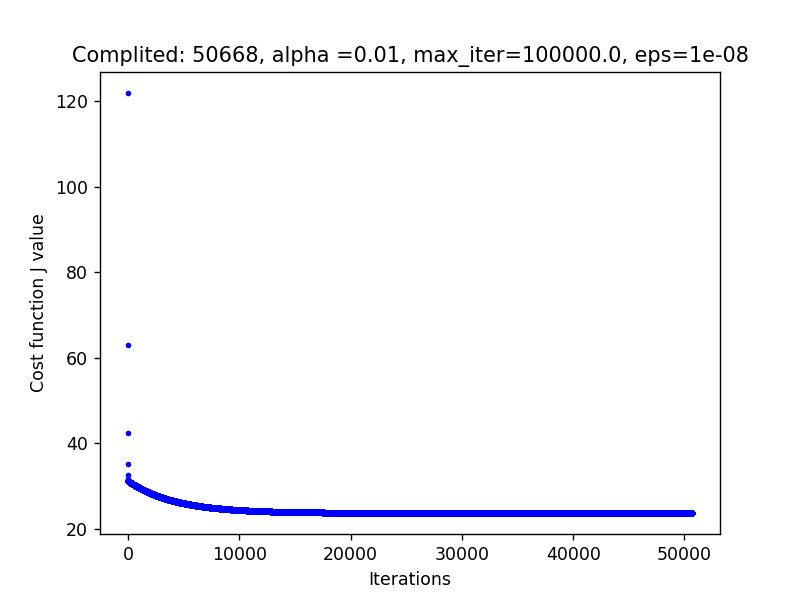

R2 Score = 0.5692448269318763
b: [[-34.31716919]], w= [[9.01484087]]


In [34]:
# DON'T_CHANGE_THIS_CODE. It is used to let you check the result is correct 
X, y = load_boston(return_X_y = True)
# print (np.isnan(X).any())
# X= np.nan_to_num(X)
X= X[:,5] # 5 corresponds to 'RM' 
X= X.reshape(-1,1) # make it 2d as for case of mutivariable
X_train, X_test, y_train, y_test=  train_test_split(X, y, random_state = 2018)
print ('X_train.shape= ',X_train.shape)
print ('y_train.shape= ',y_train.shape)
print ('X_train= \n{}'.format (X_train[:5,:]))
lin_reg = Linear_Regression(alpha= 0.01, verbose=1, eps=1e-8)
lin_reg.fit (X_train, y_train)
lin_reg.draw_cost_changes()
print ('R2 Score =', lin_reg.score(X_test, y_test))
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_)) 

<font color = green >

### Draw scatter and prediction for one feature
</font>

<IPython.core.display.Javascript object>


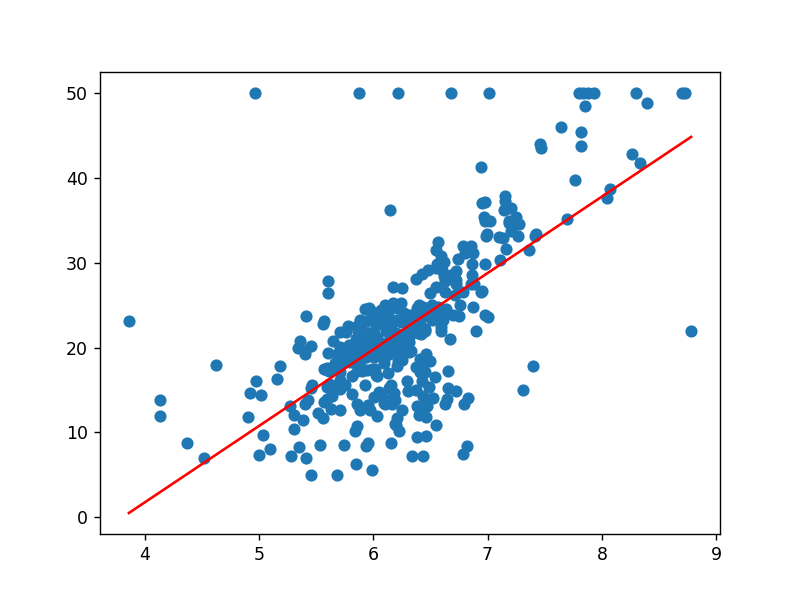

In [35]:
if X_train.shape[1]>1:
    raise Exception ('Select single feature to plot')
plt.figure()
plt.scatter(X_train, y_train)
x_line= np.array([np.min(X_train), np.max(X_train)])
z_line = lin_reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, z_line, '-', c='red')

<font color = green >

### Using normalization
</font>

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

R2 Score = 0.5692588501353655


<IPython.core.display.Javascript object>


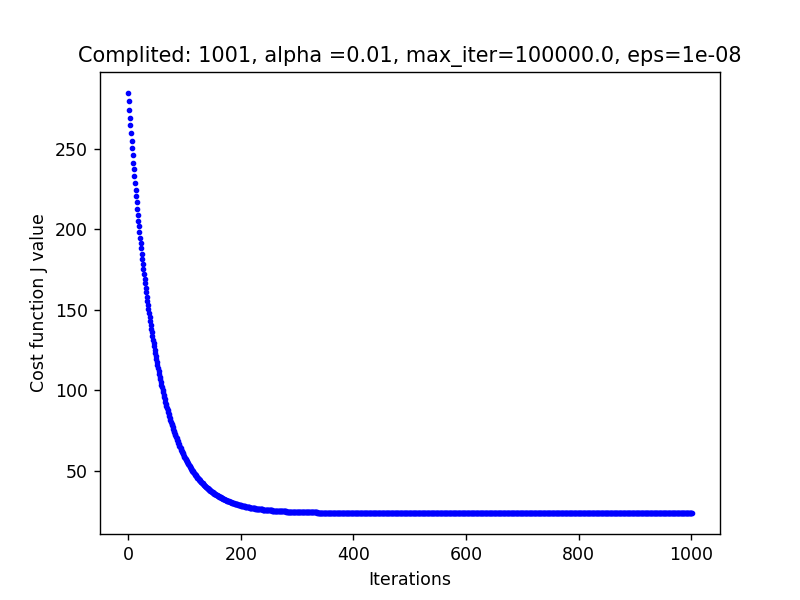

b: [[22.1985235]], w= [[6.29699974]]


In [37]:
lin_reg = Linear_Regression(alpha= 0.01, verbose=0, eps=1e-8)
lin_reg.fit (X_train_scaled, y_train)
print ('R2 Score =',lin_reg.score(X_test_scaled, y_test))
lin_reg.draw_cost_changes()
print ('b: {}, w= {}'.format(lin_reg.intercept_, lin_reg.coef_))

In [38]:
# Note: How faster it converges 

<font color = green >

### Compare with sklearn
</font>

In [39]:
from sklearn.linear_model import LinearRegression
lin_reg_sklearn = LinearRegression().fit(X_train_scaled, y_train)
lin_reg_sklearn.score(X_test_scaled, y_test)

0.5692801665656613